In [269]:
library(ggplot2)
library(psych)
library(GGally)
library(ggpubr)
library(dplyr) # For glimpse
library(rsm) # For RSM
library(leaps) # For Model selection
library(DAAG) # For VIF
library("olsrr")# For plot for Cook's Distance and DFBETAS
library(lmtest) # For Breusch-Pagan Test
library(car) # For Durbin-Watson test

# 1. Global Variables

In [79]:
alpha <- 0.05
n     <- 0 # This value will be set to total number of repords in dataset

In [80]:
options(repr.matrix.max.cols=50, repr.matrix.max.rows=500)

# 2. Data Collection and Preparation

## 2.1. Data read from file

In [ ]:
# file name
file_name <- "Happiness_Cleaned.csv"

# to dataframe
df_grid <- read.table(file_name, sep = ",", header=TRUE, fileEncoding = "latin1") # nolint

## 2.2. Preliminary Checks on Data Quality

### Basic study of Dataframe

In [82]:
head(df_grid, 15)

,Country,Happiness_Score,Population,Land_Area_.KM2.,Population_Density,Net_Migrants,Fertility_Rate,Median_Age,Urban_Population_Percentage,Developed_Developing,Human_Development_Index,Health_Care_Index,Constitutional_Form,Literacy_Rate,Latitude,Longitude,River_.Sq.KM.,River_to_Land_Percent,Pollution_PM2_5
,<chr>,<dbl>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>
1,Afghanistan,1.72,42239854,652860,65,-65846,4.4,17,26,Developing,0.478,45.00,Provisional,0.3817,33.00,65.00,0,0.00,15.0
2,Albania,5.30,2832439,27400,103,-8000,1.4,38,67,Developing,0.796,48.86,Republic,0.9755,41.00,20.00,1350,4.93,14.5
3,Algeria,5.36,45606480,2381740,19,-9999,2.8,28,75,Developing,0.745,49.00,Republic,0.7961,28.00,3.00,0,0.00,17.8
4,Argentina,6.19,45773884,2736690,17,3718,1.9,32,94,Developed,0.842,50.04,Republic,0.9809,-34.00,-64.00,43710,1.60,7.7
5,Armenia,5.46,2777970,28470,98,-5000,1.6,35,67,Developing,0.759,48.71,Republic,0.9977,40.00,45.00,1540,5.41,31.4
6,Australia,7.06,26439111,7682300,3,139991,1.6,38,86,Developed,0.951,57.77,Constitutional monarchy,0.9900,-27.00,133.00,58920,0.77,4.2
7,Austria,6.91,8958960,82409,109,19999,1.5,43,59,Developed,0.916,54.69,Republic,0.9800,47.33,13.33,1426,1.73,10.6
8,Azerbaijan,4.89,10412651,82658,126,0,1.7,32,57,Developing,0.745,48.66,Republic,0.9981,40.50,47.50,3971,4.80,18.9
9,Bahrain,5.96,1485509,760,1955,0,1.8,34,60,Developed,0.875,52.83,Constitutional monarchy,0.9572,26.00,50.55,0,0.00,66.6


In [83]:
n <- nrow(df_grid)
print(n)

[1] 137


In [84]:
glimpse(df_grid)

Rows: 137
Columns: 19
$ Country                     <chr> "Afghanistan", "Albania", "Algeria", "Arge…
$ Happiness_Score             <dbl> 1.72, 5.30, 5.36, 6.19, 5.46, 7.06, 6.91, …
$ Population                  <int> 42239854, 2832439, 45606480, 45773884, 277…
$ Land_Area_.KM2.             <int> 652860, 27400, 2381740, 2736690, 28470, 76…
$ Population_Density          <int> 65, 103, 19, 17, 98, 3, 109, 126, 1955, 13…
$ Net_Migrants                <int> -65846, -8000, -9999, 3718, -5000, 139991,…
$ Fertility_Rate              <dbl> 4.4, 1.4, 2.8, 1.9, 1.6, 1.6, 1.5, 1.7, 1.…
$ Median_Age                  <int> 17, 38, 28, 32, 35, 38, 43, 32, 34, 27, 41…
$ Urban_Population_Percentage <int> 26, 67, 75, 94, 67, 86, 59, 57, 60, 41, 99…
$ Developed_Developing        <chr> "Developing", "Developing", "Developing", …
$ Human_Development_Index     <dbl> 0.478, 0.796, 0.745, 0.842, 0.759, 0.951, …
$ Health_Care_Index           <dbl> 45.00, 48.86, 49.00, 50.04, 48.71, 57.77, …
$ Constitutional_F

## 2.3. Box plots for dependent and independent variables

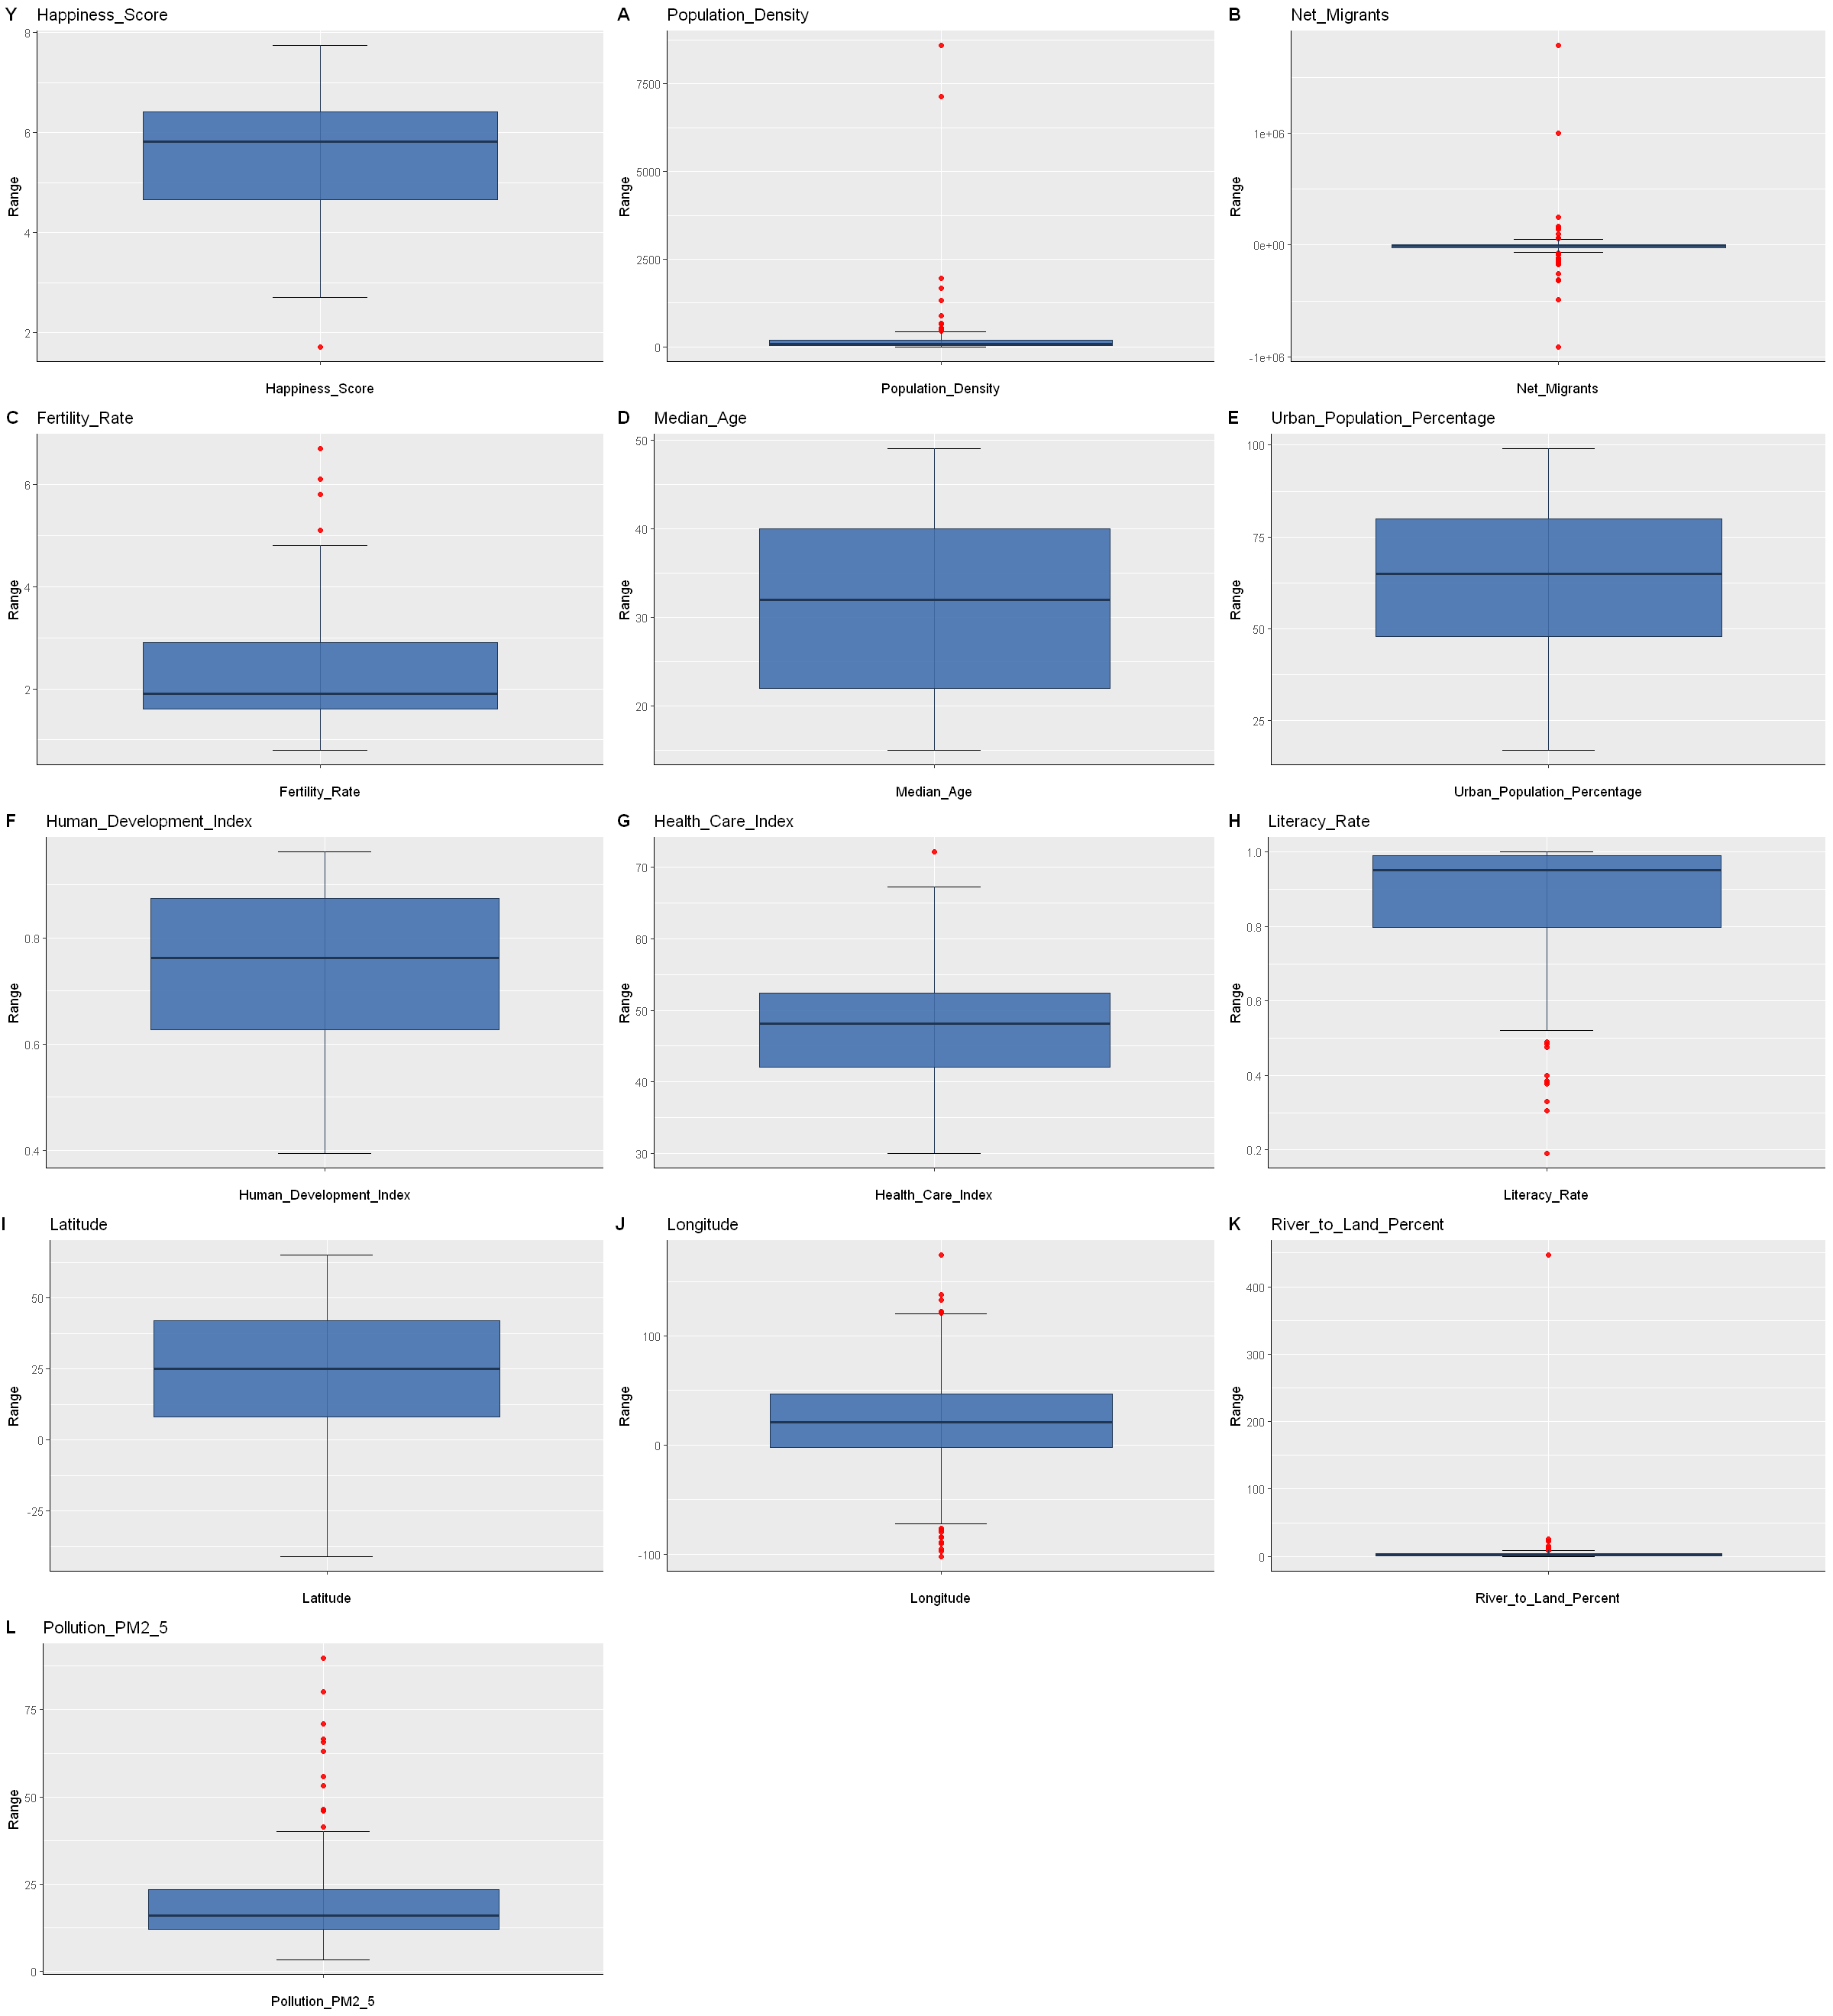

In [85]:
options(repr.plot.width=20, repr.plot.height=22)
plotList <- lapply(
                    c('Happiness_Score', 'Population_Density', 'Net_Migrants', 'Fertility_Rate', 'Median_Age',
                      'Urban_Population_Percentage', 'Human_Development_Index', 'Health_Care_Index', 'Literacy_Rate',
                      'Latitude', 'Longitude', 'River_to_Land_Percent', 'Pollution_PM2_5'),
                    function(key)
                    {
                        custom_plot <- ggplot(data=df_grid, aes(x="", y=eval(parse(text = key)))) +
                        stat_boxplot(geom = "errorbar", width = 0.2) + # Boxplot with error bars
                        geom_boxplot(fill = "#4271AE", colour = "#1F3552", alpha = 0.9, outlier.colour="red") +
                        scale_y_continuous(name="Range") + # Y label
                        scale_x_discrete(name=key) + # X label
                        ggtitle(key) + # Plot title
                        theme(axis.line = element_line(colour = "black", linewidth = 0.25)) # Theme customization #nolint
                    }
)
allplots <- ggarrange( plotlist=plotList, 
labels = c("Y", "A", "B", "C", "D", "E", "F", "G", "H", "I", "J", "K", "L"), # nolint
ncol = 3, nrow = 5)
allplots

<div style="background-color: #00f0f0; width: 750px; margin: auto; padding: 20px; border: 2px solid black; border-radius: 5px; font-size: 15px;">

<b>Following important points are observed from study of individual variables</b>

<ul>
  <li><b>Related to outliers:</b>
    <ul>
      <li>Attributes <i>Population Density</i>, <i>Net Migrants</i>, and <i>River to Land Percent</i> have very wide outliers.</li>
      <li>There exist few outliers for attributes <i>Fertility Rate</i>, <i>Literacy Rate</i>, <i>Longitude</i>, and <i>Pollution PM 2.5</i>.</li>
      <li>No outliers are observed for all other attributes.</li>
    </ul>
  </li>

  <li><b style="font-weight: bold;">It can also be observed that range for different attributes vary a lot.</b> 
    E.g. <i>literacy rate</i> value ranges from 0 to 1, whereas <i>population density</i>, <i>net migrants</i> ranges in thousands, 
    it arises need of some standardization technique.
  </li>
</ul>

</div>


## 2.4. Declaring Variables (in terms of X and Y)

### 2.4.1 Converting Categorical Variables to dummy variables

In [88]:
unique(df_grid$Developed_Developing)
unique(df_grid$Constitutional_Form)

[1] "Developing" "Developed"

[1] "Provisional"             "Republic"               
[3] "Constitutional monarchy" "Absolute monarchy"

In [ ]:
df_grid$IsDeveloped <- ifelse(df_grid$Developed_Developing == "Developed", 1, 0)

In [89]:
df_grid$IsRepublic               <- ifelse(df_grid$Constitutional_Form == "Republic", 1, 0)
df_grid$IsMonarchyAbsolute       <- ifelse(df_grid$Constitutional_Form == "Absolute monarchy", 1, 0)
df_grid$IsMonarchyConstitutional <- ifelse(df_grid$Constitutional_Form == "Constitutional monarchy", 1, 0)

#### All Variable

In [90]:
all_var <- c("Happiness_Score", "Population_Density", "Net_Migrants", "Fertility_Rate",
            "Median_Age", "Urban_Population_Percentage",
            "Human_Development_Index", "Health_Care_Index",
            "Literacy_Rate", "Latitude", "Longitude",
            "River_to_Land_Percent", "Pollution_PM2_5",
            "IsDeveloped", "IsRepublic", "IsMonarchyAbsolute", "IsMonarchyConstitutional")

In [91]:
rownames(df_grid) <- df_grid$Country
df_grid <- df_grid[all_var]

In [92]:
head(df_grid)

,Happiness_Score,Population_Density,Net_Migrants,Fertility_Rate,Median_Age,Urban_Population_Percentage,Human_Development_Index,Health_Care_Index,Literacy_Rate,Latitude,Longitude,River_to_Land_Percent,Pollution_PM2_5,IsDeveloped,IsRepublic,IsMonarchyAbsolute,IsMonarchyConstitutional
,<dbl>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Afghanistan,1.72,65,-65846,4.4,17,26,0.478,45.00,0.3817,33,65,0.00,15.0,0,0,0,0
Albania,5.30,103,-8000,1.4,38,67,0.796,48.86,0.9755,41,20,4.93,14.5,0,1,0,0
Algeria,5.36,19,-9999,2.8,28,75,0.745,49.00,0.7961,28,3,0.00,17.8,0,1,0,0
Argentina,6.19,17,3718,1.9,32,94,0.842,50.04,0.9809,-34,-64,1.60,7.7,1,1,0,0
Armenia,5.46,98,-5000,1.6,35,67,0.759,48.71,0.9977,40,45,5.41,31.4,0,1,0,0
Australia,7.06,3,139991,1.6,38,86,0.951,57.77,0.9900,-27,133,0.77,4.2,1,0,0,0


#### Predicted/Response Variable

In [93]:
predicted_var <- c("Happiness_Score")

#### Predictors

In [94]:
predictors_all <- c("Population_Density", "Net_Migrants", "Fertility_Rate",
                    "Median_Age", "Urban_Population_Percentage",
                    "Human_Development_Index", "Health_Care_Index",
                    "Literacy_Rate", "Latitude",
                    "Longitude", "River_to_Land_Percent", "Pollution_PM2_5",
                    "IsDeveloped", "IsRepublic", "IsMonarchyAbsolute", "IsMonarchyConstitutional")

predictors_continuous <- c("Population_Density", "Net_Migrants", "Fertility_Rate",
                            "Median_Age", "Urban_Population_Percentage",
                            "Human_Development_Index", "Health_Care_Index",
                            "Literacy_Rate", "Latitude",
                            "Longitude", "River_to_Land_Percent", "Pollution_PM2_5")
                            
predictors_categorical <- c("IsDeveloped", "IsRepublic", "IsMonarchyAbsolute", "IsMonarchyConstitutional")

#### Y and X's

In [96]:
Y_all <- c('Y')
X_all <- c('X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'XA', 'XB', 'XC', 'D1', 'D2', 'D3', 'D4')
X_continuous <- c('X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'XA', 'XB', 'XC')
X_categorical <- c('D1', 'D2', 'D3', 'D4')

#### Defining Dependent and Independent Variables

In [97]:
Y <- df_grid$Happiness_Score
X1 <- df_grid$Population_Density
X2 <- df_grid$Net_Migrants
X3 <- df_grid$Fertility_Rate
X4 <- df_grid$Median_Age
X5 <- df_grid$Urban_Population_Percentage
X6 <- df_grid$Human_Development_Index
X7 <- df_grid$Health_Care_Index
X8 <- df_grid$Literacy_Rate
X9 <- df_grid$Latitude
XA <- df_grid$Longitude
XB <- df_grid$River_to_Land_Percent
XC <- df_grid$Pollution_PM2_5

D1 <- df_grid$IsDeveloped
D2 <- df_grid$IsRepublic
D3 <- df_grid$IsMonarchyAbsolute
D4 <- df_grid$IsMonarchyConstitutional

#### Changing column names

In [98]:
colnames(df_grid) <- c(Y_all, X_all)

In [101]:
head(df_grid)

,Y,X1,X2,X3,X4,X5,X6,X7,X8,X9,XA,XB,XC,D1,D2,D3,D4
,<dbl>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Afghanistan,1.72,65,-65846,4.4,17,26,0.478,45.00,0.3817,33,65,0.00,15.0,0,0,0,0
Albania,5.30,103,-8000,1.4,38,67,0.796,48.86,0.9755,41,20,4.93,14.5,0,1,0,0
Algeria,5.36,19,-9999,2.8,28,75,0.745,49.00,0.7961,28,3,0.00,17.8,0,1,0,0
Argentina,6.19,17,3718,1.9,32,94,0.842,50.04,0.9809,-34,-64,1.60,7.7,1,1,0,0
Armenia,5.46,98,-5000,1.6,35,67,0.759,48.71,0.9977,40,45,5.41,31.4,0,1,0,0
Australia,7.06,3,139991,1.6,38,86,0.951,57.77,0.9900,-27,133,0.77,4.2,1,0,0,0


## 2.5. Diagnostics for relationships and strong interactions

#### Scatter variable plot and correlation matrix

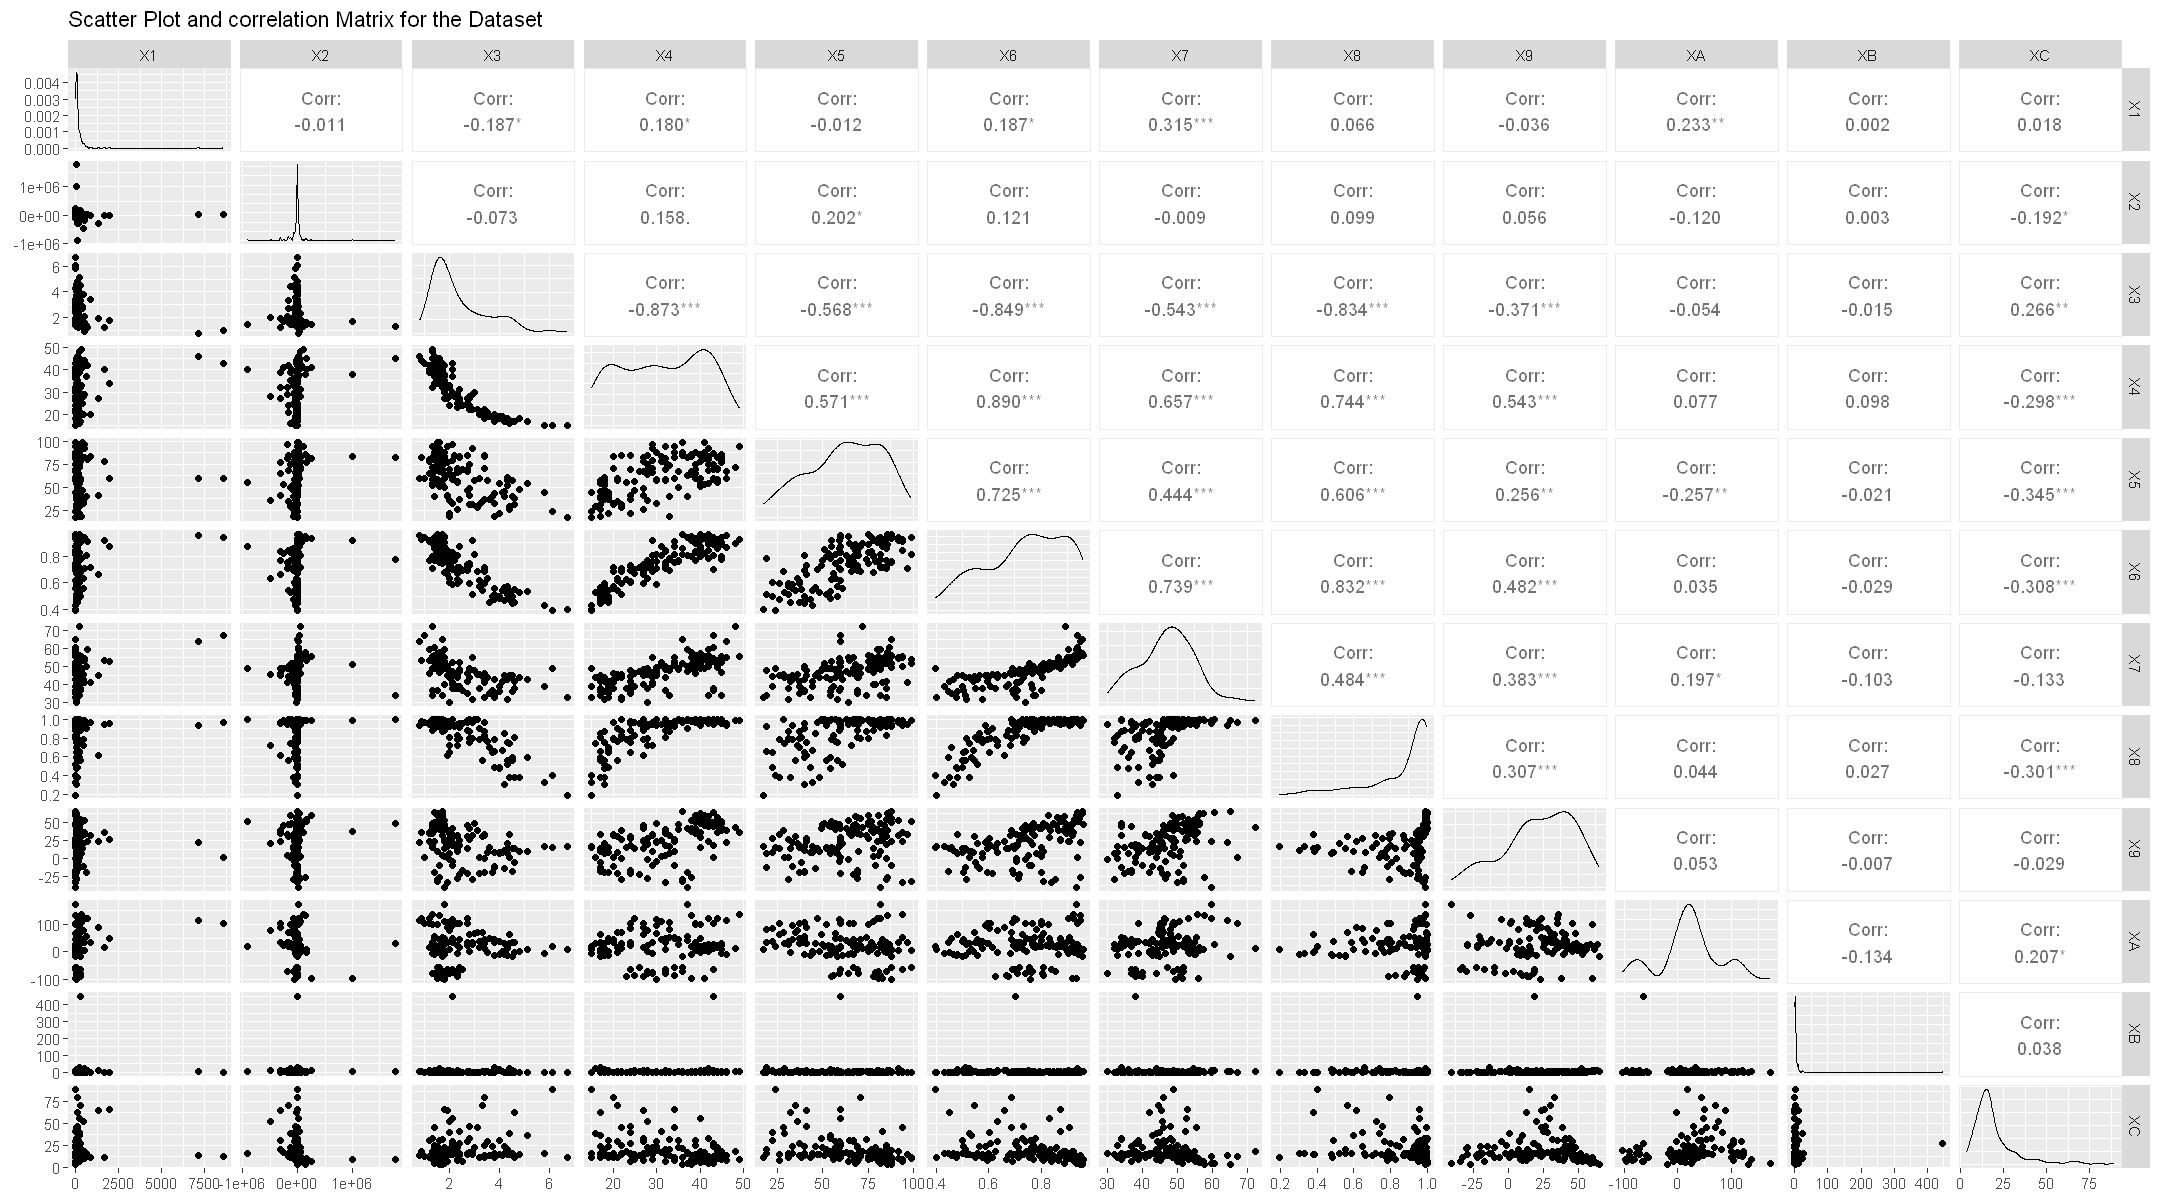

In [103]:
# Make plots wider
options(repr.plot.width=18, repr.plot.height=10)
# Scatter Plot Matrix for the Dataset
df_temp <- df_grid[,(names(df_grid) %in% c(X_continuous))]
ggpairs(as.data.frame(df_temp), title = "Scatter Plot and correlation Matrix for the Dataset", axisLabels = "show")

<div style="background-color: #00f0f0; width: 850px; margin: auto; padding: 20px; border: 2px solid black; border-radius: 5px; font-size: 15px;">

<ul>
  <li><b>About multicollinearity <span style="font-weight: normal;">[Correlation of independent variables with other independent variables]</span></b></li>
</ul>

<table style="border-collapse: collapse; width: 100%; text-align: center; border: 3px solid black;">
  <tr>
    <th style="border: 2px solid black;">Independent Variable</th>
    <th style="border: 2px solid black;">X1</th>
    <th style="border: 2px solid black;">X2</th>
    <th style="border: 2px solid black;">X3</th>
    <th style="border: 2px solid black;">X4</th>
    <th style="border: 2px solid black;">X5</th>
    <th style="border: 2px solid black;">X6</th>
    <th style="border: 2px solid black;">X7</th>
    <th style="border: 2px solid black;">X8</th>
    <th style="border: 2px solid black;">X9</th>
    <th style="border: 2px solid black;">XA</th>
    <th style="border: 2px solid black;">XB</th>
    <th style="border: 2px solid black;">XC</th>
  </tr>

  <!-- First Section -->
  <tr>
    <td style="border: 2px solid black;">Population Density (X1)</td>
    <td></td>
    <td style="background-color: #90ee90;"></td>
    <td style="background-color: #ffff99;"></td>
    <td style="background-color: #ffff99;"></td>
    <td style="background-color: #90ee90;"></td>
    <td style="background-color: #ffff99;"></td>
    <td style="background-color: #ffff99;"></td>
    <td style="background-color: #90ee90;"></td>
    <td style="background-color: #90ee90;"></td>
    <td style="background-color: #ffff99;"></td>
    <td style="background-color: #90ee90;"></td>
    <td style="background-color: #90ee90;"></td>
  </tr>
  <tr>
    <td style="border: 2px solid black;">Net Migrants (X2)</td>
    <td></td>
    <td></td>
    <td style="background-color: #90ee90;"></td>
    <td style="background-color: #90ee90;"></td>
    <td style="background-color: #ffff99;"></td>
    <td style="background-color: #90ee90;"></td>
    <td style="background-color: #90ee90;"></td>
    <td style="background-color: #90ee90;"></td>
    <td style="background-color: #90ee90;"></td>
    <td style="background-color: #90ee90;"></td>
    <td style="background-color: #90ee90;"></td>
    <td style="background-color: #ffff99;"></td>
  </tr>
  <tr>
    <td style="border: 2px solid black;">Fertility Rate (X3)</td>
    <td></td>
    <td></td>
    <td></td>
    <td style="background-color: #f08080;"></td>
    <td style="background-color: #f08080;"></td>
    <td style="background-color: #f08080;"></td>
    <td style="background-color: #f08080;"></td>
    <td style="background-color: #f08080;"></td>
    <td style="background-color: #ffff99;"></td>
    <td style="background-color: #90ee90;"></td>
    <td style="background-color: #90ee90;"></td>
    <td style="background-color: #ffff99;"></td>
  </tr>

  <!-- Second Section -->
  <tr>
    <td style="border: 2px solid black;">Median Age (X4)</td>
    <td></td>
    <td></td>
    <td></td>
    <td></td>
    <td style="background-color: #f08080;"></td>
    <td style="background-color: #f08080;"></td>
    <td style="background-color: #f08080;"></td>
    <td style="background-color: #f08080;"></td>
    <td style="background-color: #f08080;"></td>
    <td style="background-color: #90ee90;"></td>
    <td style="background-color: #90ee90;"></td>
    <td style="background-color: #ffff99;"></td>
  </tr>
  <tr>
    <td style="border: 2px solid black;">Urban Population Percentage (X5)</td>
    <td></td>
    <td></td>
    <td></td>
    <td></td>
    <td></td>
    <td style="background-color: #f08080;"></td>
    <td style="background-color: #ffff99;"></td>
    <td style="background-color: #f08080;"></td>
    <td style="background-color: #ffff99;"></td>
    <td style="background-color: #ffff99;"></td>
    <td style="background-color: #90ee90;"></td>
    <td style="background-color: #ffff99;"></td>
  </tr>
  <tr>
    <td style="border: 2px solid black;">Human Development Index (X6)</td>
    <td></td>
    <td></td>
    <td></td>
    <td></td>
    <td></td>
    <td></td>
    <td style="background-color: #f08080;"></td>
    <td style="background-color: #f08080;"></td>
    <td style="background-color: #ffff99;"></td>
    <td style="background-color: #90ee90;"></td>
    <td style="background-color: #90ee90;"></td>
    <td style="background-color: #ffff99;"></td>
  </tr>
  <tr>
    <td style="border: 2px solid black;">Health Care Index (X7)</td>
    <td></td>
    <td></td>
    <td></td>
    <td></td>
    <td></td>
    <td></td>
    <td></td>
    <td style="background-color: #ffff99;"></td>
    <td style="background-color: #ffff99;"></td>
    <td style="background-color: #ffff99;"></td>
    <td style="background-color: #90ee90;"></td>
    <td style="background-color: #90ee90;"></td>
  </tr>
  <tr>
    <td style="border: 2px solid black;">Literacy Rate (X8)</td>
    <td></td>
    <td></td>
    <td></td>
    <td></td>
    <td></td>
    <td></td>
    <td></td>
    <td></td>
    <td style="background-color: #ffff99;"></td>
    <td style="background-color: #90ee90;"></td>
    <td style="background-color: #90ee90;"></td>
    <td style="background-color: #ffff99;"></td>
  </tr>
  <tr>
    <td style="border: 2px solid black;">Latitude (X9)</td>
    <td></td>
    <td></td>
    <td></td>
    <td></td>
    <td></td>
    <td></td>
    <td></td>
    <td></td>
    <td></td>
    <td style="background-color: #90ee90;"></td>
    <td style="background-color: #90ee90;"></td>
    <td style="background-color: #90ee90;"></td>
  </tr>
  <tr>
    <td style="border: 2px solid black;">Longitude (XA)</td>
    <td></td><td></td><td></td><td></td><td></td><td></td><td></td><td></td><td></td>
    <td></td>
    <td style="background-color: #90ee90;"></td>
    <td style="background-color: #90ee90;"></td>
  </tr>
  <tr>
    <td style="border: 2px solid black;">River to Land Percent (XB)</td>
    <td></td><td></td><td></td><td></td><td></td><td></td><td></td><td></td><td></td><td></td>
    <td></td>
    <td style="background-color: #90ee90;"></td>
  </tr>
  <tr>
    <td style="border: 2px solid black;">Pollution PM2.5 (XC)</td>
    <td></td><td></td><td></td><td></td><td></td><td></td><td></td><td></td><td></td><td></td><td></td>
    <td></td><td></td>
  </tr>
</table>

</div>


# 3. Determine several potentially useful subsets of explanatory variables

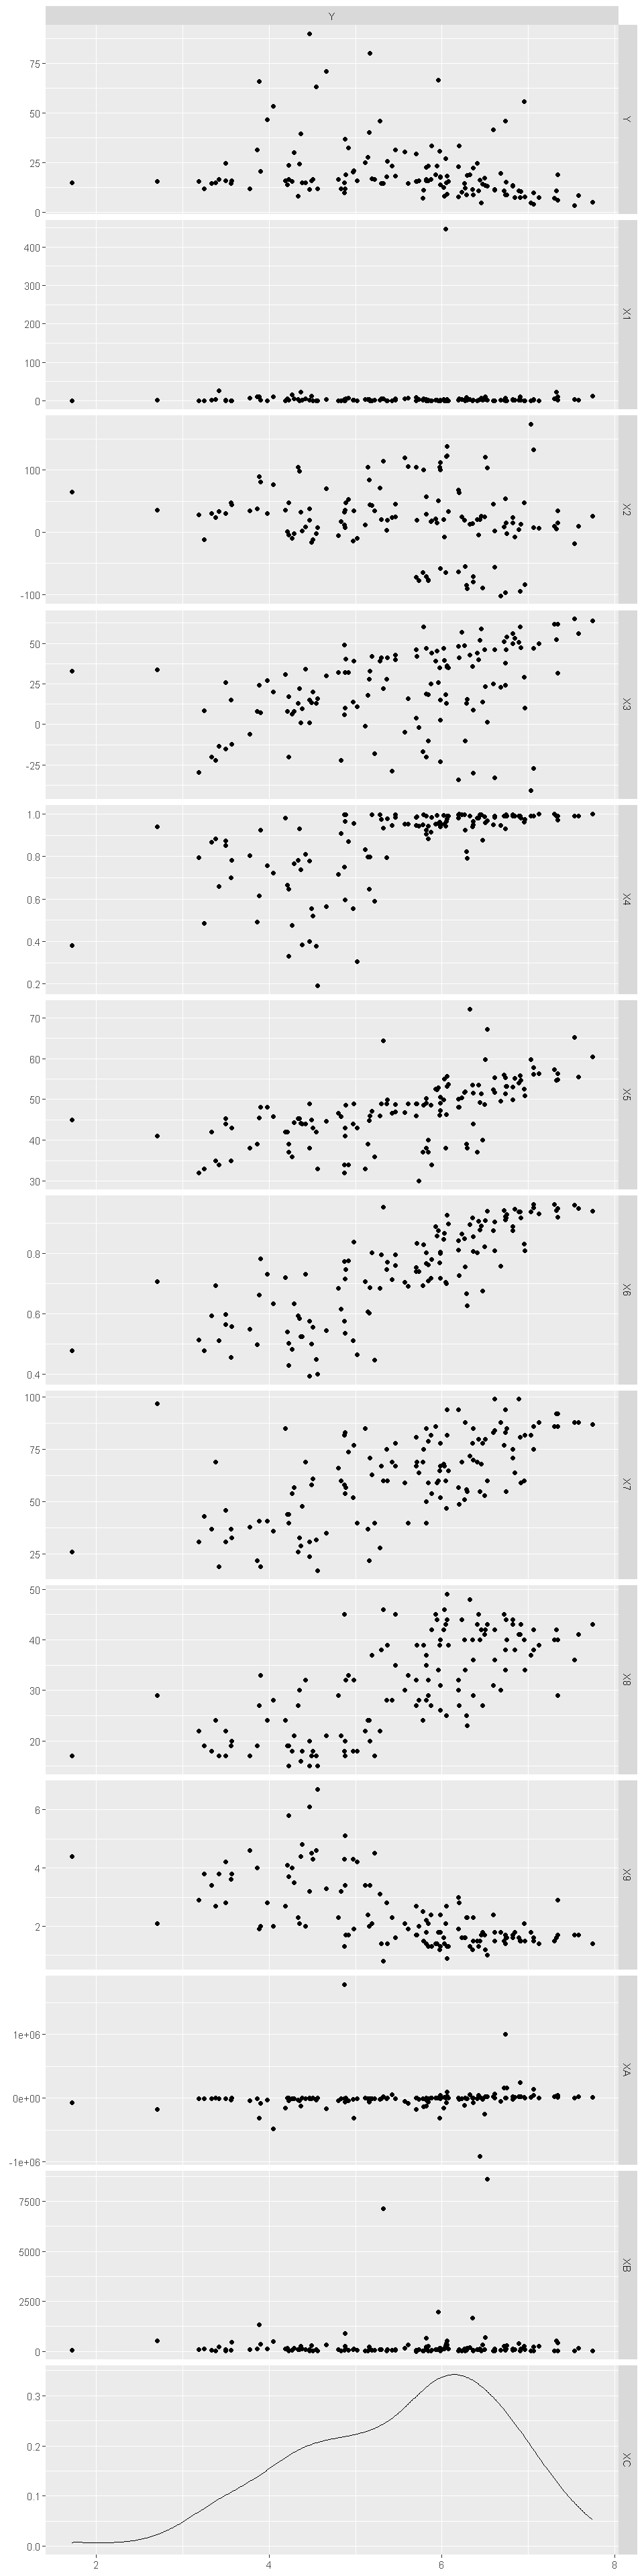

In [104]:
options(repr.plot.width=8, repr.plot.height=32)
pairs <- ggpairs(df_grid, columns = c(Y_all, X_continuous))
plots <- lapply(pairs$nrow:1, function(i) getPlot(pairs, i = i, j = 1))
ggmatrix(
plots,
nrow = pairs$nrow,
ncol = 1,
xAxisLabels = "Y",
yAxisLabels = pairs$yAxisLabels
)

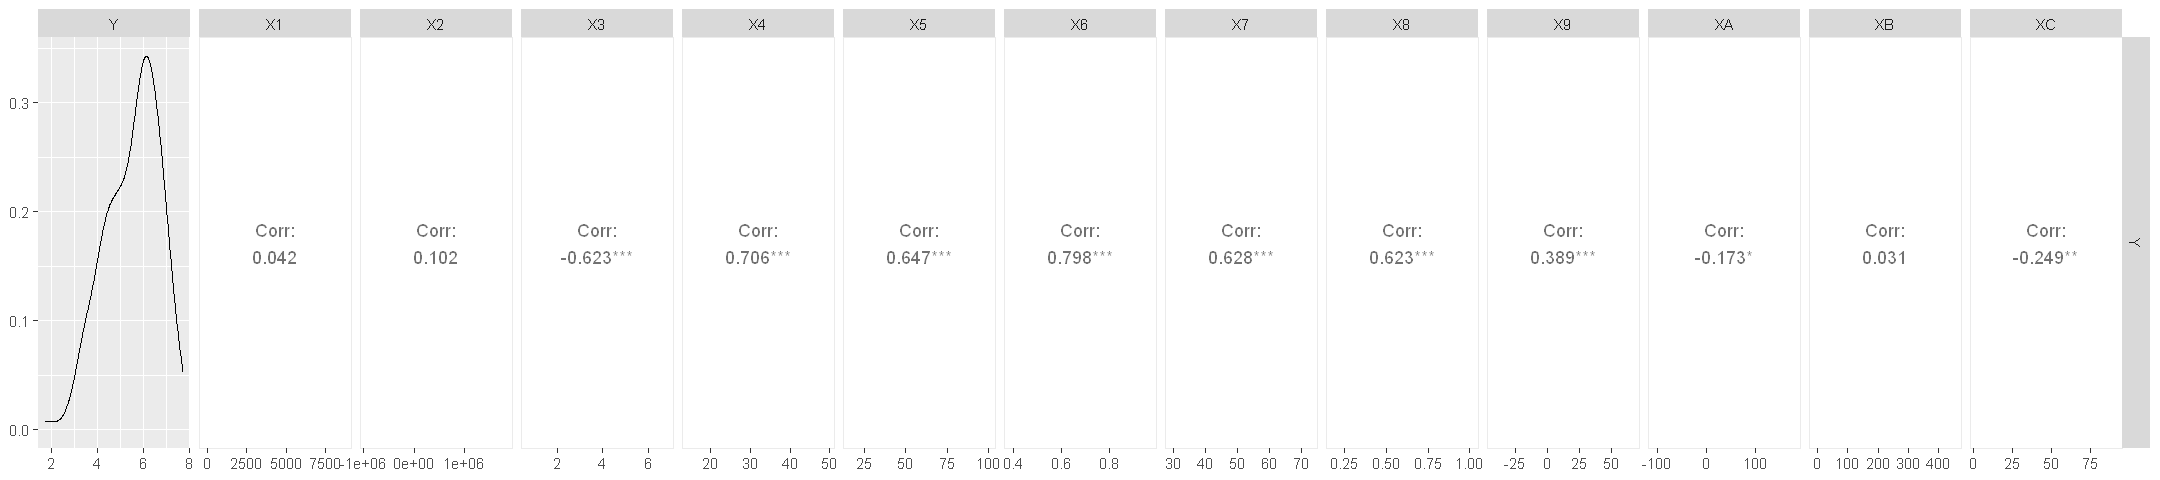

In [105]:
options(repr.plot.width=18, repr.plot.height=4)

pairs <- ggpairs(df_grid, columns = c(Y_all, X_continuous))
plots <- lapply(1:pairs$ncol, function(j) getPlot(pairs, i = 1, j = j))
ggmatrix(
plots,
nrow = 1,
ncol = pairs$ncol,
xAxisLabels = pairs$xAxisLabels,
yAxisLabels = "Y"
)

## 3.1 Include known essential variables

#### Important Insights from Scatter variable plot and correlation matrix

<div style="background-color: #00f0f0; width: 800px; margin: auto; padding: 20px; border: 2px solid black; border-radius: 5px; font-size: 15px;">

<ul>
  <li>
    <b style="font-size: 16px;">About model variables</b>
    <span style="font-size: 15px;"> [Correlation of independent variables with dependent variable (Y - Happiness Score)]</span>
  </li>
</ul>

<table style="width:100%;border-collapse: collapse; font-size: 14px;">
  <!-- Header row -->
  <tr style="background-color: #f8f8f8; font-weight: bold; text-align: center;">
    <td style="border: 2px solid black; padding: 10px;">
      Variables with high correlation with dependent variable <br>
      <small>(Correlation coefficient more than 60% with Y)</small>
    </td>
    <td style="border: 2px solid black; padding: 10px;">
      Variables with moderate correlation with dependent variable <br>
      <small>(Correlation coefficient 10%-60% with Y)</small>
    </td>
    <td style="border: 2px solid black; padding: 10px;">
      Variables with no or very little correlation with the dependent variable <br>
      <small>(Correlation coefficient less than 10% with Y)</small>
    </td>
  </tr>

  <!-- Colored content row -->
  <tr>
    <td style="border: 2px solid black; padding: 15px; vertical-align: top; background-color: #d0f0d0;">
      <b>Include known essential variables</b>
      <ul>
        <li>Fertility Rate (X3)</li>
        <li>Median Age (X4)</li>
        <li>Urban Population Percentage (X5)</li>
        <li>Human Development Index (X6)</li>
        <li>Health Care Index (X7)</li>
        <li>Literacy Rate (X8)</li>
      </ul>
    </td>
    <td style="border: 2px solid black; padding: 15px; vertical-align: top; background-color: #ffff99;">
      <b>Can be studied to be included</b>
      <ul>
        <li>Net_Migrants (X2)</li>
        <li>Latitude (X9)</li>
        <li>Longitude (XA)</li>
        <li>Pollution_PM2.5 (XC)</li>
      </ul>
    </td>
    <td style="border: 2px solid black; padding: 15px; vertical-align: top; background-color: #f08080;">
      <b>Reduction of number of explanatory variables</b>
      <ul>
        <li>Population_Density (X1)</li>
        <li>River_to_Land_Percent (XB)</li>
      </ul>
    </td>
  </tr>
</table>

</div>


### Reduction of number of explanatory variables

<div style="background-color: #00f0f0; padding: 20px; border: 2px solid black; border-radius: 5px; width: 800px; margin: auto;">

<p style="font-weight: bold;">
  Based on insights from Scatter variable plot and correlation matrix following variables have been excluded to be part of further study:
</p>

<ul>
  <li>Population_Density (X1)</li>
  <li>River_to_Land_Percent (XB)</li>
</ul>

</div>


In [106]:
X_all        <- c('X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'XA', 'XC', 'D1', 'D2', 'D3', 'D4')
X_continuous <- c('X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'XA', 'XC')

# 4. Model refinement and selection

## 4.1. Correlation Transformation of variables

#### Convert all continuous variables to numeric

In [107]:
df_grid_temp <- lapply(df_grid, as.numeric)
df_grid_temp <- as.data.frame(df_grid_temp)

rownames(df_grid_temp) <- rownames(df_grid)
df_grid <- df_grid_temp

#### Tranformation of Y

In [108]:
mean_y    <- mean(df_grid$Y)
sy        <- sd(df_grid$Y)
df_grid$Y <- (1/sqrt(n-1))*(df_grid$Y - mean_y)/sy

Tranformation of variables

In [109]:
collist <- colnames(df_grid)
mean_x  <- colMeans(df_grid)
sx      <- apply(df_grid, 2, sd)

for(col in c(X_continuous, c('X1', 'XB'))) {
df_grid[[col]] <- (1/sqrt(n-1))*(df_grid[[col]] - mean_x[col])/sx[col]
}

In [110]:
head(df_grid)

,Y,X1,X2,X3,X4,X5,X6,X7,X8,X9,XA,XB,XC,D1,D2,D3,D4
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Afghanistan,-0.278450024,-0.01922651,-0.0241168112,0.14835266,-0.127347032,-0.15244094,-0.147099242,-0.02359340,-0.22978170,0.03558877,0.06668694,-0.014110865,-0.03033609,0,0,0,0
Albania,-0.017344566,-0.01586350,-0.0005680072,-0.07256380,0.059199511,0.01898264,0.029604802,0.01901815,0.05136158,0.06289957,-0.00293897,-0.003034416,-0.03318934,0,1,0,0
Algeria,-0.012968497,-0.02329752,-0.0013817896,0.03053055,-0.029632176,0.05243114,0.001265474,0.02056365,-0.03357797,0.01851952,-0.02924209,-0.014110865,-0.01435789,0,1,0,0
Argentina,0.047567126,-0.02347452,0.0042023294,-0.03574439,0.005900499,0.13187133,0.055165765,0.03204448,0.05391829,-0.19313922,-0.13290733,-0.010516074,-0.07199354,1,1,0,0
Armenia,-0.005675048,-0.01630600,0.0006532772,-0.05783604,0.032550005,0.01898264,0.009044898,0.01736226,0.06187249,0.05948572,0.03574209,-0.001955979,0.06325051,0,1,0,0
Australia,0.111020128,-0.02471353,0.0596783550,-0.05783604,0.059199511,0.09842283,0.115734132,0.11737798,0.05822681,-0.16924227,0.17189941,-0.012380872,-0.09196629,1,0,0,0


## 4.2. Making all Interaction and Quadratic Terms for polynomial regression

#### Making all combinations with independent variables

In [111]:
df_grid_temp <- model.matrix(~(X2+X3+X4+X5+X6+X7+X8+X9+XA+XC)^2, df_grid)

#### Replace : with blank

In [112]:
colnames(df_grid_temp) <- gsub(":", "", colnames(df_grid_temp))

#### Converting to data frame

In [113]:
df_grid_temp <- as.data.frame(df_grid_temp)
df_grid_temp$Y <- df_grid$Y

rownames(df_grid_temp) <- rownames(df_grid)
df_grid <- df_grid_temp

#### Making Square terms of countinous variables

In [114]:
# All Square Terms
for (col in X_continuous){
    #print(paste0('df_grid$', col, col, ' = df_grid$', col, ' * df_grid$', col))
    df_grid[[paste0(col, '', col)]] <- df_grid[[col]] * df_grid[[col]]
}

#### Interaction terms between categorial variables and all terms generated from countinous variables

In [115]:
df_grid['D1'] <- D1
df_grid['D2'] <- D2
df_grid['D3'] <- D3
df_grid['D4'] <- D4
for (col1 in X_categorical) {
    for (col2 in X_continuous) {
        #print(paste0('df_grid$', col1, col2, ' = df_grid$', col1, ' * df_grid$', col2))
        df_grid[[paste0(col1, '', col2)]] <- df_grid[[col1]] * df_grid[[col2]]
    }
}

#### Total possible combinations to study

In [116]:
length(colnames(df_grid))

[1] 111

#### All combinations

In [117]:
colnames(df_grid)

[1] "(Intercept)" "X2"          "X3"          "X4"          "X5"         
  [6] "X6"          "X7"          "X8"          "X9"          "XA"         
 [11] "XC"          "X2X3"        "X2X4"        "X2X5"        "X2X6"       
 [16] "X2X7"        "X2X8"        "X2X9"        "X2XA"        "X2XC"       
 [21] "X3X4"        "X3X5"        "X3X6"        "X3X7"        "X3X8"       
 [26] "X3X9"        "X3XA"        "X3XC"        "X4X5"        "X4X6"       
 [31] "X4X7"        "X4X8"        "X4X9"        "X4XA"        "X4XC"       
 [36] "X5X6"        "X5X7"        "X5X8"        "X5X9"        "X5XA"       
 [41] "X5XC"        "X6X7"        "X6X8"        "X6X9"        "X6XA"       
 [46] "X6XC"        "X7X8"        "X7X9"        "X7XA"        "X7XC"       
 [51] "X8X9"        "X8XA"        "X8XC"        "X9XA"        "X9XC"       
 [56] "XAXC"        "Y"           "X2X2"        "X3X3"        "X4X4"       
 [61] "X5X5"        "X6X6"        "X7X7"        "X8X8"        "X9X9"       
 [66] "XAXA"        "XCXC"        "D1"          "D2"          "D3"         
 [71] "D4"          "D1X2"        "D1X3"        "D1X4"        "D1X5"       
 [76] "D1X6"        "D1X7"        "D1X8"        "D1X9"        "D1XA"       
 [81] "D1XC"        "D2X2"        "D2X3"        "D2X4"        "D2X5"       
 [86] "D2X6"        "D2X7"        "D2X8"        "D2X9"        "D2XA"       
 [91] "D2XC"        "D3X2"        "D3X3"        "D3X4"        "D3X5"       
 [96] "D3X6"        "D3X7"        "D3X8"        "D3X9"        "D3XA"       
[101] "D3XC"        "D4X2"        "D4X3"        "D4X4"        "D4X5"       
[106] "D4X6"        "D4X7"        "D4X8"        "D4X9"        "D4XA"       
[111] "D4XC"

## 4.3. Model Selection

#### Full model with all variables

In [118]:
reg.full <- lm(Y~.-Y, data=df_grid)

#### Base model with all essential variables

In [119]:
reg.base <- lm(Y~X3+X4+X5+X6+X7+X8, data=df_grid)

#### Null model

In [120]:
reg.null <- lm(Y~1, data=df_grid)

### 4.3.1. Model 1 Selection through Stepwise method + "Best" Sub-Step Model Selection

#### Stepwise method

In [121]:
stepwise.reg <- step(reg.base, direction="both", scope=list(upper=reg.full, lower=reg.base))

Start:  AIC=-808.55
Y ~ X3 + X4 + X5 + X6 + X7 + X8

       Df Sum of Sq     RSS     AIC
+ XA    1  0.036346 0.30187 -822.13
+ XAXA  1  0.034321 0.30390 -821.21
+ D2XA  1  0.032311 0.30591 -820.31
+ X6X8  1  0.025092 0.31313 -817.11
+ X4X8  1  0.014145 0.32407 -812.41
+ X3X8  1  0.012450 0.32577 -811.69
+ X4X4  1  0.012162 0.32606 -811.57
+ X5X7  1  0.010175 0.32804 -810.74
+ X8X8  1  0.009758 0.32846 -810.56
+ XAXC  1  0.009577 0.32864 -810.49
+ D1X8  1  0.009416 0.32880 -810.42
+ X3XA  1  0.008948 0.32927 -810.23
+ X2X4  1  0.007823 0.33040 -809.76
+ D1XA  1  0.007022 0.33120 -809.43
+ X7X8  1  0.006594 0.33162 -809.25
+ X5XA  1  0.006489 0.33173 -809.21
+ X6X6  1  0.006016 0.33220 -809.01
+ D1    1  0.005966 0.33225 -808.99
+ X2X8  1  0.005693 0.33253 -808.88
+ X6XC  1  0.005512 0.33271 -808.81
+ X5X5  1  0.005192 0.33303 -808.67
<none>              0.33822 -808.55
+ X2XC  1  0.004802 0.33342 -808.51
+ X3XC  1  0.004755 0.33346 -808.49
+ X8X9  1  0.004581 0.33364 -808.42
+ D1X6  1  

In [122]:
summary(stepwise.reg)


Call:
lm(formula = Y ~ X3 + X4 + X5 + X6 + X7 + X8 + XA + XAXA + X8X9 + 
    X4X4 + X2XA + XAXC + X8XA + X7XC + D1XC + X5X9 + X5X6 + X3X5 + 
    X3X3 + X5X5 + X3X4 + D2X5 + X5XA + D1 + D2X8 + X3XC + X5X7 + 
    X4X7 + D1X5 + X7XA, data = df_grid)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.077397 -0.015353  0.001207  0.021941  0.078577 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.03912    0.01083  -3.612 0.000466 ***
X3           0.23277    0.16877   1.379 0.170743    
X4           0.12407    0.18047   0.687 0.493279    
X5           0.59003    0.13539   4.358 3.05e-05 ***
X6           0.41860    0.18599   2.251 0.026475 *  
X7           0.07482    0.07172   1.043 0.299257    
X8           0.08112    0.12383   0.655 0.513819    
XA          -0.17849    0.05760  -3.099 0.002488 ** 
XAXA         1.21633    0.46258   2.629 0.009824 ** 
X8X9         3.85879    1.14524   3.369 0.001051 ** 
X4X4         4.18538    2.15878   1.939 

#### "Best" Sub-Step Model Selection

In [123]:
Model1 <- regsubsets(Y ~ X3 + X4 + X5 + X6 + X7 + X8 + XA + XAXA + X8X9 +
X4X4 + X2XA + XAXC + X8XA + X7XC + D1XC + X5X9 + X5X6 + X3X5 +
X3X3 + X5X5 + X3X4 + D2X5 + X5XA + D1 + D2X8 + X3XC + X5X7 +
X4X7 + D1X5 + X7XA,
data=df_grid, nbest=3)

In [124]:
Leaps1 <- summary(Model1)
result1 <- with(Leaps1, round(cbind(which, rsq, adjr2, cp, bic), 3))

In [125]:
result1 <- as.data.frame(result1)
result1 <- result1[order(result1$cp, decreasing = FALSE),]
result1

,(Intercept),X3,X4,X5,X6,X7,X8,XA,XAXA,X8X9,X4X4,X2XA,XAXC,X8XA,X7XC,D1XC,X5X9,X5X6,X3X5,X3X3,X5X5,X3X4,D2X5,X5XA,D1,D2X8,X3XC,X5X7,X4X7,D1X5,X7XA,rsq,adjr2,cp,bic
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
X8,1,0,0,0,1,0,0,1,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0.781,0.767,75.490,-163.552
X8.1,1,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,1,0,0,0,0.779,0.765,77.142,-162.393
X8.2,1,0,0,0,1,0,0,1,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0.776,0.762,79.252,-160.928
X7,1,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0.770,0.757,83.156,-161.827
X7.1,1,0,0,0,1,0,0,1,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0.768,0.755,85.091,-160.535
X7.2,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,1,0,0,0,0.766,0.754,86.155,-159.829
X6,1,0,0,0,1,0,0,1,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0.756,0.745,93.496,-158.707
X6.1,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0.756,0.744,93.684,-158.588
X6.2,1,0,0,0,1,1,0,1,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.754,0.742,95.482,-157.456


### 4.3.2. Model 2 Selection through Forward method + "Best" Sub-Step Model Selection

#### Forward method

In [126]:
forward.reg <- step(reg.base, direction="forward", scope=list(upper=reg.full, lower=reg.base))

Start:  AIC=-808.55
Y ~ X3 + X4 + X5 + X6 + X7 + X8

       Df Sum of Sq     RSS     AIC
+ XA    1  0.036346 0.30187 -822.13
+ XAXA  1  0.034321 0.30390 -821.21
+ D2XA  1  0.032311 0.30591 -820.31
+ X6X8  1  0.025092 0.31313 -817.11
+ X4X8  1  0.014145 0.32407 -812.41
+ X3X8  1  0.012450 0.32577 -811.69
+ X4X4  1  0.012162 0.32606 -811.57
+ X5X7  1  0.010175 0.32804 -810.74
+ X8X8  1  0.009758 0.32846 -810.56
+ XAXC  1  0.009577 0.32864 -810.49
+ D1X8  1  0.009416 0.32880 -810.42
+ X3XA  1  0.008948 0.32927 -810.23
+ X2X4  1  0.007823 0.33040 -809.76
+ D1XA  1  0.007022 0.33120 -809.43
+ X7X8  1  0.006594 0.33162 -809.25
+ X5XA  1  0.006489 0.33173 -809.21
+ X6X6  1  0.006016 0.33220 -809.01
+ D1    1  0.005966 0.33225 -808.99
+ X2X8  1  0.005693 0.33253 -808.88
+ X6XC  1  0.005512 0.33271 -808.81
+ X5X5  1  0.005192 0.33303 -808.67
<none>              0.33822 -808.55
+ X2XC  1  0.004802 0.33342 -808.51
+ X3XC  1  0.004755 0.33346 -808.49
+ X8X9  1  0.004581 0.33364 -808.42
+ D1X6  1  

In [127]:
summary(forward.reg)


Call:
lm(formula = Y ~ X3 + X4 + X5 + X6 + X7 + X8 + XA + XAXA + X8X9 + 
    X4X4 + X2XA + XAXC + D1X6 + X8XA + X7XC + D1XC + X5X9 + D3X3 + 
    X5X6 + X3X5 + X3X3 + X5X5 + X3X4 + D2X5 + X5XA + D1 + D2X8 + 
    D1XA + X4X7 + X5X7 + X3XC + D1X5 + X7XA + XC + D1X3, data = df_grid)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.076452 -0.016599  0.001973  0.017843  0.081211 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.031169   0.012133  -2.569 0.011667 *  
X3           0.424824   0.228663   1.858 0.066102 .  
X4           0.156975   0.200045   0.785 0.434468    
X5           0.545732   0.151792   3.595 0.000503 ***
X6           0.558853   0.266771   2.095 0.038683 *  
X7           0.078886   0.075980   1.038 0.301637    
X8           0.087161   0.133843   0.651 0.516384    
XA          -0.149612   0.088013  -1.700 0.092230 .  
XAXA         1.143512   0.473441   2.415 0.017519 *  
X8X9         4.308812   1.189965   3.621 0.000461 

#### "Best" Sub-Step Model Selection

In [128]:
Model2 <- regsubsets(Y ~ X3 + X4 + X5 + X6 + X7 + X8 + XA + XAXA + X8X9 +
X4X4 + X2XA + XAXC + D1X6 + X8XA + X7XC + D1XC + X5X9 + D3X3 +
X5X6 + X3X5 + X3X3 + X5X5 + X3X4 + D2X5 + X5XA + D1 + D2X8 +
D1XA + X4X7 + X5X7 + X3XC + D1X5 + X7XA + XC + D1X3,
data=df_grid, nbest=3)

In [129]:
Leaps2 <- summary(Model2)
result2 <- with(Leaps2, round(cbind(which, rsq, adjr2, cp, bic), 3))

In [130]:
result2 <- as.data.frame(result2)
result2 <- result2[order(result2$cp, decreasing = FALSE),]
result2

,(Intercept),X3,X4,X5,X6,X7,X8,XA,XAXA,X8X9,X4X4,X2XA,XAXC,D1X6,X8XA,X7XC,D1XC,X5X9,D3X3,X5X6,X3X5,X3X3,X5X5,X3X4,D2X5,X5XA,D1,D2X8,D1XA,X4X7,X5X7,X3XC,D1X5,X7XA,XC,D1X3,rsq,adjr2,cp,bic
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
X8,1,0,0,0,1,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0.782,0.768,72.147,-164.457
X8.1,1,0,0,0,1,0,0,1,1,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0.781,0.767,73.414,-163.552
X8.2,1,0,0,0,1,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0.779,0.765,75.048,-162.393
X7,1,0,0,0,1,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0.770,0.757,80.976,-161.827
X7.1,1,0,0,0,1,0,0,1,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0.768,0.755,82.890,-160.535
X7.2,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0.766,0.754,83.943,-159.829
X6,1,0,0,0,1,0,0,1,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0.756,0.745,91.184,-158.707
X6.1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0.756,0.744,91.371,-158.588
X6.2,1,0,0,0,1,1,0,1,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.754,0.742,93.149,-157.456


### 4.3.3. Model 3 Selection through Backward method + "Best" Sub-Step Model Selection

#### Backward method

In [131]:
backward.reg <- step(reg.full, direction="backward", k=log(n))

Start:  AIC=-650.4
Y ~ (`(Intercept)` + X2 + X3 + X4 + X5 + X6 + X7 + X8 + X9 + 
    XA + XC + X2X3 + X2X4 + X2X5 + X2X6 + X2X7 + X2X8 + X2X9 + 
    X2XA + X2XC + X3X4 + X3X5 + X3X6 + X3X7 + X3X8 + X3X9 + X3XA + 
    X3XC + X4X5 + X4X6 + X4X7 + X4X8 + X4X9 + X4XA + X4XC + X5X6 + 
    X5X7 + X5X8 + X5X9 + X5XA + X5XC + X6X7 + X6X8 + X6X9 + X6XA + 
    X6XC + X7X8 + X7X9 + X7XA + X7XC + X8X9 + X8XA + X8XC + X9XA + 
    X9XC + XAXC + X2X2 + X3X3 + X4X4 + X5X5 + X6X6 + X7X7 + X8X8 + 
    X9X9 + XAXA + XCXC + D1 + D2 + D3 + D4 + D1X2 + D1X3 + D1X4 + 
    D1X5 + D1X6 + D1X7 + D1X8 + D1X9 + D1XA + D1XC + D2X2 + D2X3 + 
    D2X4 + D2X5 + D2X6 + D2X7 + D2X8 + D2X9 + D2XA + D2XC + D3X2 + 
    D3X3 + D3X4 + D3X5 + D3X6 + D3X7 + D3X8 + D3X9 + D3XA + D3XC + 
    D4X2 + D4X3 + D4X4 + D4X5 + D4X6 + D4X7 + D4X8 + D4X9 + D4XA + 
    D4XC) - Y


Step:  AIC=-650.4
Y ~ `(Intercept)` + X2 + X3 + X4 + X5 + X6 + X7 + X8 + X9 + XA + 
    XC + X2X3 + X2X4 + X2X5 + X2X6 + X2X7 + X2X8 + X2X9 + X2XA + 
    X2XC +

In [132]:
summary(backward.reg)


Call:
lm(formula = Y ~ X2 + X4 + X5 + X6 + X2X5 + X2X7 + X2X8 + X3X4 + 
    X3X6 + X3X7 + X4X8 + X4XC + X5X6 + X5X8 + X5XC + X6X8 + X6X9 + 
    X7X9 + X7XC + X9XA + XAXC + X2X2 + X3X3 + X5X5 + X8X8 + XAXA + 
    XCXC + D2 + D1X3 + D1X4 + D1X5 + D1X8 + D2X3 + D2X4 + D2X5 + 
    D2X8 + D3X2, data = df_grid)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.073611 -0.018637 -0.001273  0.016737  0.057755 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.038893   0.012093  -3.216 0.001756 ** 
X2           0.424009   0.079634   5.324 6.34e-07 ***
X4          -0.524299   0.191351  -2.740 0.007289 ** 
X5           0.728267   0.129879   5.607 1.86e-07 ***
X6           0.655789   0.173132   3.788 0.000261 ***
X2X5         5.415745   1.754581   3.087 0.002626 ** 
X2X7        -3.491718   0.780557  -4.473 2.06e-05 ***
X2X8        -9.791632   1.646331  -5.948 4.11e-08 ***
X3X4        15.642171   2.579358   6.064 2.43e-08 ***
X3X6        16.648286  

#### "Best" Sub-Step Model Selection

In [133]:
Model3 <- regsubsets(Y ~ X2 + X4 + X5 + X6 + X2X5 + X2X7 + X2X8 + X3X4 +
X3X6 + X3X7 + X4X8 + X4XC + X5X6 + X5X8 + X5XC + X6X8 + X6X9 +
X7X9 + X7XC + X9XA + XAXC + X2X2 + X3X3 + X5X5 + X8X8 + XAXA +
XCXC + D2 + D1X3 + D1X4 + D1X5 + D1X8 + D2X3 + D2X4 + D2X5 +
D2X8 + D3X2,
data=df_grid, nbest=3)

In [134]:
Leaps3 <- summary(Model3)
result3 <- with(Leaps3, round(cbind(which, rsq, adjr2, cp, bic), 3))

In [135]:
result3 <- as.data.frame(result3)
result3 <- result3[order(result3$cp, decreasing = FALSE),]
result3

,(Intercept),X2,X4,X5,X6,X2X5,X2X7,X2X8,X3X4,X3X6,X3X7,X4X8,X4XC,X5X6,X5X8,X5XC,X6X8,X6X9,X7X9,X7XC,X9XA,XAXC,X2X2,X3X3,X5X5,X8X8,XAXA,XCXC,D2,D1X3,D1X4,D1X5,D1X8,D2X3,D2X4,D2X5,D2X8,D3X2,rsq,adjr2,cp,bic
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
X8,1,1,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0.757,0.742,140.682,-149.677
X8.1,1,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0.757,0.742,141.211,-149.398
X8.2,1,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0.755,0.740,142.967,-148.477
X7,1,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0.747,0.733,149.792,-148.857
X7.1,1,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0.745,0.731,152.076,-147.707
X7.2,1,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.742,0.728,154.760,-146.367
X6,1,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.735,0.723,160.649,-147.423
X6.1,1,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.732,0.720,163.502,-146.052
X6.2,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0.726,0.714,169.797,-143.074


### 4.3.4. Final Models and their comparisons

In [136]:
result1['X8',]
result2['X8',]
result3['X8',]

,(Intercept),X3,X4,X5,X6,X7,X8,XA,XAXA,X8X9,X4X4,X2XA,XAXC,X8XA,X7XC,D1XC,X5X9,X5X6,X3X5,X3X3,X5X5,X3X4,D2X5,X5XA,D1,D2X8,X3XC,X5X7,X4X7,D1X5,X7XA,rsq,adjr2,cp,bic
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
X8,1,0,0,0,1,0,0,1,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0.781,0.767,75.49,-163.552


,(Intercept),X3,X4,X5,X6,X7,X8,XA,XAXA,X8X9,X4X4,X2XA,XAXC,D1X6,X8XA,X7XC,D1XC,X5X9,D3X3,X5X6,X3X5,X3X3,X5X5,X3X4,D2X5,X5XA,D1,D2X8,D1XA,X4X7,X5X7,X3XC,D1X5,X7XA,XC,D1X3,rsq,adjr2,cp,bic
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
X8,1,0,0,0,1,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0.782,0.768,72.147,-164.457


,(Intercept),X2,X4,X5,X6,X2X5,X2X7,X2X8,X3X4,X3X6,X3X7,X4X8,X4XC,X5X6,X5X8,X5XC,X6X8,X6X9,X7X9,X7XC,X9XA,XAXC,X2X2,X3X3,X5X5,X8X8,XAXA,XCXC,D2,D1X3,D1X4,D1X5,D1X8,D2X3,D2X4,D2X5,D2X8,D3X2,rsq,adjr2,cp,bic
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
X8,1,1,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0.757,0.742,140.682,-149.677


<div style="background-color: #00f0f0; width: 800px; margin: auto; padding: 20px; border: 2px solid black; border-radius: 5px; font-size: 15px;">

<p><b>Models selected:</b></p>

<p>
<b>Model 1 (Stepwise method):</b>  
X<sub>6</sub>, X<sub>A</sub>, X<sub>5</sub><sup>2</sup>, X<sub>A</sub><sup>2</sup>, X<sub>3</sub>X<sub>C</sub>, X<sub>5</sub>X<sub>7</sub>, X<sub>5</sub>X<sub>9</sub>, X<sub>8</sub>X<sub>9</sub>
</p>

<p>
<b>Model 2 (Forward method):</b>  
X<sub>6</sub>, X<sub>A</sub>, X<sub>C</sub>, X<sub>5</sub><sup>2</sup>, X<sub>A</sub><sup>2</sup>, X<sub>5</sub>X<sub>6</sub>, X<sub>5</sub>X<sub>A</sub>, X<sub>8</sub>X<sub>A</sub>
</p>

<p>
<b>Model 3 (Backward method):</b>  
X<sub>2</sub>, X<sub>6</sub>, X<sub>5</sub><sup>2</sup>, X<sub>A</sub><sup>2</sup>, X<sub>2</sub>X<sub>B</sub>, X<sub>5</sub>X<sub>6</sub>, X<sub>5</sub>X<sub>C</sub>, X<sub>A</sub>X<sub>C</sub>
</p>

<br>

<p style="font-weight: bold;">
As there are many independent variables that are there in interaction terms, and not as linear term, so, we will be performing Investigate curvature and interaction effects for more insights
</p>

</div>


## 4.4. Investigate curvature and interaction effects more fully

### 4.4.1. Model 1 Study

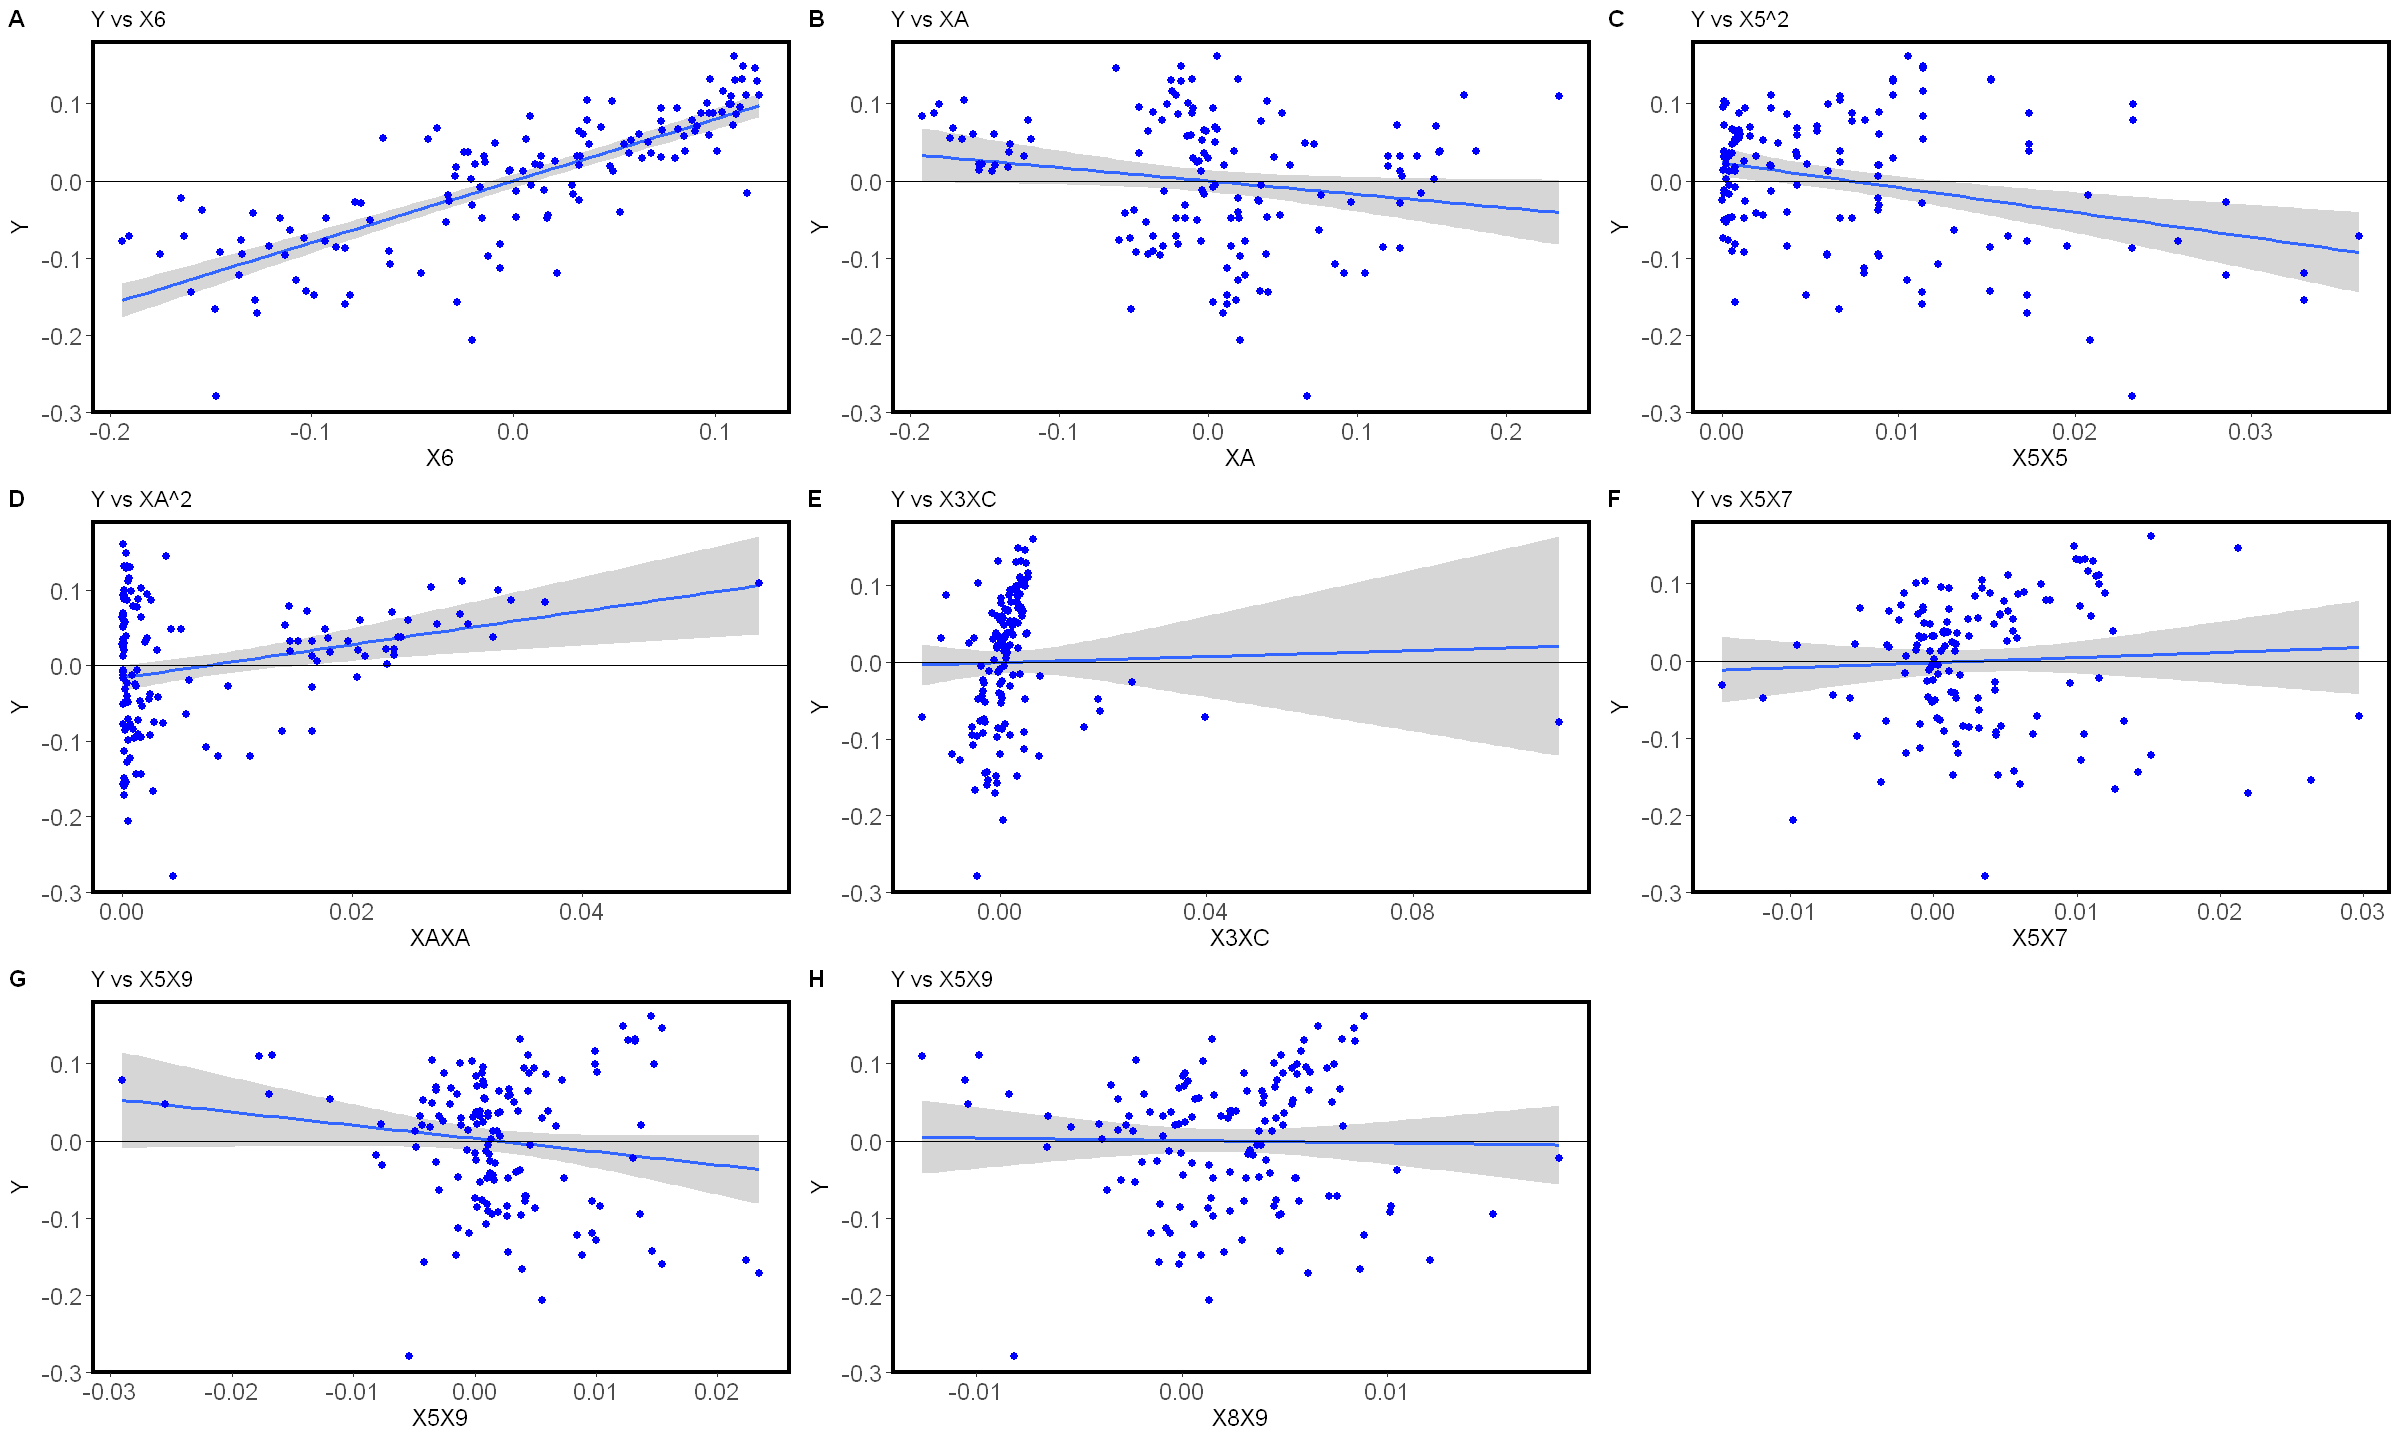

In [138]:
options(repr.plot.width=20, repr.plot.height=12)

plot1 <- ggplot(data=data.frame(df_grid), aes(x=X6, y=Y, group=1)) + geom_smooth(method='lm', formula= y~x) +
                geom_point(aes(x=X6, y=Y, group=1), size=2, fill="blue", color="blue", pch = 21) +
                ggtitle("Y vs X6") + geom_hline(yintercept=0) + plottheme

plot2 <- ggplot(data=data.frame(df_grid), aes(x=XA, y=Y, group=1)) + geom_smooth(method='lm', formula= y~x) +
                geom_point(aes(x=XA, y=Y, group=1), size=2, fill="blue", color="blue", pch = 21) +
                ggtitle("Y vs XA") + geom_hline(yintercept=0) + plottheme

plot3 <- ggplot(data=data.frame(df_grid), aes(x=X5X5, y=Y, group=1)) + geom_smooth(method='lm', formula= y~x) +
                geom_point(aes(x=X5X5, y=Y, group=1), size=2, fill="blue", color="blue", pch = 21) +
                ggtitle("Y vs X5^2") + geom_hline(yintercept=0) + plottheme

plot4 <- ggplot(data=data.frame(df_grid), aes(x=XAXA, y=Y, group=1)) + geom_smooth(method='lm', formula= y~x) +
                geom_point(aes(x=XAXA, y=Y, group=1), size=2, fill="blue", color="blue", pch = 21) +
                ggtitle("Y vs XA^2") + geom_hline(yintercept=0) + plottheme

plot5 <- ggplot(data=data.frame(df_grid), aes(x=X3XC, y=Y, group=1)) + geom_smooth(method='lm', formula= y~x) +
                geom_point(aes(x=X3XC, y=Y, group=1), size=2, fill="blue", color="blue", pch = 21) +
                ggtitle("Y vs X3XC") + geom_hline(yintercept=0) + plottheme

plot6 <- ggplot(data=data.frame(df_grid), aes(x=X5X7, y=Y, group=1)) + geom_smooth(method='lm', formula= y~x) +
                geom_point(aes(x=X5X7, y=Y, group=1), size=2, fill="blue", color="blue", pch = 21) +
                ggtitle("Y vs X5X7") + geom_hline(yintercept=0) + plottheme

plot7 <- ggplot(data=data.frame(df_grid), aes(x=X5X9, y=Y, group=1)) + geom_smooth(method='lm', formula= y~x) +
                geom_point(aes(x=X5X9, y=Y, group=1), size=2, fill="blue", color="blue", pch = 21) +
                ggtitle("Y vs X5X9") + geom_hline(yintercept=0) + plottheme

plot8 <- ggplot(data=data.frame(df_grid), aes(x=X8X9, y=Y, group=1)) + geom_smooth(method='lm', formula= y~x) +
                geom_point(aes(x=X8X9, y=Y, group=1), size=2, fill="blue", color="blue", pch = 21) +
                ggtitle("Y vs X5X9") + geom_hline(yintercept=0) + plottheme

# Show plots
ggarrange(plot1, plot2, plot3, plot4, plot5, plot6, plot7, plot8,
          labels = c("A", "B", "C", "D", "E", "F", "G", "H"),
          ncol =3, nrow = 3)

<div style="background-color: #00f0f0; width: 500px; margin: auto; padding: 20px; border: 2px solid black; border-radius: 5px; font-size: 15px;">

<p><b>Final model 1, based on model terms plot against Y:</b></p>

<p>
X<sub>5</sub>, X<sub>6</sub>, X<sub>9</sub>, X<sub>A</sub>, X<sub>5</sub><sup>2</sup>, X<sub>A</sub><sup>2</sup>, X<sub>5</sub>X<sub>9</sub>
</p>

</div>

### 4.4.2. Model 2 Study

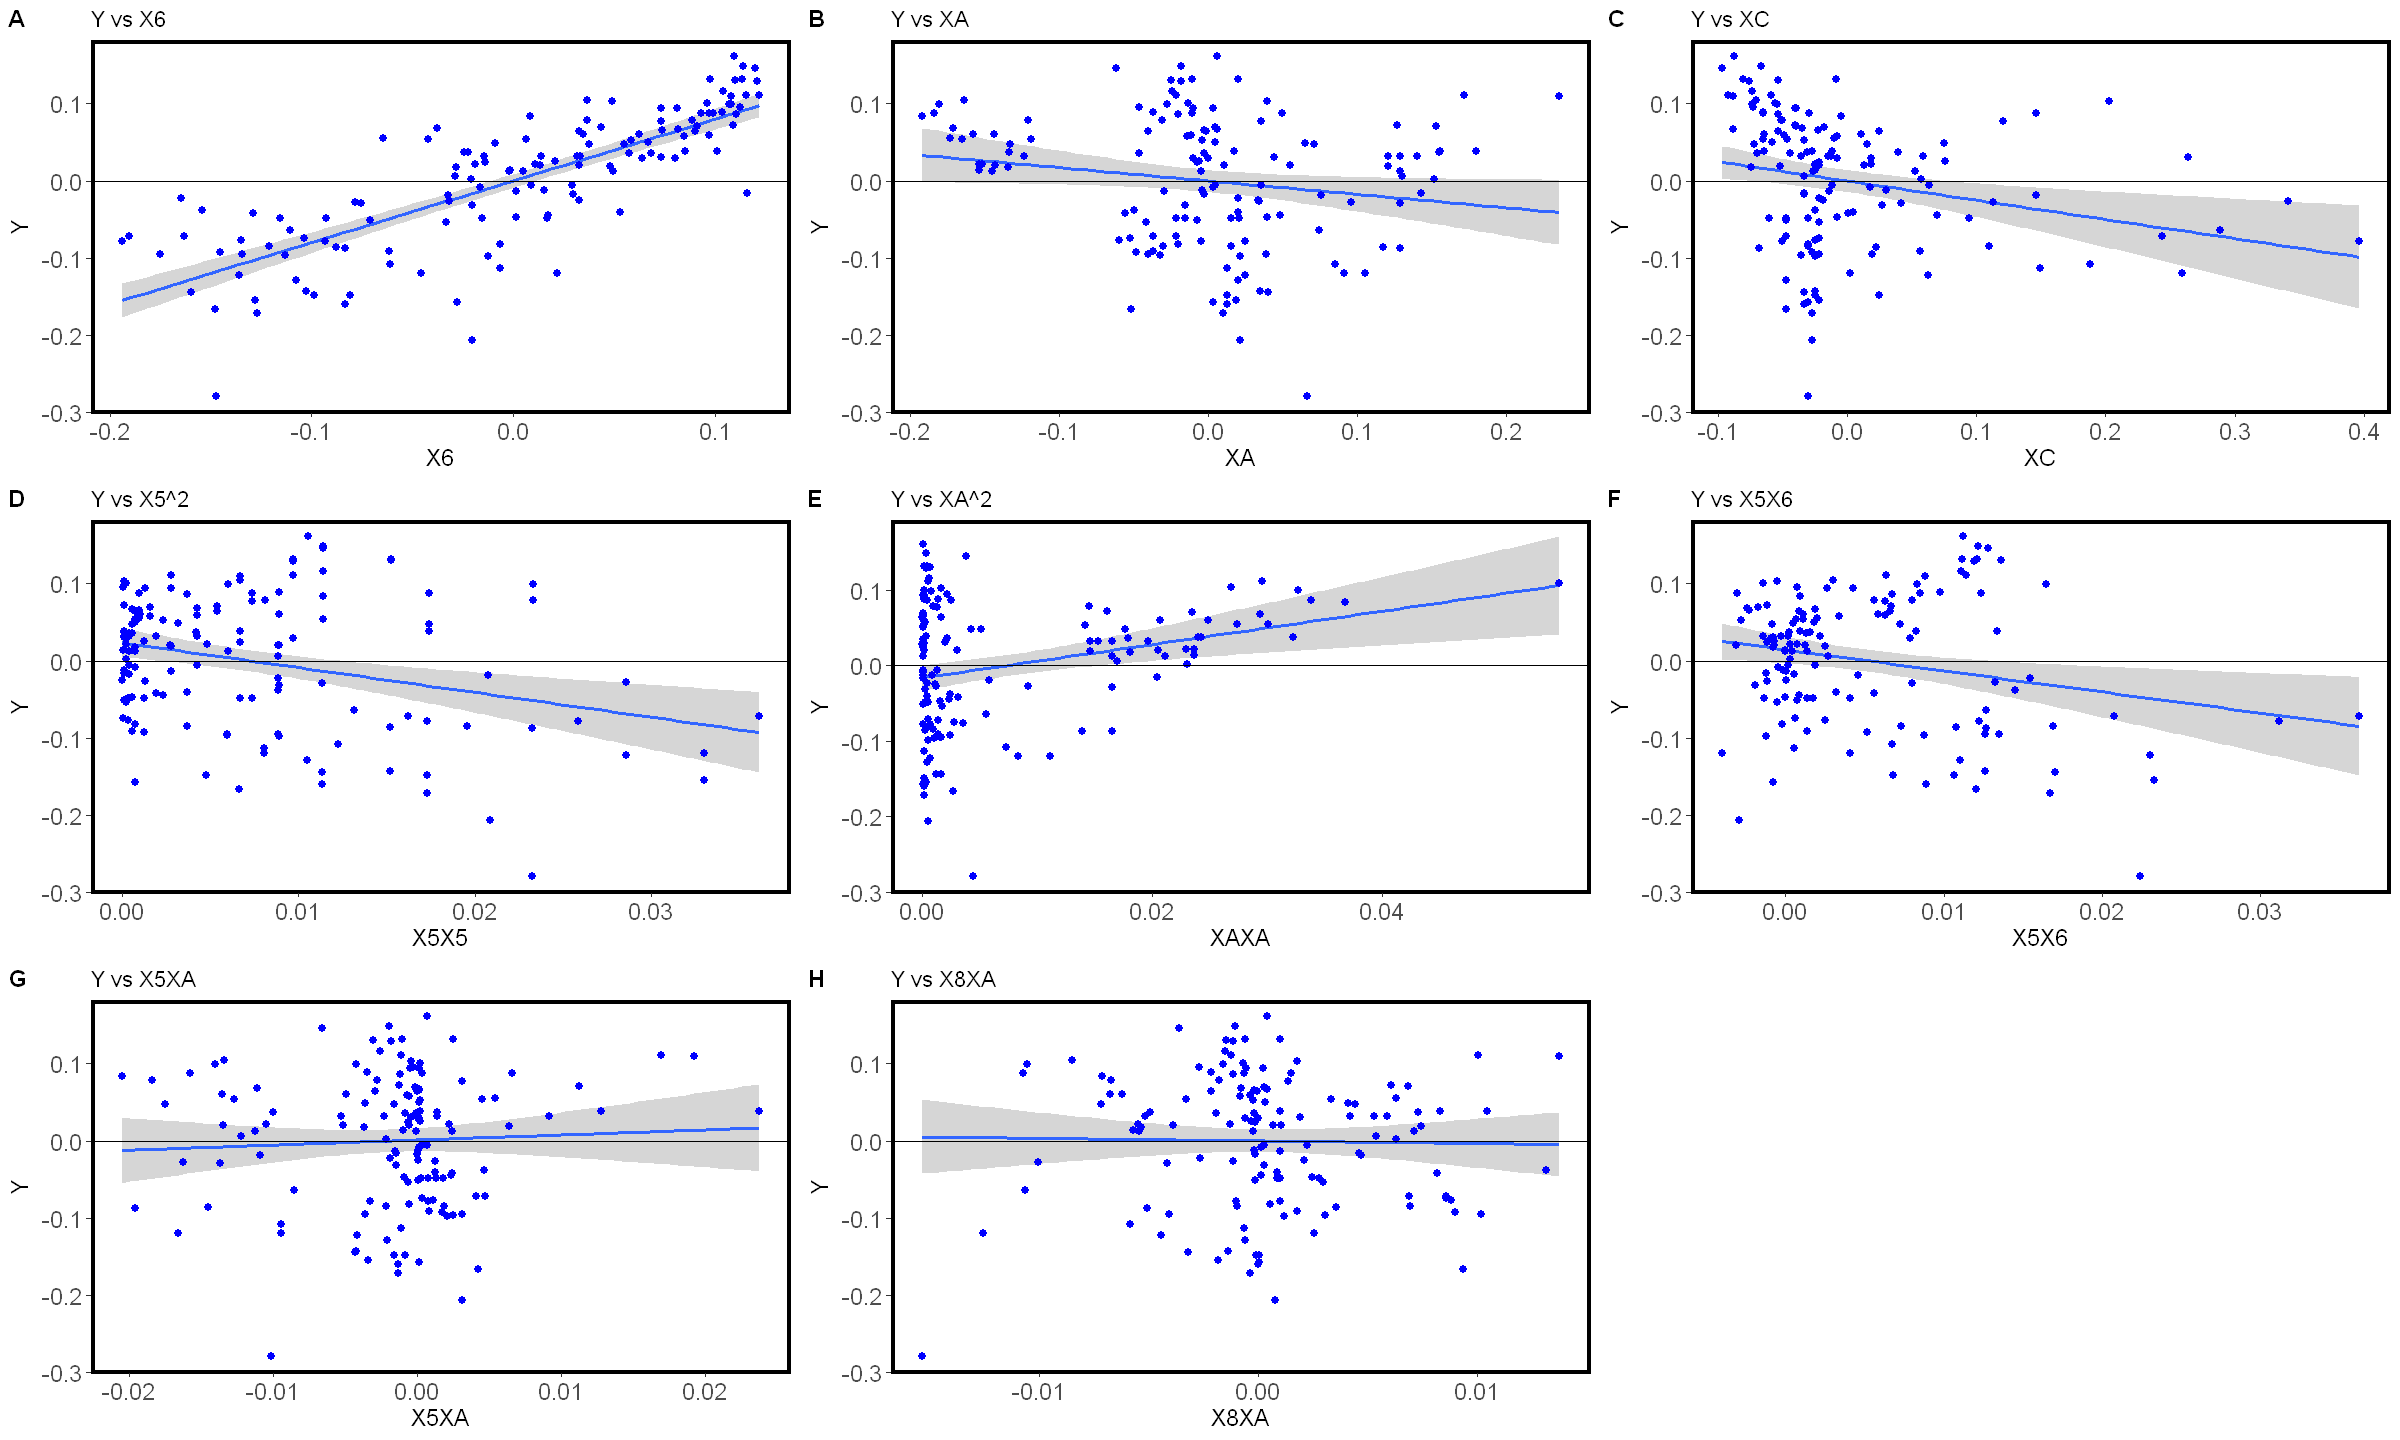

In [139]:
options(repr.plot.width=20, repr.plot.height=12)
plot1 <- ggplot(data=data.frame(df_grid), aes(x=X6, y=Y, group=1)) + geom_smooth(method='lm', formula= y~x) +
                geom_point(aes(x=X6, y=Y, group=1), size=2, fill="blue", color="blue", pch = 21) +
                ggtitle("Y vs X6") + geom_hline(yintercept=0) + plottheme

plot2 <- ggplot(data=data.frame(df_grid), aes(x=XA, y=Y, group=1)) + geom_smooth(method='lm', formula= y~x) +
                geom_point(aes(x=XA, y=Y, group=1), size=2, fill="blue", color="blue", pch = 21) +
                ggtitle("Y vs XA") + geom_hline(yintercept=0) + plottheme

plot3 <- ggplot(data=data.frame(df_grid), aes(x=XC, y=Y, group=1)) + geom_smooth(method='lm', formula= y~x) +
                geom_point(aes(x=XC, y=Y, group=1), size=2, fill="blue", color="blue", pch = 21) +
                ggtitle("Y vs XC") + geom_hline(yintercept=0) + plottheme

plot4 <- ggplot(data=data.frame(df_grid), aes(x=X5X5, y=Y, group=1)) + geom_smooth(method='lm', formula= y~x) +
                geom_point(aes(x=X5X5, y=Y, group=1), size=2, fill="blue", color="blue", pch = 21) +
                ggtitle("Y vs X5^2") + geom_hline(yintercept=0) + plottheme

plot5 <- ggplot(data=data.frame(df_grid), aes(x=XAXA, y=Y, group=1)) + geom_smooth(method='lm', formula= y~x) +
                geom_point(aes(x=XAXA, y=Y, group=1), size=2, fill="blue", color="blue", pch = 21) +
                ggtitle("Y vs XA^2") + geom_hline(yintercept=0) + plottheme

plot6 <- ggplot(data=data.frame(df_grid), aes(x=X5X6, y=Y, group=1)) + geom_smooth(method='lm', formula= y~x) +
                geom_point(aes(x=X5X6, y=Y, group=1), size=2, fill="blue", color="blue", pch = 21) +
                ggtitle("Y vs X5X6") + geom_hline(yintercept=0) + plottheme

plot7 <- ggplot(data=data.frame(df_grid), aes(x=X5XA, y=Y, group=1)) + geom_smooth(method='lm', formula= y~x) +
                geom_point(aes(x=X5XA, y=Y, group=1), size=2, fill="blue", color="blue", pch = 21) +
                ggtitle("Y vs X5XA") + geom_hline(yintercept=0) + plottheme

plot8 <- ggplot(data=data.frame(df_grid), aes(x=X8XA, y=Y, group=1)) + geom_smooth(method='lm', formula= y~x) +
                geom_point(aes(x=X8XA, y=Y, group=1), size=2, fill="blue", color="blue", pch = 21) +
                ggtitle("Y vs X8XA") + geom_hline(yintercept=0) + plottheme

# Show plots
ggarrange(plot1, plot2, plot3, plot4, plot5, plot6, plot7, plot8,
          labels = c("A", "B", "C", "D", "E", "F", "G", "H"),
          ncol =3, nrow = 3)

<div style="background-color: #00f0f0; width: 500px; margin: auto; padding: 20px; border: 2px solid black; border-radius: 5px; font-size: 15px;">

<p><b>Final model 2, based on model terms plot against Y:</b></p>

<p>
X<sub>5</sub>, X<sub>6</sub>, X<sub>A</sub>, X<sub>C</sub>, X<sub>5</sub><sup>2</sup>, X<sub>A</sub><sup>2</sup>, X<sub>5</sub>X<sub>6</sub>
</p>

</div>

### 4.4.3. Model 3 Study

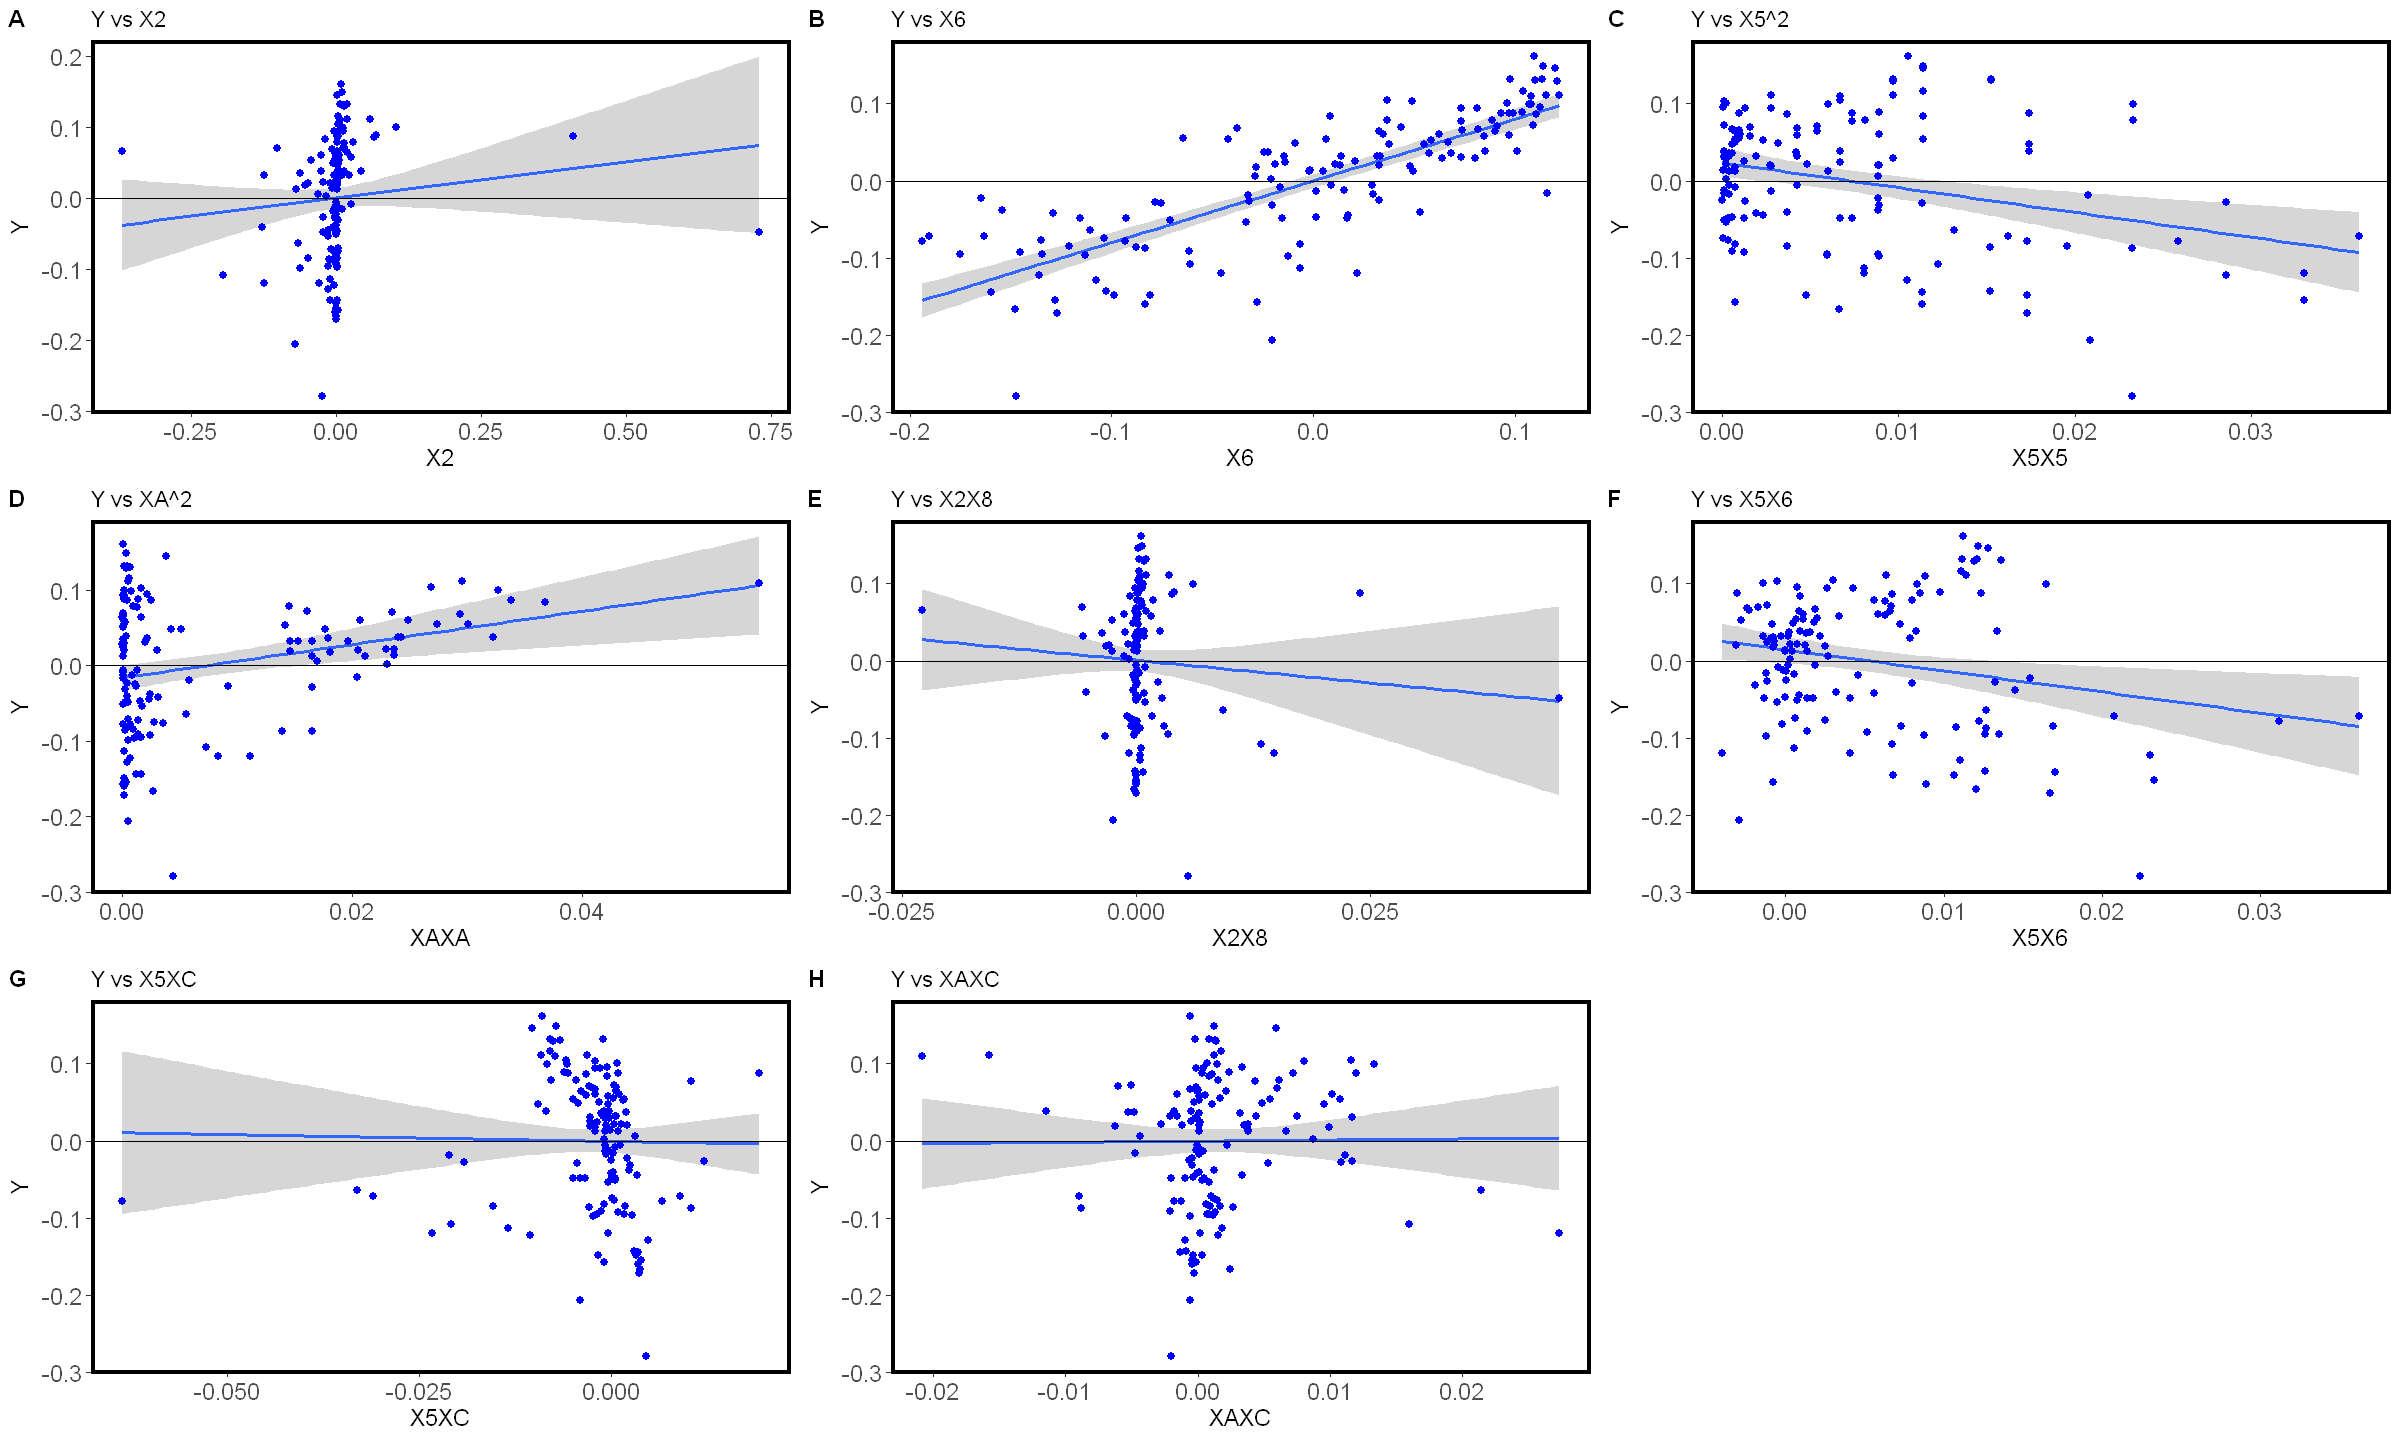

In [140]:
options(repr.plot.width=20, repr.plot.height=12)

plot1 <- ggplot(data=data.frame(df_grid), aes(x=X2, y=Y, group=1)) + geom_smooth(method='lm', formula= y~x) +
                geom_point(aes(x=X2, y=Y, group=1), size=2, fill="blue", color="blue", pch = 21) +
                ggtitle("Y vs X2") + geom_hline(yintercept=0) + plottheme

plot2 <- ggplot(data=data.frame(df_grid), aes(x=X6, y=Y, group=1)) + geom_smooth(method='lm', formula= y~x) +
                geom_point(aes(x=X6, y=Y, group=1), size=2, fill="blue", color="blue", pch = 21) +
                ggtitle("Y vs X6") + geom_hline(yintercept=0) + plottheme

plot3 <- ggplot(data=data.frame(df_grid), aes(x=X5X5, y=Y, group=1)) + geom_smooth(method='lm', formula= y~x) +
                geom_point(aes(x=X5X5, y=Y, group=1), size=2, fill="blue", color="blue", pch = 21) +
                ggtitle("Y vs X5^2") + geom_hline(yintercept=0) + plottheme

plot4 <- ggplot(data=data.frame(df_grid), aes(x=XAXA, y=Y, group=1)) + geom_smooth(method='lm', formula= y~x) +
                geom_point(aes(x=XAXA, y=Y, group=1), size=2, fill="blue", color="blue", pch = 21) +
                ggtitle("Y vs XA^2") + geom_hline(yintercept=0) + plottheme

plot5 <- ggplot(data=data.frame(df_grid), aes(x=X2X8, y=Y, group=1)) + geom_smooth(method='lm', formula= y~x) +
                geom_point(aes(x=X2X8, y=Y, group=1), size=2, fill="blue", color="blue", pch = 21) +
                ggtitle("Y vs X2X8") + geom_hline(yintercept=0) + plottheme

plot6 <- ggplot(data=data.frame(df_grid), aes(x=X5X6, y=Y, group=1)) + geom_smooth(method='lm', formula= y~x) +
                geom_point(aes(x=X5X6, y=Y, group=1), size=2, fill="blue", color="blue", pch = 21) +
                ggtitle("Y vs X5X6") + geom_hline(yintercept=0) + plottheme

plot7 <- ggplot(data=data.frame(df_grid), aes(x=X5XC, y=Y, group=1)) + geom_smooth(method='lm', formula= y~x) +
                geom_point(aes(x=X5XC, y=Y, group=1), size=2, fill="blue", color="blue", pch = 21) +
                ggtitle("Y vs X5XC") + geom_hline(yintercept=0) + plottheme

plot8 <- ggplot(data=data.frame(df_grid), aes(x=XAXC, y=Y, group=1)) + geom_smooth(method='lm', formula= y~x) +
                geom_point(aes(x=XAXC, y=Y, group=1), size=2, fill="blue", color="blue", pch = 21) +
                ggtitle("Y vs XAXC") + geom_hline(yintercept=0) + plottheme

#Show plots
ggarrange(plot1, plot2, plot3, plot4, plot5, plot6, plot7, plot8,
labels = c("A", "B", "C", "D", "E", "F", "G", "H"),
ncol = 3, nrow = 3)

<div style="background-color: #00f0f0; width: 500px; margin: auto; padding: 20px; border: 2px solid black; border-radius: 5px; font-size: 15px;">

<p><b>Final model 3, based on model terms plot against Y:</b></p>

<p>
X<sub>2</sub>, X<sub>5</sub>, X<sub>6</sub>, X<sub>8</sub>, X<sub>A</sub>, X<sub>5</sub><sup>2</sup>, X<sub>A</sub><sup>2</sup>, X<sub>2</sub>X<sub>8</sub>, X<sub>5</sub>X<sub>6</sub>
</p>

</div>

# 5. Train-Test Split

In [141]:
# 80-20 ratio for train-test split
smp_size <- floor(0.80 * nrow(df_grid))+1
# The seed is set to reproduce train-test split
set.seed(139)
train_indexes <- sample(nrow(df_grid), size = smp_size)
df_train <- df_grid[train_indexes, ]
df_test <- df_grid[-train_indexes, ]

In [142]:
print(paste("Number of records in train dataset:", nrow(df_train)))
print(paste("Number of records in test dataset:", nrow(df_test)))

[1] "Number of records in train dataset: 110"
[1] "Number of records in test dataset: 27"


## 5.1. Validation of split

In [143]:
no_of_variables <- 15 # p+1
Train.Model <- lm(Y ~ X2+X3+X4+X5+X6+X7+X8+X9+XA+XC+D1+D2+D3+D4, data=df_train)
Test.Model <- lm(Y ~ X2+X3+X4+X5+X6+X7+X8+X9+XA+XC+D1+D2+D3+D4, data=df_test)
# summary(Train.Model)
# summary(Test.Model)

In [144]:
# Mean Squared Prediction Error
Y_hat_Test <- predict(Train.Model, df_test)

MSPR <- sum((df_test$Y - Y_hat_Test)^2)/length(df_test$Y)
MSE <- sum((df_train$Y - predict(Train.Model, df_train))^2)/(length(df_train$Y)-no_of_variables)

MSPR
MSE
sqrt(MSPR/MSE)

[1] 0.002467477

[1] 0.002440857

[1] 1.005438

## 5.2. Final models on train dataset

#### Model 1

In [145]:
Model1 <- lm(Y~X5+X6+X9+XA+X5X5+XAXA+X5X9, data=df_train)

#### Model 2

In [146]:
Model2 <- lm(Y~X5+X6+XA+XC+X5X5+XAXA+X5X6, data=df_train)

#### Model 3

In [147]:
Model3 <- lm(Y~X2+X5+X6+X8+XA+X5X5+XAXA+X2X8+X5X6, data=df_train)

# 6. Multicollinearity check with in terms of selected models

## 6.1. Variance inflation factor (VIF) calculation and test

### 6.1.1 VIF test for Model 1

In [148]:
VIF1_i <- vif(Model1)
VIF1_i <- as.data.frame(VIF1_i)
VIF1_i
print(paste("Mean VIF value for terms in Model 1:", round(mean(VIF1_i$VIF1_i), 2)))

,VIF1_i
,<dbl>
X5,2.681041
X6,3.416722
X9,1.789780
XA,1.192934
X5X5,1.259176
XAXA,1.390519
X5X9,1.284611


[1] "Mean VIF value for terms in Model 1: 1.86"


<div style="background-color: #00f0f0; width: 800px; margin: auto; padding: 20px; border: 2px solid black; border-radius: 5px; font-size: 15px;">

<p>
<b>For model 1, VIF for each individual term is less than 5 (highest is 3.41).</b>
Mean VIF of all terms is 1.86, which is not considerably high. So, we can conclude that 
<b>Model 1 is free from any form of high multicollinearity between terms.</b>
</p>

</div>


### 6.1.2 VIF test for Model 2

In [149]:
VIF2_i <- vif(Model2)
VIF2_i <- as.data.frame(VIF2_i)
VIF2_i
print(paste("Mean VIF value for terms in Model 2:", round(mean(VIF2_i$VIF2_i), 2)))

,VIF2_i
,<dbl>
X5,2.686252
X6,2.698322
XA,1.217935
XC,1.159395
X5X5,2.946631
XAXA,1.067990
X5X6,3.118618


[1] "Mean VIF value for terms in Model 2: 2.13"


<div style="background-color: #00f0f0; width: 800px; margin: auto; padding: 20px; border: 2px solid black; border-radius: 5px; font-size: 15px;">

<p>
<b>For model 2, VIF for each individual term is less than 5 (highest is 3.12).</b>
Mean VIF of all terms is 1.86, which is not considerably high. So, we can conclude that 
<b>Model 2 is free from any form of high multicollinearity between terms.</b>
</p>

</div>


### 6.1.3 VIF test for Model 3

In [150]:
VIF3_i <- vif(Model3)
VIF3_i <- as.data.frame(VIF3_i)
VIF3_i
print(paste("Mean VIF value for terms in Model 3:", round(mean(VIF3_i$VIF3_i), 2)))

,VIF3_i
,<dbl>
X2,11.173728
X5,2.693544
X6,5.629122
X8,5.331462
XA,1.241252
X5X5,3.516216
XAXA,1.132762
X2X8,10.821626
X5X6,4.803318


[1] "Mean VIF value for terms in Model 3: 5.15"


<div style="background-color: #00f0f0; width: 800px; margin: auto; padding: 20px; border: 2px solid black; border-radius: 5px; font-size: 15px;">

<p>
<b>For model 3, VIF for few individual terms are more than 10. Also, mean VIF of all terms is more than to 5. To handle this situation, term with highest VIF i.e. X<sub>2</sub> should be removed from model.</b>
</p>

</div>


#### VIF test for modified Model 3

In [151]:
Model3m <- lm(Y~X5+X6+X8+XA+X5X5+XAXA+X5X6, data=df_train)
VIF3m_i <- vif(Model3m)

VIF3m_i <- as.data.frame(VIF3m_i)
VIF3m_i
print(paste("Mean VIF value for terms in Model 3:", round(mean(VIF3m_i$VIF3m_i), 2)))

,VIF3m_i
,<dbl>
X5,2.685372
X6,5.610383
X8,5.246337
XA,1.205252
X5X5,3.342227
XAXA,1.054928
X5X6,4.462977


[1] "Mean VIF value for terms in Model 3: 3.37"


<div style="background-color: #00f0f0; width: 800px; margin: auto; padding: 20px; border: 2px solid black; border-radius: 5px; font-size: 15px;">

<p>
<b>For model 3, VIF for few individual terms are more than 5. Also, mean VIF of all terms is more than to 3. To handle this situation, term with highest VIF i.e. X<sub>6</sub> should be removed from model.</b>
</p>

</div>


In [152]:
Model3m <- lm(Y~X5+X8+XA+X5X5+XAXA, data=df_train)
VIF3m_i <- vif(Model3m)
VIF3m_i <- as.data.frame(VIF3m_i)
VIF3m_i
print(paste("Mean VIF value for terms in Model 3:", round(mean(VIF3m_i$VIF3m_i), 2)))

,VIF3m_i
,<dbl>
X5,1.851003
X8,1.902165
XA,1.171483
X5X5,1.209580
XAXA,1.051992


[1] "Mean VIF value for terms in Model 3: 1.44"


<div style="background-color: #00f0f0; width: 820px; margin: auto; padding: 20px; border: 2px solid black; border-radius: 5px; font-size: 15px;">

<p>
<b>With modified model 3, VIF for each individual term is less than 5 (highest is 1.90).</b>
Mean VIF of all terms is 1.44 (&lt; 2), which is not considerably high.
So, we can conclude that current <b>Model 3 is free from any form of high multicollinearity between terms.</b>
After modification final model 3 is as follows:
</p>

<p>
X<sub>5</sub>, X<sub>8</sub>, X<sub>A</sub>, X<sub>5</sub><sup>2</sup>, X<sub>A</sub><sup>2</sup>
</p>

</div>


In [153]:
Model3 <- lm(Y~X5+X8+XA+X5X5+XAXA, data=df_train)

# 7. Outlier Study and Influential Cases

## 7.1. For Model 1

### 7.1.1. Identifying Outlying Observations

In [154]:
# finding the number of data point
n <- length(df_train$Y)
#X_0 <- rep(1, n)
X <- as.matrix(cbind(df_train$'(Intercept)', df_train$X5, df_train$X6, df_train$X9, df_train$XA, df_train$X5X5,
df_train$XAXA, df_train$X5X9))
Y <- as.matrix(df_train$Y, ncol=1)
p <- ncol(X)
XtX <- t(X) %*% X
XXI <- solve(XtX)
XtY <- t(X) %*% Y
b <- XXI %*% XtY
Y_hat <- X %*% b
e <- Y - Y_hat
H <- X %*% XXI %*% t(X)
J_n <- matrix(rep(1/n, n^2), ncol=n)
I_n <- diag(n)
SSE <- t(Y) %*% (I_n - H) %*% Y
MSE <- SSE/(n-p)
s2_e<- MSE[1,1] * (I_n-H)
s_e <- sqrt(diag(s2_e))

In [155]:
# Semistudentized residuals
e_star <-e/sqrt(MSE[1,1])
# Studentized residuals
r <-e/sqrt(MSE[1,1]*(1-diag(H)))
# Deleted Residuals
d <-e/(1-diag(H))
# Deleted Studentized Residuals
t <-e*sqrt((n-p-1)/(SSE[1,1]*(1-diag(H))-e^2))

In [156]:
table <- cbind(df_train$X5, df_train$X6, df_train$X9, df_train$XA, df_train$X5X5,
               df_train$XAXA, df_train$X5X9, Y, Y_hat, e, e_star, r, d, abs(t)-qt(1-alpha/(2*n),n-p-1))

colnames(table) <- cbind("X5","X6", "X9", "XA", "X5^2", "XA^2", "X5*X9", "Y", "Y_hat", "e",
                         "Semistudentized e_star", "Studentized r", "Deleted Residuals d", "|t|-t(1-alpha/2n;n-p-1)")

table <- as.data.frame(table)
rownames(table) <- rownames(df_train)
table[table$"|t|-t(1-alpha/2n;n-p-1)" > 0, ]

,X5,X6,X9,XA,X5^2,XA^2,X5*X9,Y,Y_hat,e,Semistudentized e_star,Studentized r,Deleted Residuals d,|t|-t(1-alpha/2n;n-p-1)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Afghanistan,-0.1524409,-0.14709924,0.03558877,0.06668694,0.02323824,0.0044471473,-0.005425185,-0.2784500,-0.11552087,-0.1629292,-3.401236,-3.636087,-0.1862062,0.2532159
Lebanon,0.1444145,-0.02040578,0.03842227,0.02155388,0.02085555,0.0004645696,0.005548733,-0.2062449,-0.04075734,-0.1654875,-3.454643,-3.736349,-0.1935770,0.3768509


<div style="background-color: #00f0f0; width: 750px; margin: auto; padding: 20px; border: 2px solid black; border-radius: 5px; font-size: 15px;">

<p><b>Outlying <i>Y</i> Observations (Total-2) for Model 1 are:</b></p>

<ul>
  <li>Afghanistan</li>
  <li>Lebanon</li>
</ul>

</div>


### 7.1.2. Identifying Outlying Observations

In [157]:
Leverage_test <- diag(H)-(2*p/n)*df_train$'(Intercept)'
LT <- cbind(df_train$X5, df_train$X6, df_train$X9, df_train$XA, df_train$X5X5,
            df_train$XAXA, df_train$X5X9, Y, diag(H), Leverage_test)
colnames(LT) <- cbind("X5","X6", "X9", "XA", "X5^2", "XA^2", "X5*X9", "Y", "h_ii", "h_ii-2p/n")

LT <- as.data.frame(LT)
rownames(LT) <- rownames(df_train)
LT[LT$"h_ii-2p/n" > 0, ]

,X5,X6,X9,XA,X5^2,XA^2,X5*X9,Y,h_ii,h_ii-2p/n
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Japan,0.13187133,0.10128663,0.04583032,0.17963563,0.017390048,0.0322689581,0.006043705,0.03808564,0.1758225,0.03036793
Canada,0.07751751,0.10739904,0.12776274,-0.18087184,0.006008965,0.0327146220,0.009903850,0.09935061,0.1922304,0.04677581
Lesotho,-0.13153563,-0.12709501,-0.17777689,0.01021259,0.017301621,0.0001042970,0.023383995,-0.17123633,0.1672201,0.02176553
Niger,-0.19007050,-0.19044174,-0.02244669,-0.02150588,0.036126797,0.0004625028,0.004266454,-0.07131609,0.1649245,0.01946997
Chile,0.09424177,0.06238951,-0.17948382,-0.14373802,0.008881510,0.0206606191,-0.016914872,0.05996599,0.1761144,0.03065985
Mauritius,-0.09390606,0.03293884,-0.14630119,0.05515998,0.008818348,0.0030426234,0.013738568,0.02058137,0.1661362,0.02068163
Malawi,-0.18170838,-0.12820636,-0.12315528,0.01872242,0.033017935,0.0003505291,0.022378347,-0.15446140,0.1860647,0.04061011
Argentina,0.13187133,0.05516576,-0.19313922,-0.13290733,0.017390048,0.0176643574,-0.025469526,0.04756713,0.3181997,0.17274516
New Zealand,0.08169858,0.10795471,-0.21703618,0.23533635,0.006674658,0.0553831977,-0.017731547,0.10883209,0.3366636,0.19120904


<div style="background-color: #00f0f0; width: 750px; margin: auto; padding: 20px; border: 2px solid black; border-radius: 5px; font-size: 15px;">

<p><b>Outlying <i>X</i> Observations (Total-9) for Model 1 are:</b></p>

<ul>
  <li>Japan</li>
  <li>Canada</li>
  <li>Lesotho</li>
  <li>Niger</li>
  <li>Chile</li>
  <li>Mauritius</li>
  <li>Malawi</li>
  <li>Argentina</li>
  <li>New Zealand</li>
</ul>

</div>


### 7.1.3. Influential Cases

#### 7.1.3.1. DFFITS & Cook's distance

In [158]:
DFFITS_i               <- t*sqrt(diag(H)/(1-diag(H)))
D_i                    <- e^2*diag(H)/(p*MSE[1,1]*(1-diag(H))^2)
Influe_table           <- cbind(Y_hat, e, DFFITS_i, D_i, D_i-qf(0.5,p,n-p))
colnames(Influe_table) <- cbind("Y_hat", "e_i", "(DFFITS)_i", "D_i", "D_i-F(0.5;p,n-p)")
Influe_table           <- as.data.frame(Influe_table)
rownames(Influe_table) <- rownames(df_train)

Influe_table[Influe_table$"D_i-F(0.5;p,n-p)" > 0, ]

Y_hat,e_i,(DFFITS)_i,D_i,"D_i-F(0.5;p,n-p)"
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>


#### Cook's distance histogram

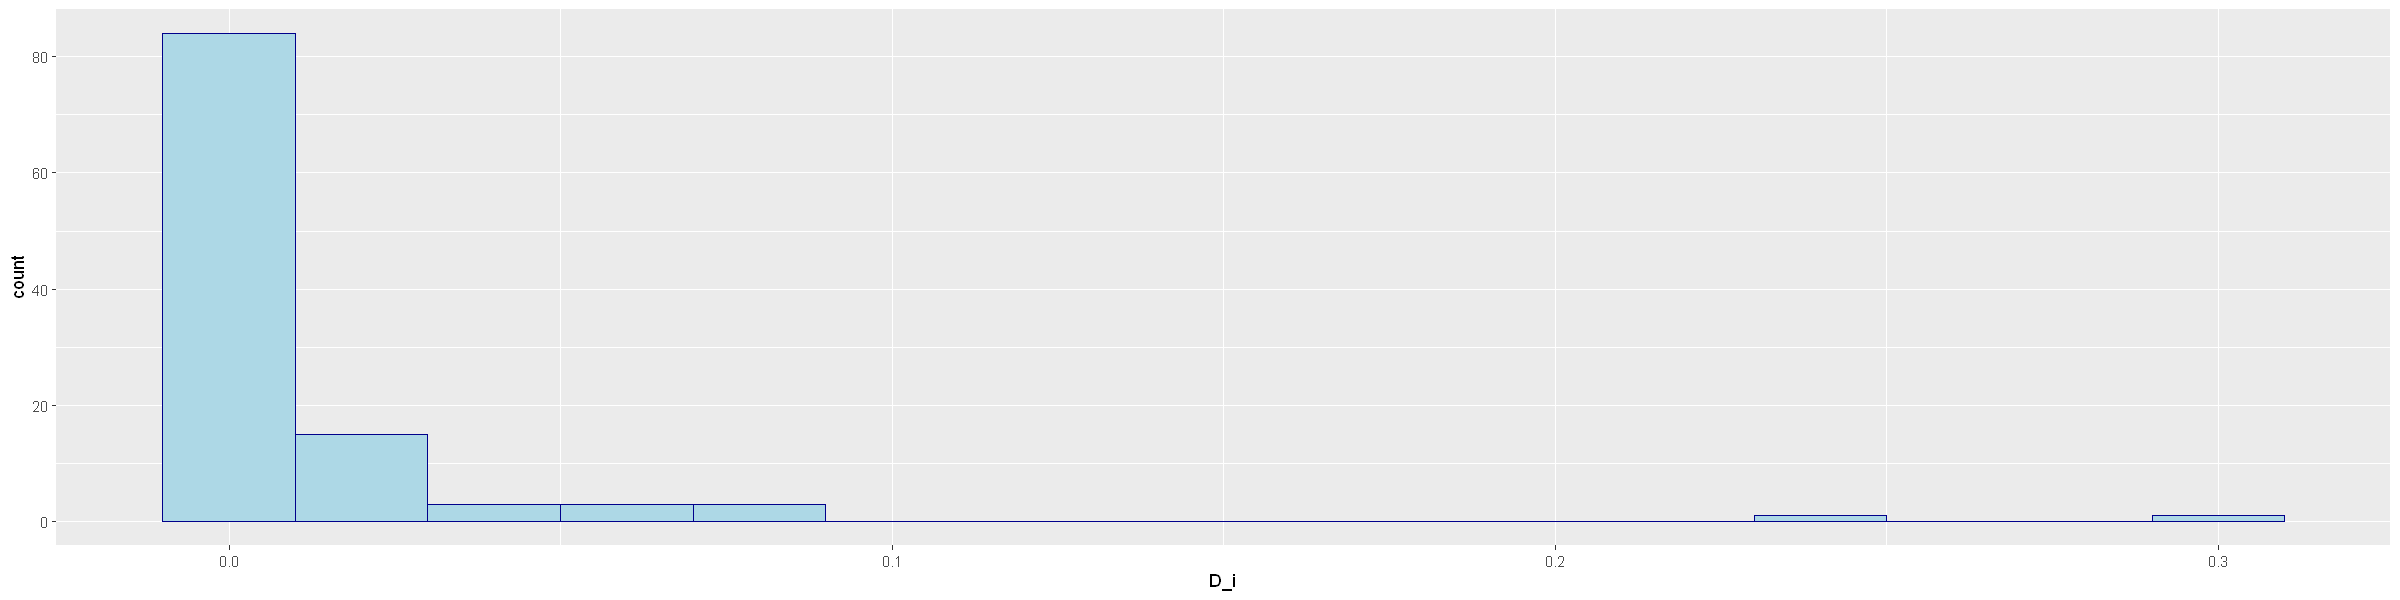

In [159]:
options(repr.plot.width=20, repr.plot.height=5)
df_D_i <- as.data.frame(D_i)

# Change line color and fill color
ggplot(df_D_i, aes(x=D_i)) + geom_histogram(color="darkblue", fill="lightblue", binwidth=0.02)

#### 7.1.3.2. DFBETAS and Cook's distance

#### Model Summary

In [160]:
summary(Model1)


Call:
lm(formula = Y ~ X5 + X6 + X9 + XA + X5X5 + XAXA + X5X9, data = df_train)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.16549 -0.02165  0.00590  0.03086  0.12081 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.005963   0.007447  -0.801 0.425162    
X5          -0.091890   0.087827  -1.046 0.297915    
X6           0.745485   0.092653   8.046 1.62e-12 ***
X9           0.140240   0.072810   1.926 0.056874 .  
XA          -0.205295   0.059284  -3.463 0.000782 ***
X5X5        -0.449421   0.641005  -0.701 0.484825    
XAXA         1.487101   0.503923   2.951 0.003929 ** 
X5X9         0.253529   0.735626   0.345 0.731071    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.0479 on 102 degrees of freedom
Multiple R-squared:  0.7242,	Adjusted R-squared:  0.7052 
F-statistic: 38.26 on 7 and 102 DF,  p-value: < 2.2e-16


#### Model plots

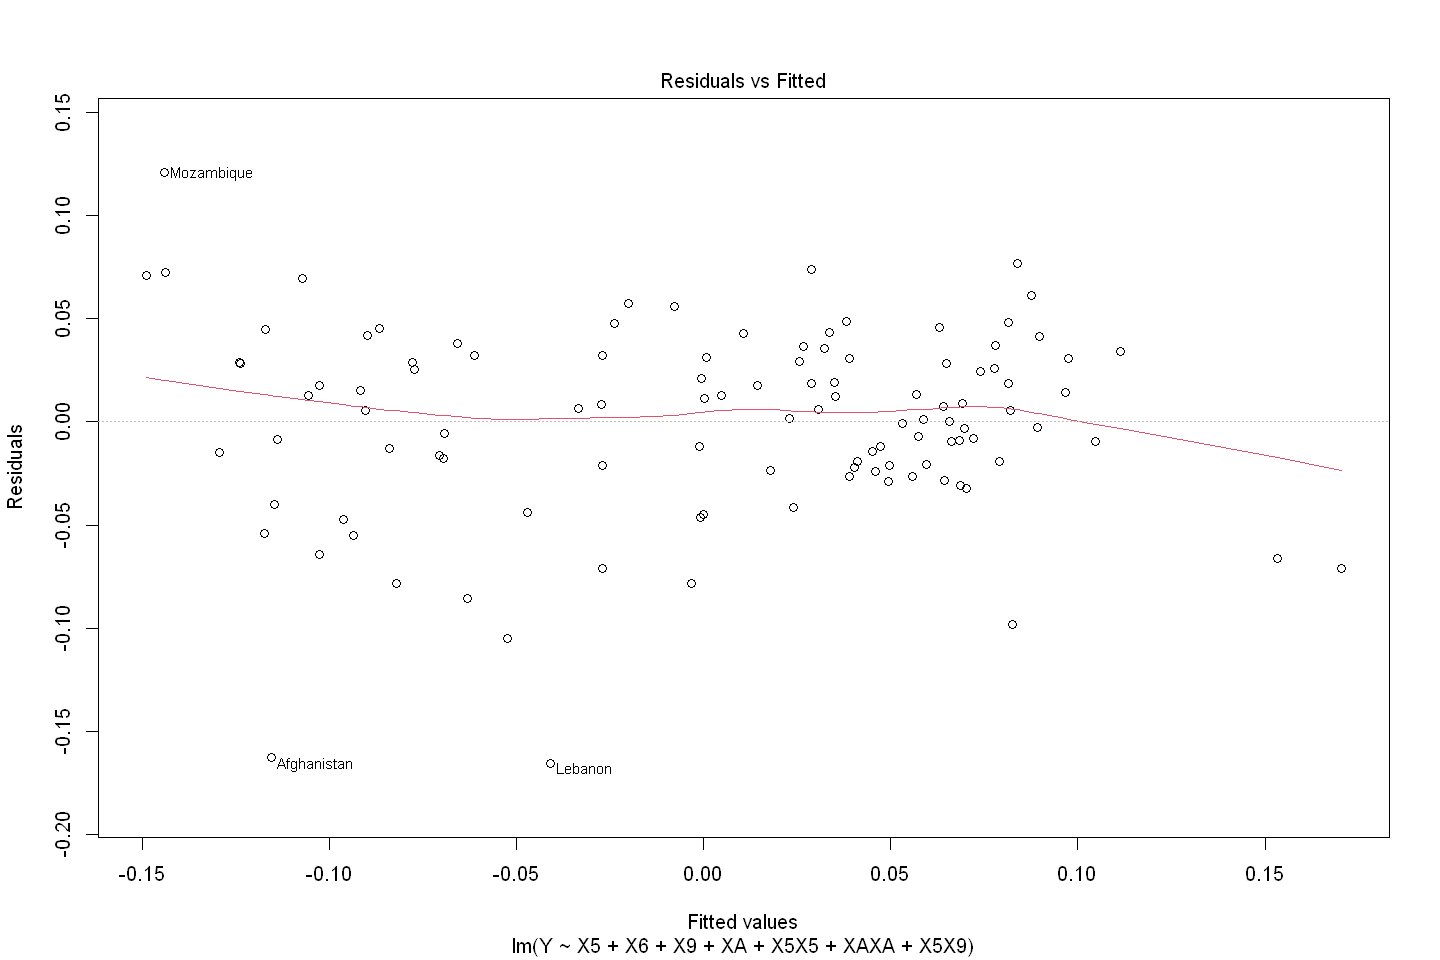

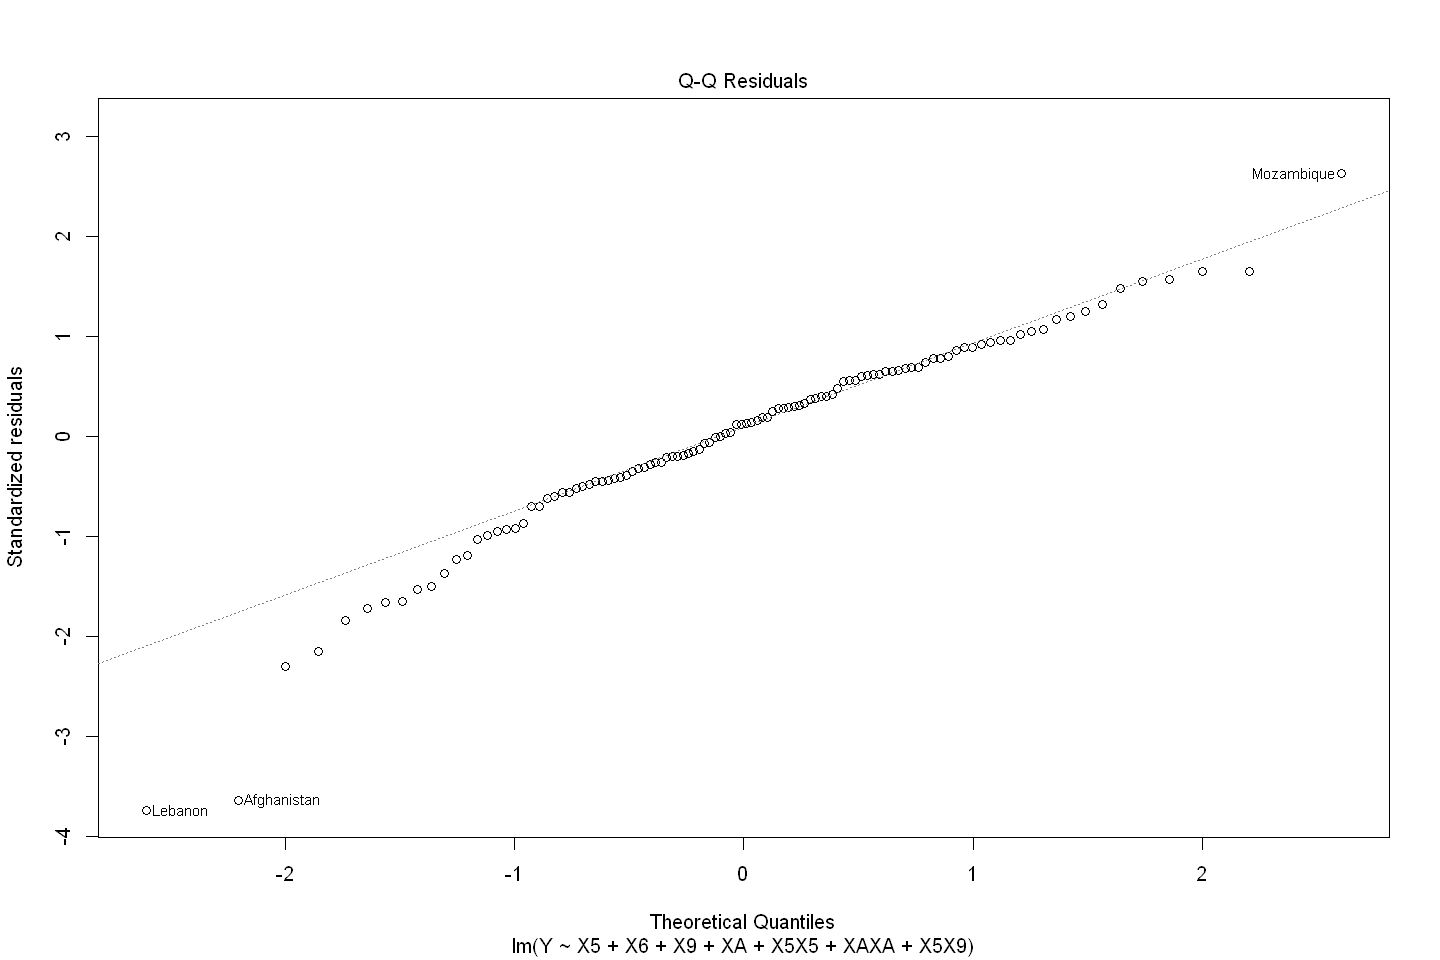

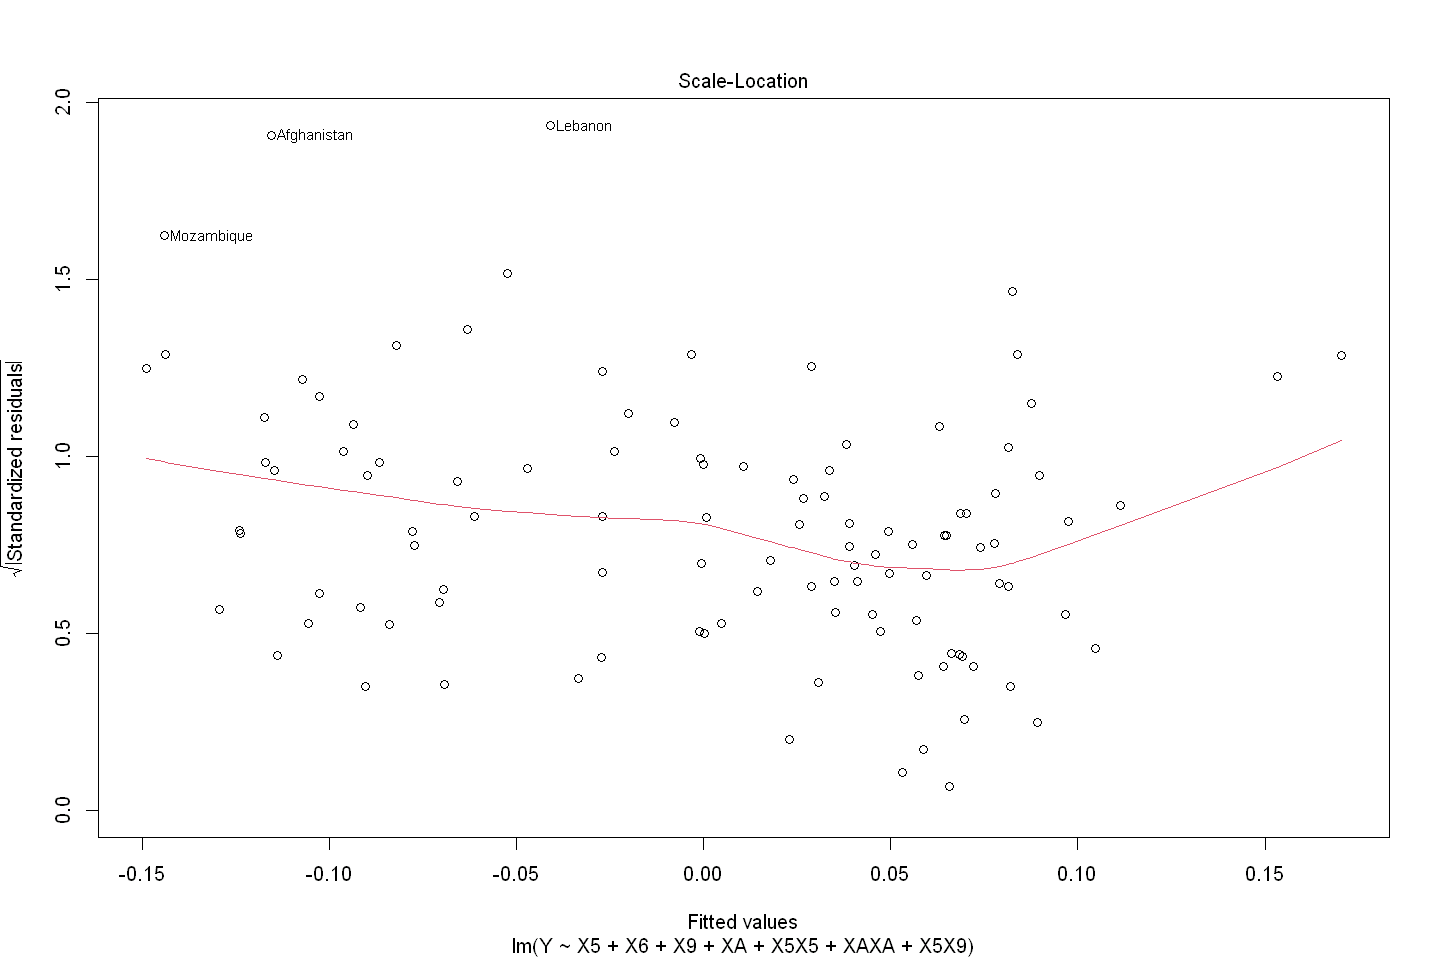

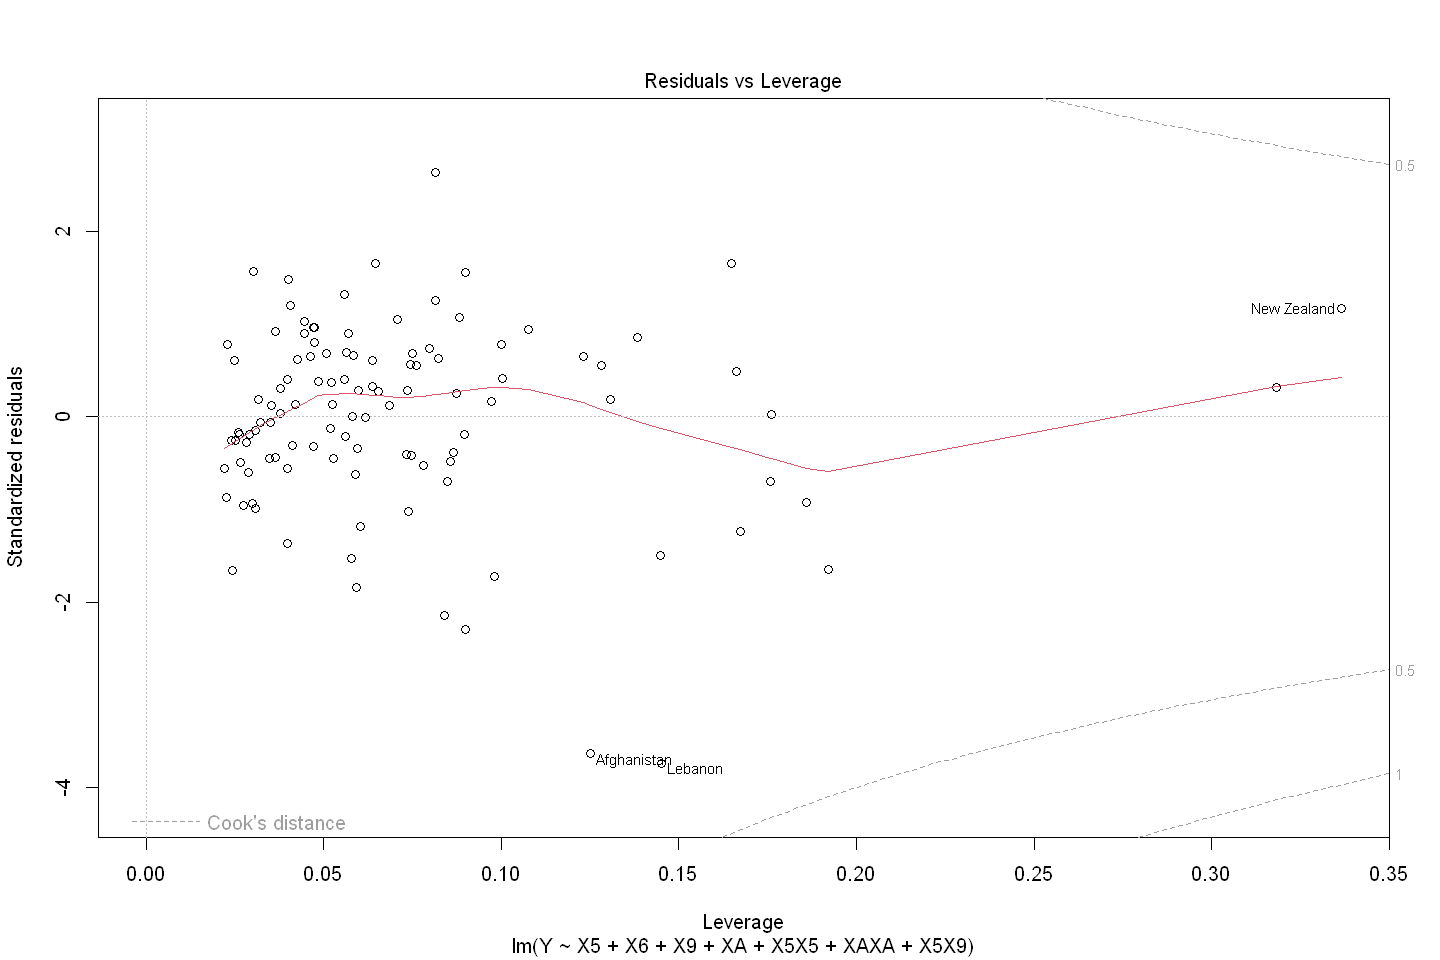

In [161]:
options(repr.plot.width=12, repr.plot.height=8)
plot(Model1)

#### DFBETAS

In [164]:
df_betas <- dfbetas(Model1)
threshold_betas <- 2/sqrt(n)

df_betas <- as.data.frame(df_betas)

df_betas <- df_betas[(df_betas$'(Intercept)' > threshold_betas) | (df_betas$X5 > threshold_betas)
                    | (df_betas$X6 > threshold_betas) | (df_betas$X9 > threshold_betas) | (df_betas$XA > threshold_betas)
                    | (df_betas$X5X5 > threshold_betas) | (df_betas$XAXA > threshold_betas)
                    | (df_betas$X5X9 > threshold_betas), ]

df_betas$'(Intercept)'[df_betas$'(Intercept)' <= threshold_betas] <- 0
df_betas$X5   [df_betas$X5      <= threshold_betas] <- 0
df_betas$X6   [df_betas$X6      <= threshold_betas] <- 0
df_betas$X9   [df_betas$X9      <= threshold_betas] <- 0
df_betas$XA   [df_betas$XA      <= threshold_betas] <- 0
df_betas$X5X5 [df_betas$X5X5    <= threshold_betas] <- 0
df_betas$XAXA [df_betas$XAXA    <= threshold_betas] <- 0
df_betas$X5X9 [df_betas$X5X9    <= threshold_betas] <- 0

df_betas

,(Intercept),X5,X6,X9,XA,X5X5,XAXA,X5X9
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Afghanistan,0.0000000,0.0000000,0.4394326,0.0000000,0.0000000,0.0000000,0.0000000,0.8457948
Zambia,0.0000000,0.0000000,0.0000000,0.1954950,0.0000000,0.0000000,0.0000000,0.0000000
Canada,0.2768567,0.0000000,0.0000000,0.0000000,0.4182115,0.0000000,0.0000000,0.0000000
Nepal,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.2319289,0.0000000,0.0000000
Kuwait,0.2359946,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000
Jordan,0.0000000,0.0000000,0.2394390,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000
Lesotho,0.0000000,0.0000000,0.0000000,0.3307749,0.0000000,0.0000000,0.0000000,0.0000000
Chad,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.2860185,0.0000000,0.0000000
Philippines,0.0000000,0.0000000,0.0000000,0.0000000,0.2246693,0.0000000,0.2328391,0.0000000


#### 7.1.3.3. Measure of Influence

In [165]:
options(width=1000)
infl <- influence.measures(Model1)
infl

Influence measures of
	 lm(formula = Y ~ X5 + X6 + X9 + XA + X5X5 + XAXA + X5X9, data = df_train) :

                          dfb.1_    dfb.X5    dfb.X6    dfb.X9    dfb.XA  dfb.X5X5  dfb.XAXA  dfb.X5X9    dffit cov.r   cook.d    hat inf
Singapore               0.018650 -2.13e-02  3.36e-02 -0.030949  1.68e-02 -0.015498  1.55e-03  0.007708  0.05377 1.196 3.65e-04 0.0972    
Germany                -0.005064  1.88e-03 -5.37e-03 -0.000627  2.43e-03  0.000553  3.28e-03 -0.001984 -0.01123 1.118 1.59e-05 0.0323    
Bolivia                 0.025456  6.18e-04  6.71e-03 -0.038467 -3.48e-02 -0.017468  7.76e-03 -0.001400  0.07318 1.151 6.76e-04 0.0653    
Namibia                 0.110914  3.12e-02 -3.31e-03 -0.115881  1.91e-02 -0.064631 -7.19e-02  0.012349  0.15923 1.143 3.19e-03 0.0760    
Thailand                0.032903 -3.03e-02  2.43e-02 -0.018224  4.40e-02 -0.034791  2.13e-02  0.010055  0.08560 1.125 9.24e-04 0.0487    
Cyprus                 -0.064246  3.63e-02 -5.19e-02  0.019630  2.44e-0

#### 7.1.3.4. Plots of Influence

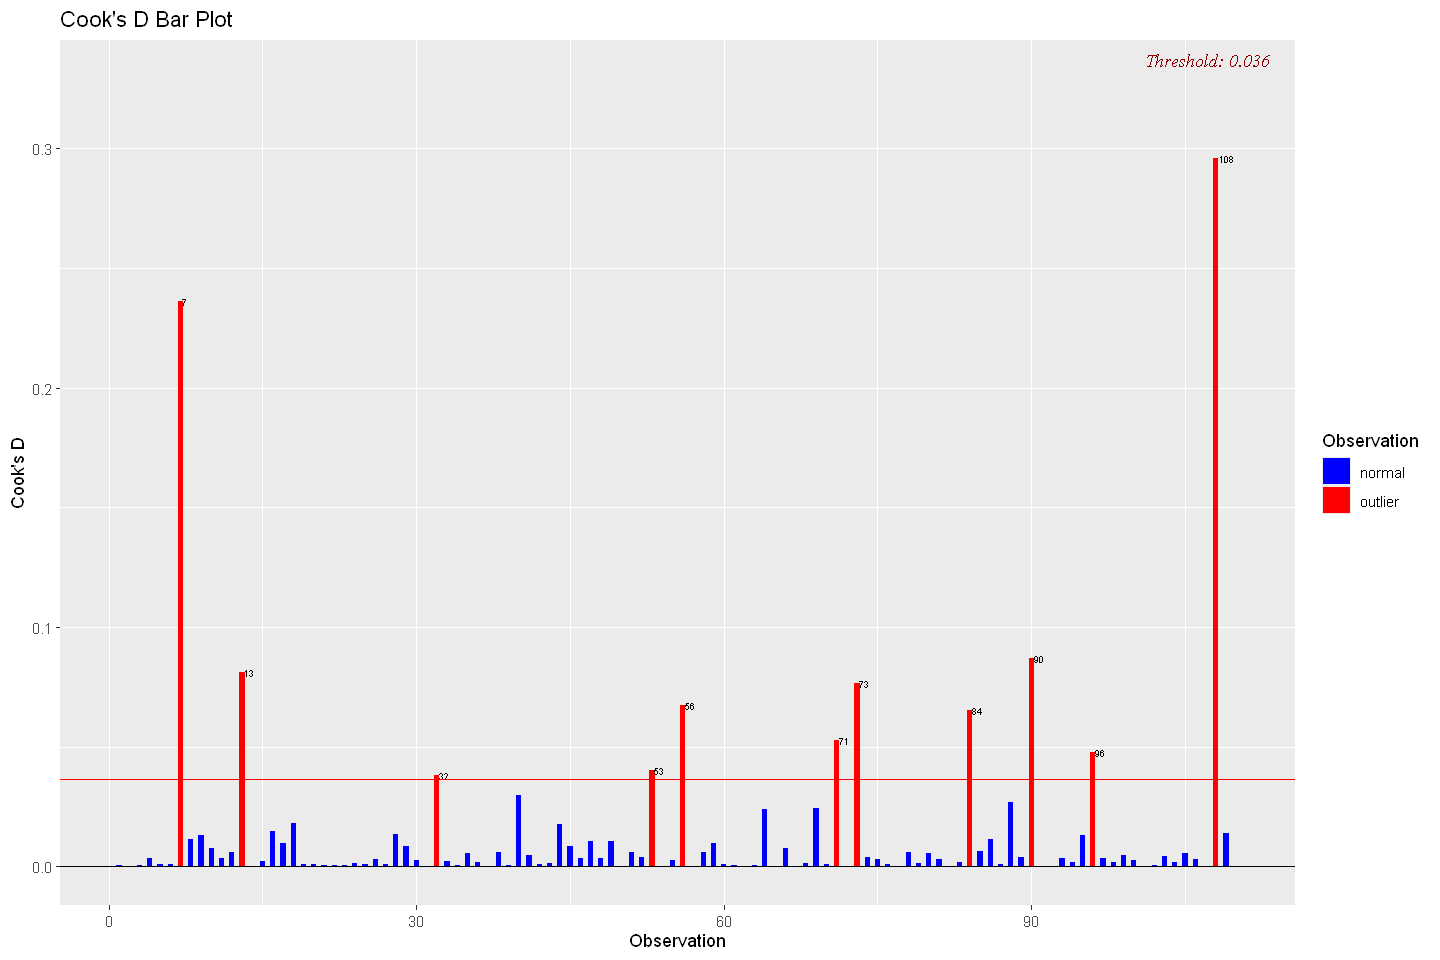

[[1]]
NULL

[[2]]
NULL


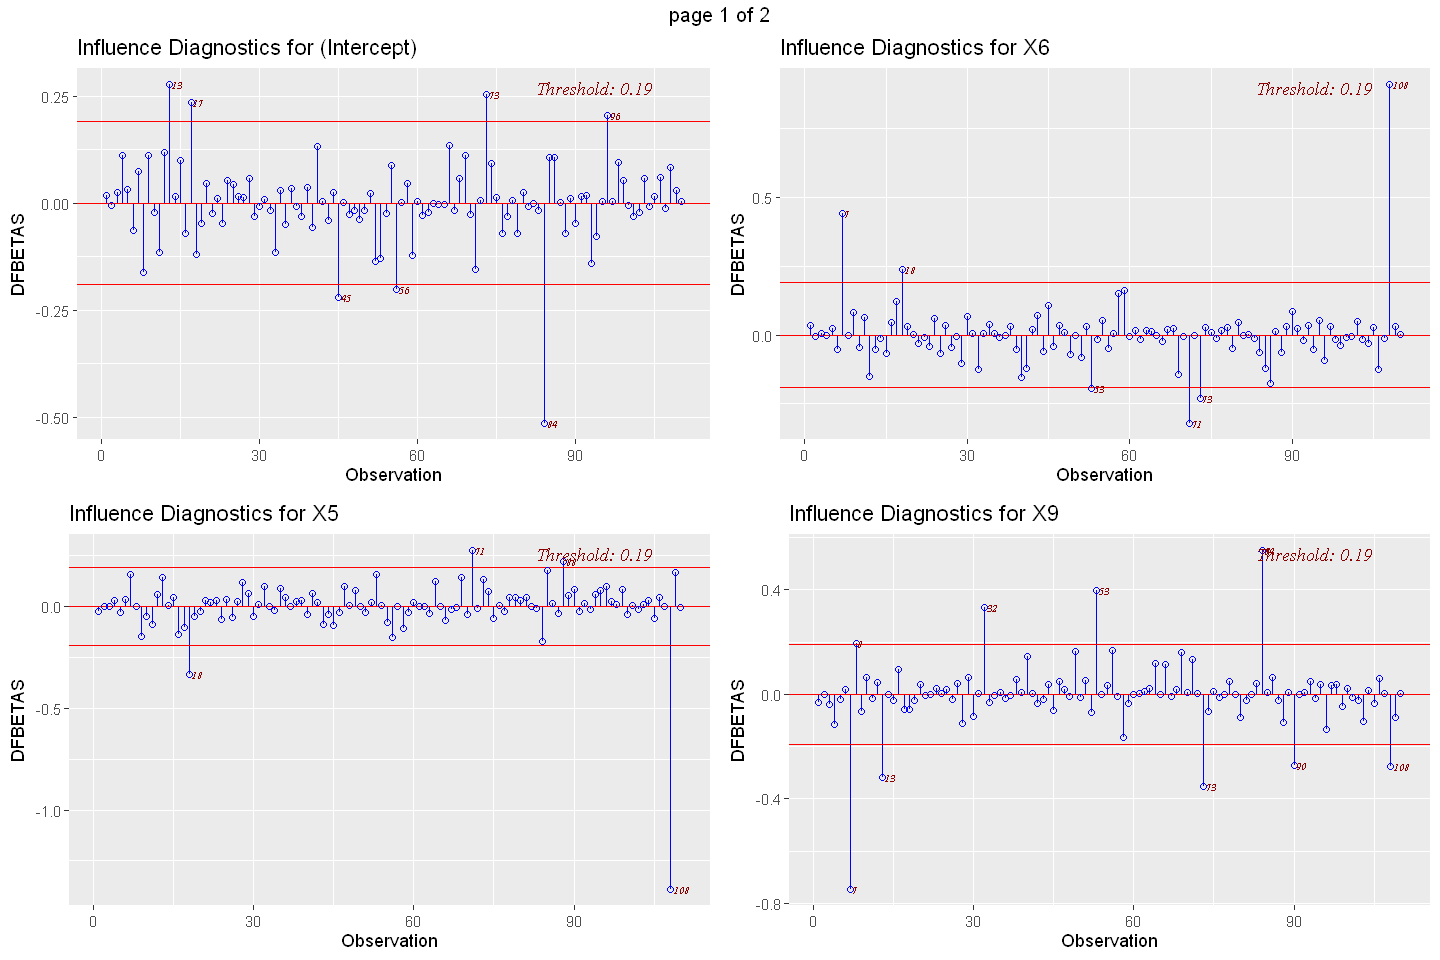

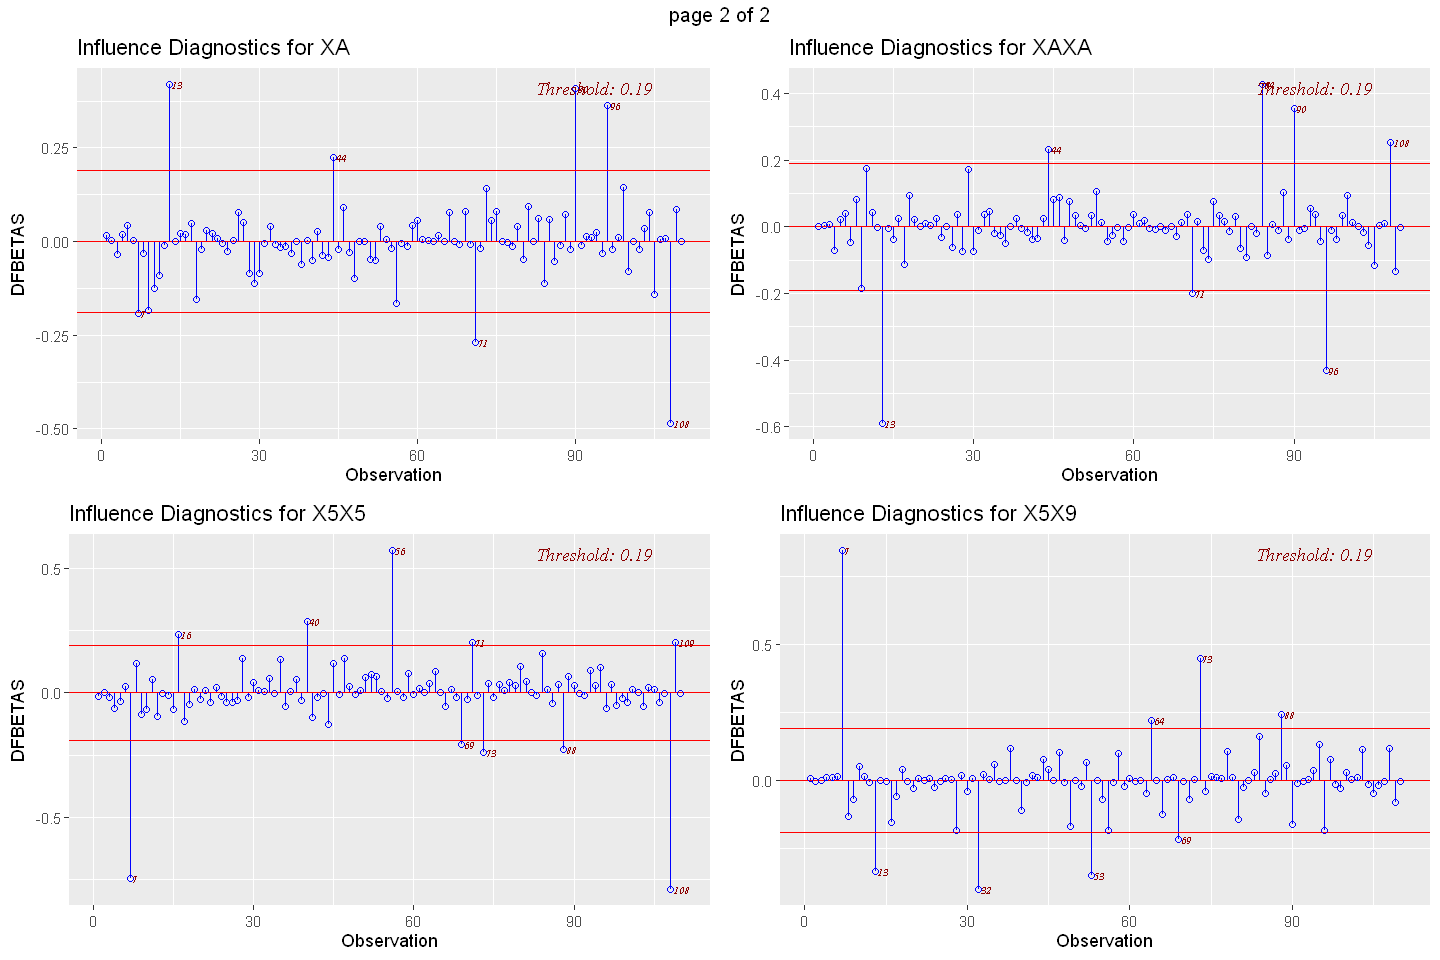

In [166]:
ols_plot_cooksd_bar(Model1)
ols_plot_dfbetas(Model1)

<div style="background-color: #00f0f0; width: 750px; margin: auto; padding: 20px; border: 2px solid black; border-radius: 5px; font-size: 15px;">

**Following are the observations that are <em>Outlying</em> as well as <em>Influential</em> for Model 1:** 

- Afghanistan  
- Japan  
- Chile  
- Mauritius  
- Malawi  
- Argentina  
- New Zealand  
- Lebanon  

**Removing all such observations from dataset for model1**

</div>


In [167]:
influenced_outliers <- c('Afghanistan', 'Japan', 'Chile', 'Mauritius', 'Malawi', 'Argentina', 'New Zealand', 'Lebanon')
df_train1 <- df_train[!(rownames(df_train) %in% influenced_outliers), ]

Model1 <- lm(Y~X5+X6+X9+XA+X5X5+XAXA+X5X9, data=df_train1)

## 7.2. Model 2

### 7.2.1. Identifying Outlying Observations

In [168]:
# finding the number of data point
n <- length(df_train$Y)
#X_0 <- rep(1, n)
X <- as.matrix(cbind(df_train$'(Intercept)', df_train$X5, df_train$X6, df_train$XA, df_train$XC, df_train$X5X5,
                     df_train$XAXA, df_train$X5X6))
Y <- as.matrix(df_train$Y, ncol=1)
p <- ncol(X)

XtX <- t(X) %*% X
XXI <- solve(XtX)
XtY <- t(X) %*% Y
b <- XXI %*% XtY

Y_hat <- X %*% b
e <- Y - Y_hat

H <- X %*% XXI %*% t(X)
J_n <- matrix(rep(1/n, n^2), ncol=n)
I_n <- diag(n)
SSE <- t(Y) %*% (I_n - H) %*% Y
MSE <- SSE/(n-p)
s2_e<- MSE[1,1] * (I_n-H)
s_e <- sqrt(diag(s2_e))

In [169]:
# Semistudentized residuals
e_star <-e/sqrt(MSE[1,1])
# Studentized residuals
r <-e/sqrt(MSE[1,1]*(1-diag(H)))
# Deleted Residuals
d <-e/(1-diag(H))
# Deleted Studentized Residuals
t <-e*sqrt((n-p-1)/(SSE[1,1]*(1-diag(H))-e^2))

In [170]:
table <- cbind(df_train$X5, df_train$X6, df_train$XA, df_train$XC, df_train$X5X5,
               df_train$XAXA, df_train$X5X6, Y, Y_hat, e, e_star, r, d, abs(t)-qt(1-alpha/(2*n),n-p-1))

colnames(table) <- cbind("X5","X6", "XA", "XC", "X5^2", "XA^2", "X5*X6", "Y", "Y_hat", "e",
                         "Semistudentized e_star", "Studentized r", "Deleted Residuals d", "|t|-t(1-alpha/2n;n-p-1)")

table <- as.data.frame(table)
rownames(table) <- rownames(df_train)
table[table$"|t|-t(1-alpha/2n;n-p-1)" > 0, ]

,X5,X6,XA,XC,X5^2,XA^2,X5*X6,Y,Y_hat,e,Semistudentized e_star,Studentized r,Deleted Residuals d,|t|-t(1-alpha/2n;n-p-1)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Afghanistan,-0.1524409,-0.1470992,0.06668694,-0.03033609,0.02323824,0.004447147,0.02242395,-0.27845,-0.1241242,-0.1543258,-3.392001,-3.527516,-0.1669032,0.1210394


<div style="background-color: #00f0f0; width: 750px; margin: auto; padding: 20px; border: 2px solid black; border-radius: 5px; font-size: 15px;">

<p style="font-weight:bold; font-size:16px;">
Outlying <em>Y</em> Observation (Total-1) for Model 2 is:
</p>

<ul>
  <li>Afghanistan</li>
</ul>

</div>


### 7.2.2. Identifying Outlying Observations

In [172]:
Leverage_test <- diag(H)-(2*p/n)*df_train$'(Intercept)'
LT <- cbind(df_train$X5, df_train$X6, df_train$XA, df_train$XC, df_train$X5X5,
            df_train$XAXA, df_train$X5X6, Y, diag(H), Leverage_test)

colnames(LT)  <- cbind("X5", "X6", "XA", "XC", "X5^2", "XA^2", "X5*X6", "Y", "h_ii", "h_ii-2p/n")

LT            <- as.data.frame(LT)
rownames(LT)  <- rownames(df_train)
LT[LT$"h_ii-2p/n">0, ]

,X5,X6,XA,XC,X5^2,XA^2,X5*X6,Y,h_ii,h_ii-2p/n
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Japan,0.13187133,0.10128663,0.179635626,-0.06400444,0.0173900479,0.0322689581,0.0133568029,0.03808564,0.1650232,0.019568647
Nepal,-0.16916519,-0.07819578,0.096084540,0.11289706,0.0286168616,0.0092322388,0.0132280037,-0.02755539,0.1485970,0.003142462
Bahrain,-0.01028480,0.07350298,0.044329284,0.26411931,0.0001057772,0.0019650854,-0.0007559637,0.03079219,0.1480249,0.002570343
Chad,-0.16080306,-0.19377578,-0.004486212,0.39593946,0.0258576256,0.0000201261,0.0311597396,-0.07788019,0.3192459,0.173791312
Niger,-0.19007050,-0.19044174,-0.021505878,-0.04745559,0.0361267966,0.0004625028,0.0361973582,-0.07131609,0.1888979,0.043443307
Tajikistan,-0.14407881,-0.03207491,0.075970389,0.14656541,0.0207587045,0.0057715001,0.0046213151,-0.01880326,0.1544068,0.008952294
New Zealand,0.08169858,0.10795471,0.235336350,-0.08854239,0.0066746575,0.0553831977,0.0088197461,0.10883209,0.3088609,0.163406348
Iraq,0.03570689,-0.03151924,0.034194846,0.34115706,0.0012749818,0.0011692875,-0.0011254539,-0.02682605,0.2133780,0.067923437
Lebanon,0.14441452,-0.02040578,0.021553876,-0.02748284,0.0208555534,0.0004645696,-0.0029468904,-0.20624488,0.3077002,0.162245617


<div style="background-color: #00f0f0; width: 750px; margin: auto; padding: 20px; border: 2px solid black; border-radius: 5px; font-size: 15px;">

<p style="font-weight:bold; font-size:14px;">
Outlying <em>X</em> Observations (Total-9) for Model 2 are:
</p>

<ul>
  <li>Japan</li>
  <li>Nepal</li>
  <li>Bahrain</li>
  <li>Chad</li>
  <li>Niger</li>
  <li>Tajikistan</li>
  <li>New Zealand</li>
  <li>Iraq</li>
  <li>Lebanon</li>
</ul>

</div>


### 7.2.3. Influential Cases

#### 7.2.3.1. DFFITS & Cook's distance

In [173]:
DFFITS_i               <- t*sqrt(diag(H)/(1-diag(H)))
D_i                    <- e^2*diag(H)/(p*MSE[1,1]*(1-diag(H))^2)
Influe_table           <- cbind(Y_hat, e, DFFITS_i, D_i, D_i-qf(0.5,p,n-p))
colnames(Influe_table) <- cbind("Y_hat", "e_i", "(DFFITS)_i", "D_i", "D_i-F(0.5;p,n-p)")
Influe_table           <- as.data.frame(Influe_table)
rownames(Influe_table) <- rownames(df_train)

Influe_table[Influe_table$"D_i-F(0.5;p,n-p)" > 0, ]

Y_hat,e_i,(DFFITS)_i,D_i,"D_i-F(0.5;p,n-p)"
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>


#### Cook's distance histogram

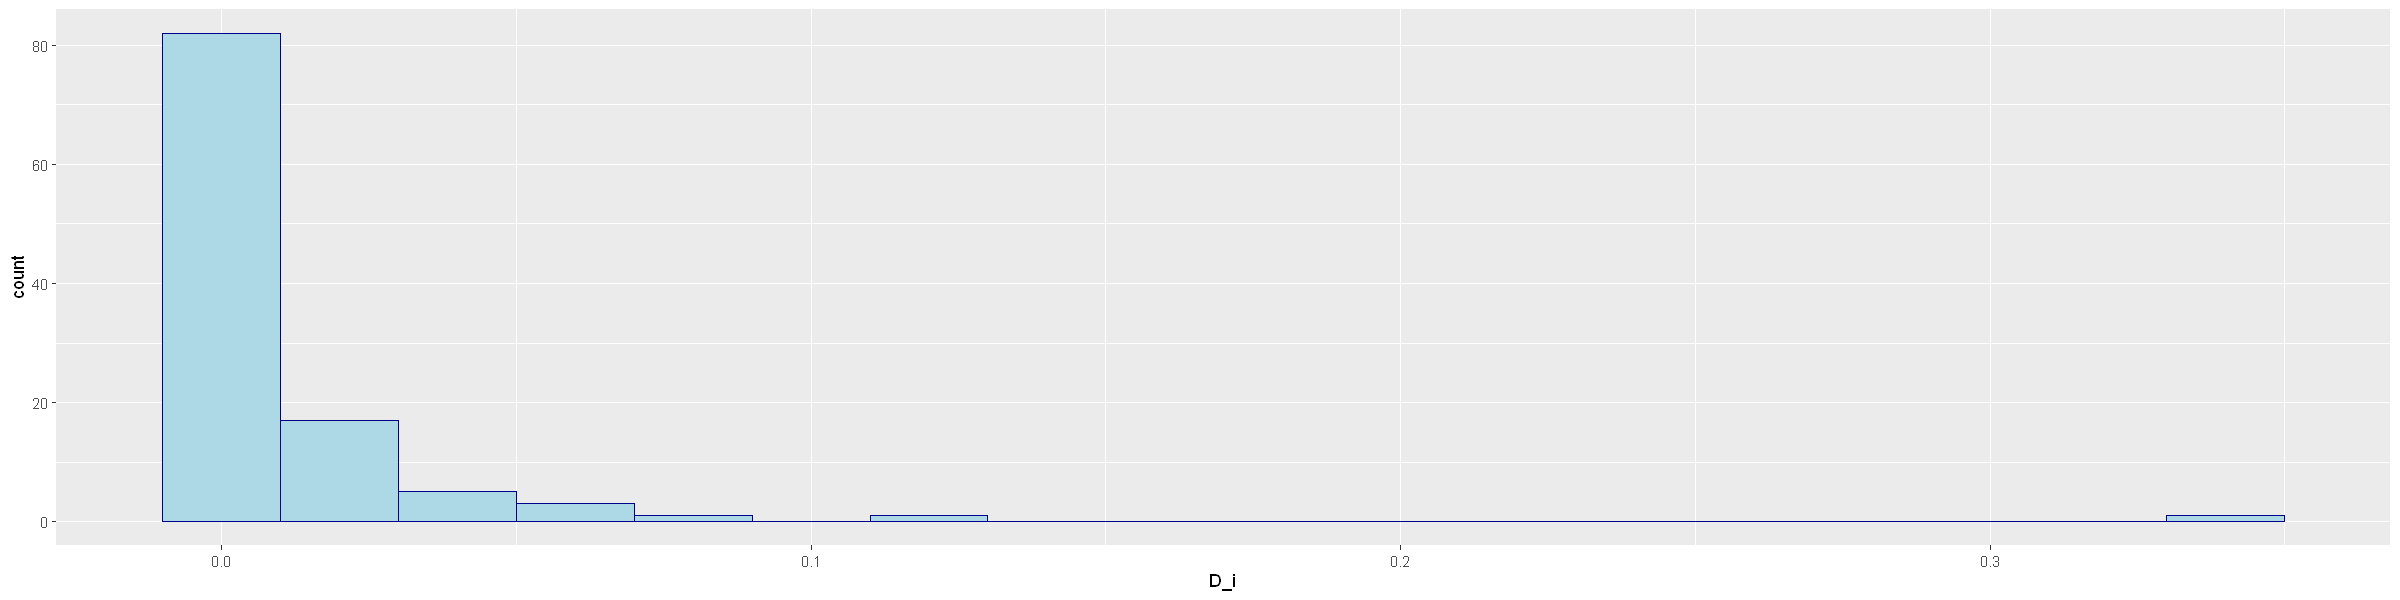

In [174]:
options(repr.plot.width=20, repr.plot.height=5)
df_D_i <- as.data.frame(D_i)

# Change line color and fill color
ggplot(df_D_i, aes(x=D_i)) + geom_histogram(color="darkblue", fill="lightblue", binwidth=0.02)

#### 7.2.3.2. DFBETAS and Cook's distance

#### Model Summary

In [175]:
summary(Model2)


Call:
lm(formula = Y ~ X5 + X6 + XA + XC + X5X5 + XAXA + X5X6, data = df_train)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.154326 -0.024446  0.004162  0.029354  0.098852 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.005266   0.006787  -0.776 0.439640    
X5          -0.077713   0.083497  -0.931 0.354189    
X6           0.890155   0.078203  11.383  < 2e-16 ***
XA          -0.211979   0.056893  -3.726 0.000320 ***
XC           0.124748   0.056708   2.200 0.030076 *  
X5X5        -2.838505   0.931325  -3.048 0.002936 ** 
XAXA         1.252782   0.419450   2.987 0.003531 ** 
X5X6         3.502832   1.031625   3.395 0.000977 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.0455 on 102 degrees of freedom
Multiple R-squared:  0.7512,	Adjusted R-squared:  0.7341 
F-statistic: 43.99 on 7 and 102 DF,  p-value: < 2.2e-16


#### Model plots

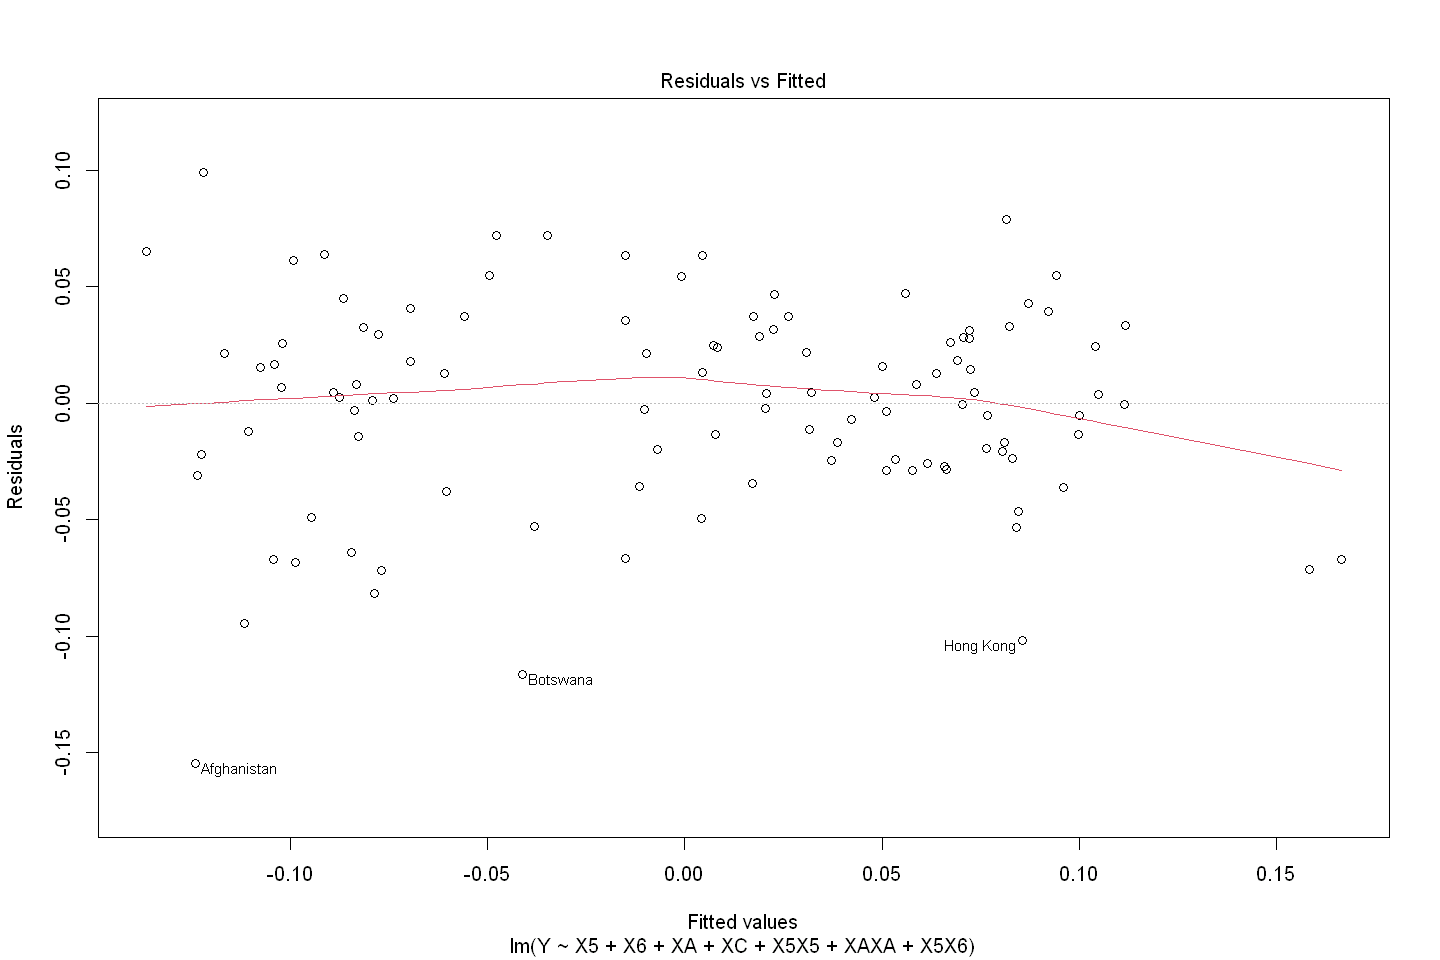

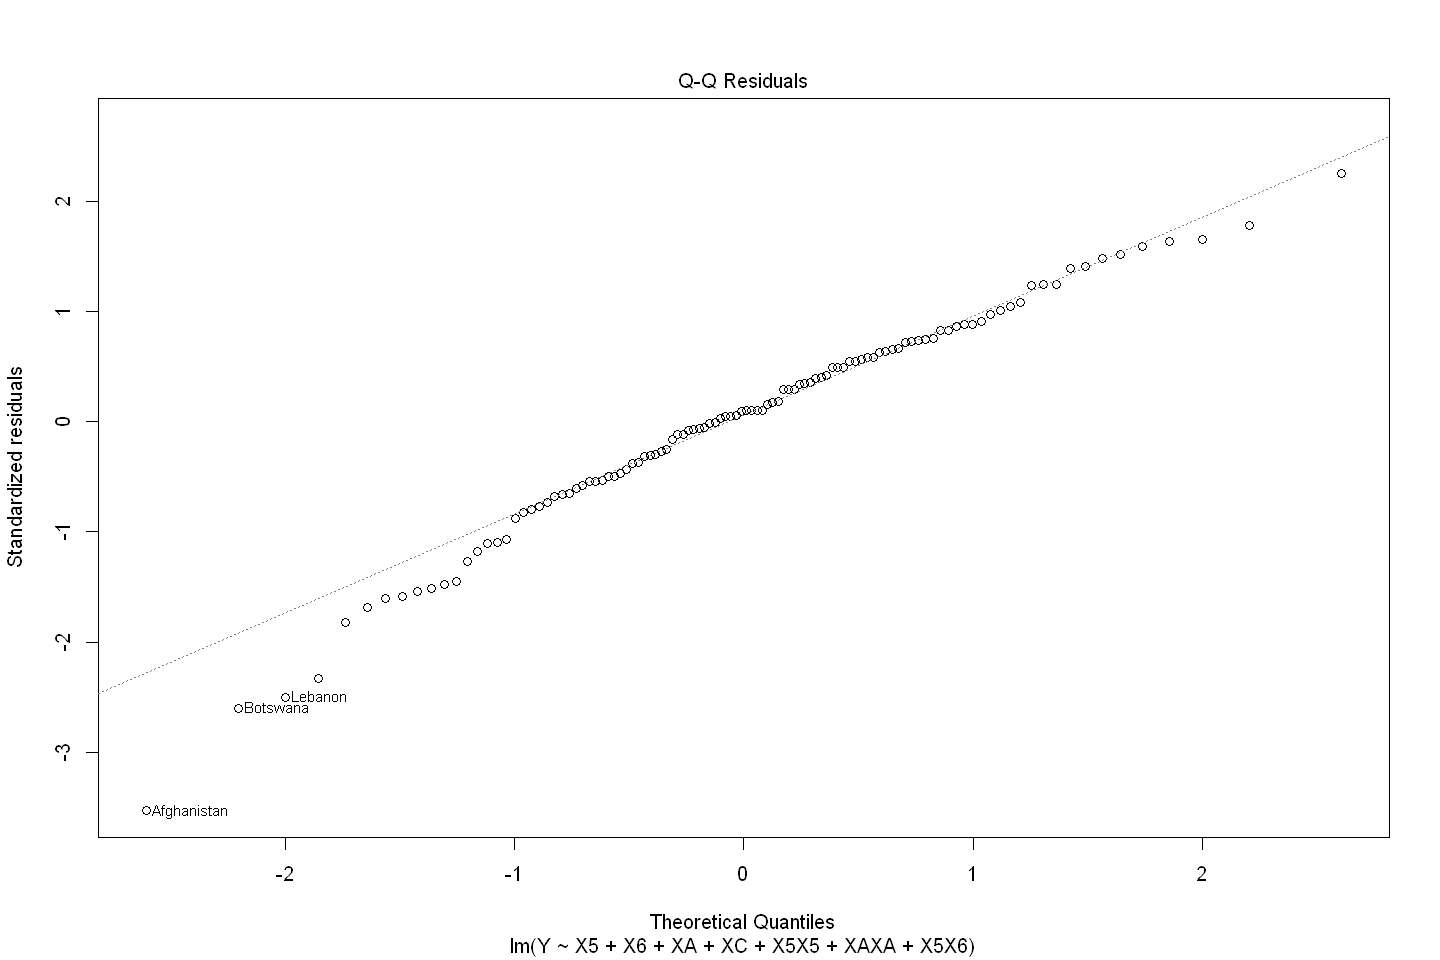

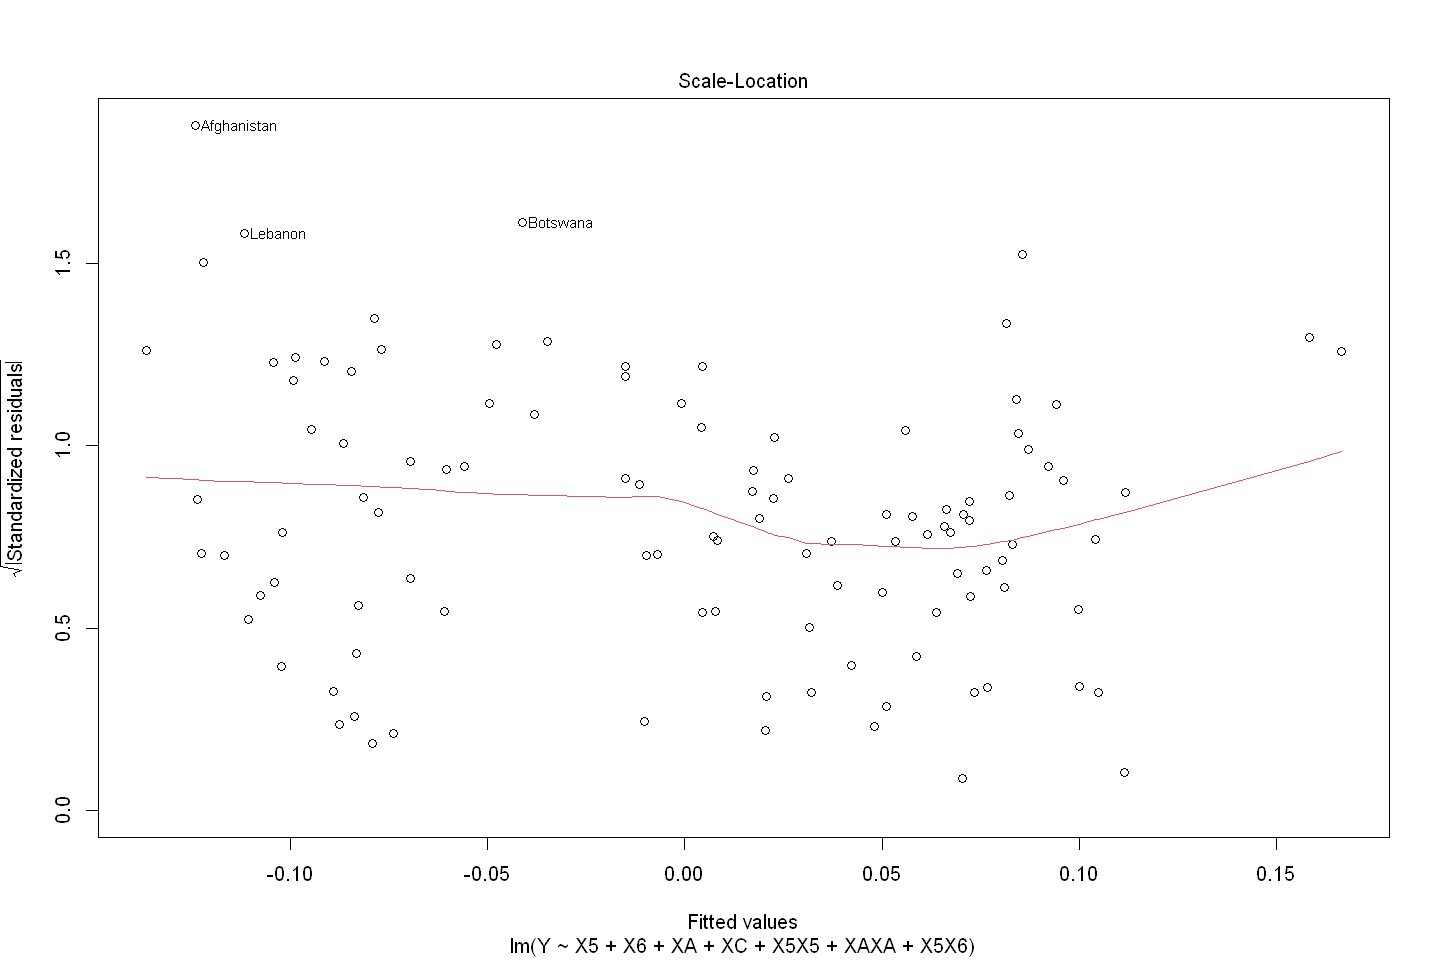

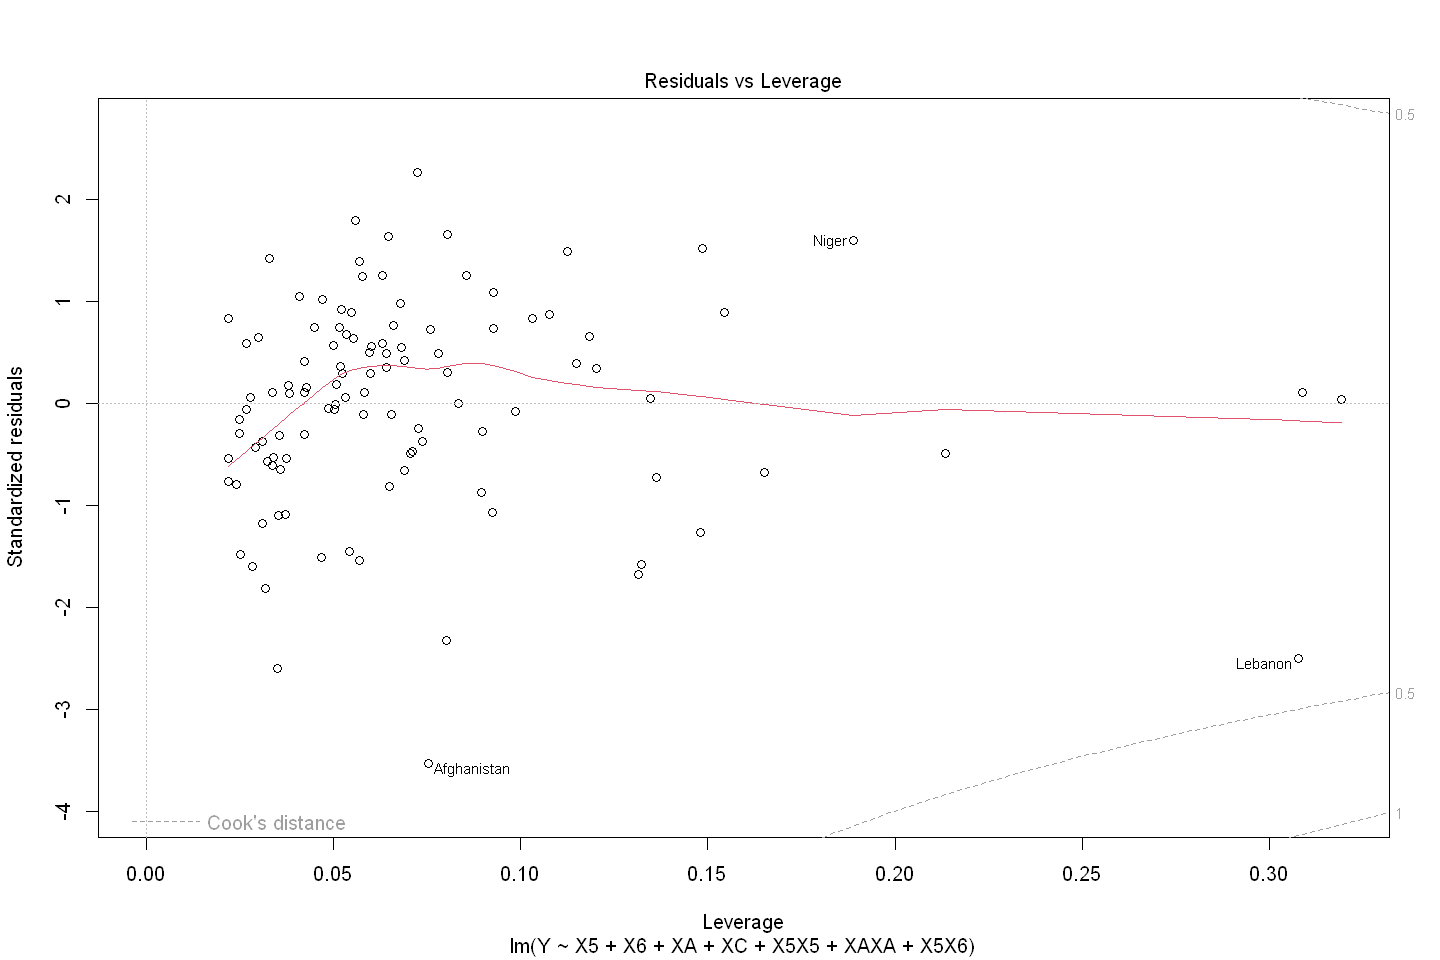

In [176]:
options(repr.plot.width=12, repr.plot.height=8)
plot(Model2)

#### DFBETAS

In [177]:
df_betas <- dfbetas(Model2)
threshold_betas <- 2/sqrt(n)
df_betas <- as.data.frame(df_betas)
df_betas <- df_betas[(df_betas$'(Intercept)' > threshold_betas) | (df_betas$X5 > threshold_betas)
                    | (df_betas$X6 > threshold_betas) | (df_betas$XA > threshold_betas) | (df_betas$XC > threshold_betas)
                    | (df_betas$X5X5 > threshold_betas) | (df_betas$XAXA > threshold_betas)
                    | (df_betas$X5X6 > threshold_betas), ]

df_betas$'(Intercept)'[df_betas$'(Intercept)' <= threshold_betas] <- 0

df_betas$X5 [df_betas$X5 <= threshold_betas] <- 0
df_betas$X6 [df_betas$X6 <= threshold_betas] <- 0
df_betas$XA [df_betas$XA <= threshold_betas] <- 0
df_betas$XC [df_betas$XC <= threshold_betas] <- 0
df_betas$X5X5[df_betas$X5X5 <= threshold_betas] <- 0
df_betas$XAXA[df_betas$XAXA <= threshold_betas] <- 0
df_betas$X5X6[df_betas$X5X6 <= threshold_betas] <- 0

df_betas

,(Intercept),X5,X6,XA,XC,X5X5,XAXA,X5X6
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Afghanistan,0.0000000,0.1936972,0.0000000,0.0000000,0.3645748,0.0000000,0.0000000,0.0000000
Guatemala,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.2038145,0.0000000
Canada,0.0000000,0.0000000,0.0000000,0.3781468,0.0000000,0.0000000,0.0000000,0.0000000
Nepal,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.4680149,0.0000000,0.0000000
Kuwait,0.0000000,0.0000000,0.0000000,0.0000000,0.2907914,0.0000000,0.0000000,0.0000000
Brazil,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.2509530,0.0000000,0.0000000
El Salvador,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.2901410,0.0000000
Philippines,0.0000000,0.0000000,0.0000000,0.3026175,0.0000000,0.0000000,0.2716882,0.0000000
Niger,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.2804853


#### 7.2.3.3. Measure of Influence

In [178]:
options(width=1000)
infl <- influence.measures(Model2)

infl

Influence measures of
	 lm(formula = Y ~ X5 + X6 + XA + XC + X5X5 + XAXA + X5X6, data = df_train) :

                          dfb.1_    dfb.X5    dfb.X6    dfb.XA    dfb.XC  dfb.X5X5  dfb.XAXA  dfb.X5X6    dffit cov.r   cook.d    hat inf
Singapore              -9.53e-03  1.32e-02 -1.39e-02 -1.25e-02  3.47e-03  0.005679 -0.008532  5.90e-04 -0.03005 1.157 1.14e-04 0.0655    
Germany                -2.52e-02  8.60e-03 -3.50e-02  8.58e-03  8.33e-03  0.024156  0.022905 -3.11e-02 -0.06360 1.122 5.10e-04 0.0422    
Bolivia                 2.02e-02  1.79e-03 -1.88e-02 -3.41e-02 -1.63e-02  0.000482  0.025620 -1.68e-02  0.06913 1.134 6.03e-04 0.0524    
Namibia                 6.62e-02  2.57e-02 -5.33e-02  1.97e-02 -3.18e-02 -0.020662 -0.028180 -1.09e-02  0.08448 1.115 9.00e-04 0.0422    
Thailand                5.29e-02 -4.58e-02  2.06e-02  6.48e-02 -1.18e-02 -0.004103  0.038779 -3.50e-02  0.12894 1.111 2.09e-03 0.0501    
Cyprus                 -7.96e-02  4.75e-02 -6.48e-02  6.16e-04  1.01e-0

#### 7.2.3.4. Plots of Influence

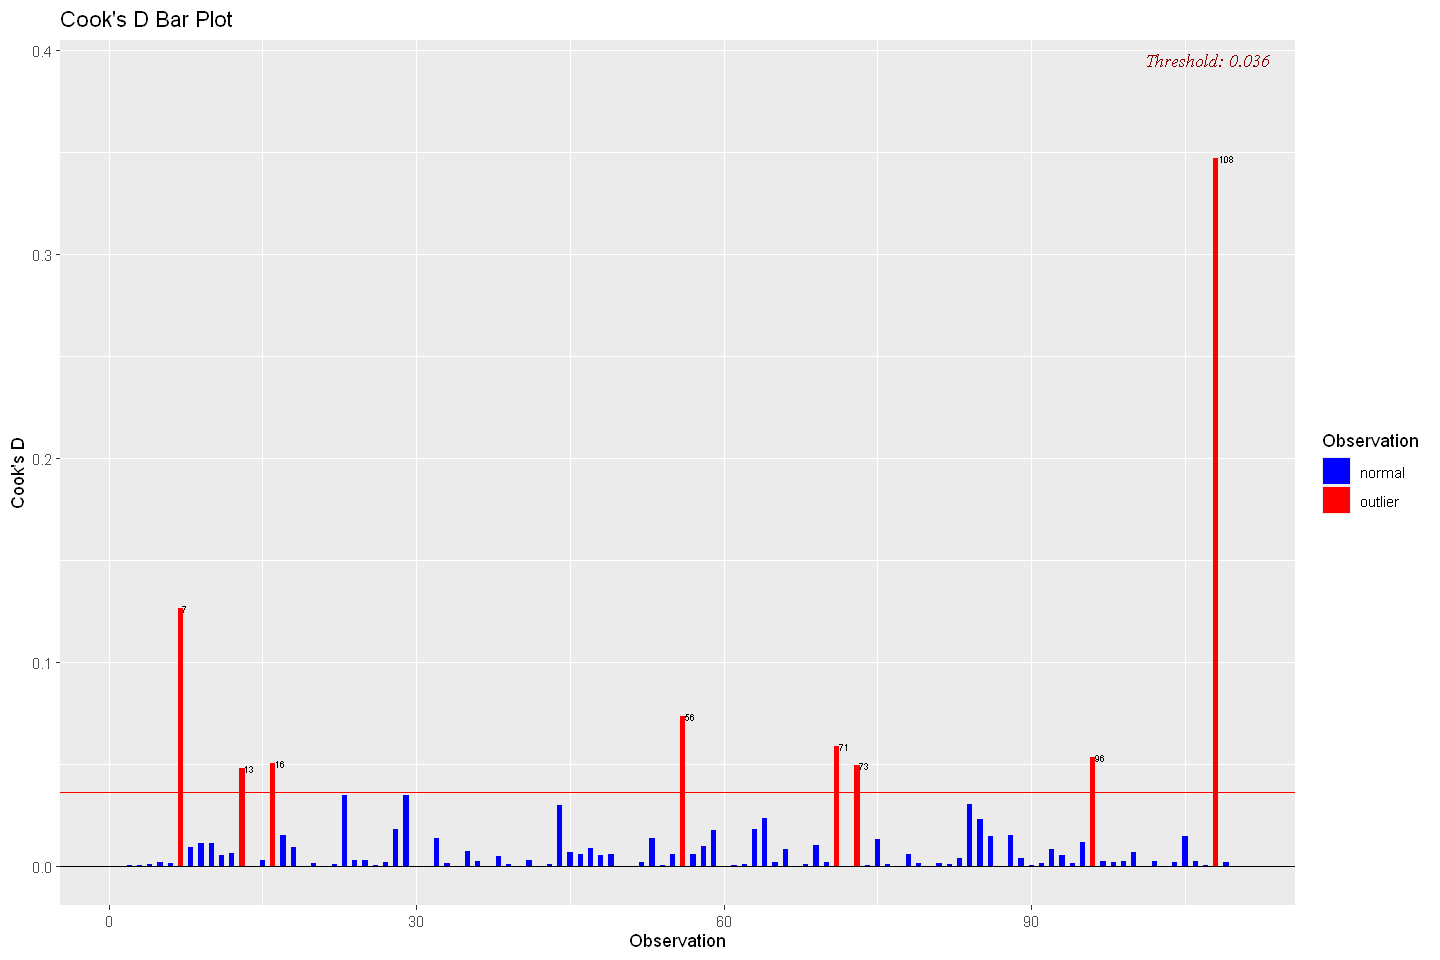

[[1]]
NULL

[[2]]
NULL


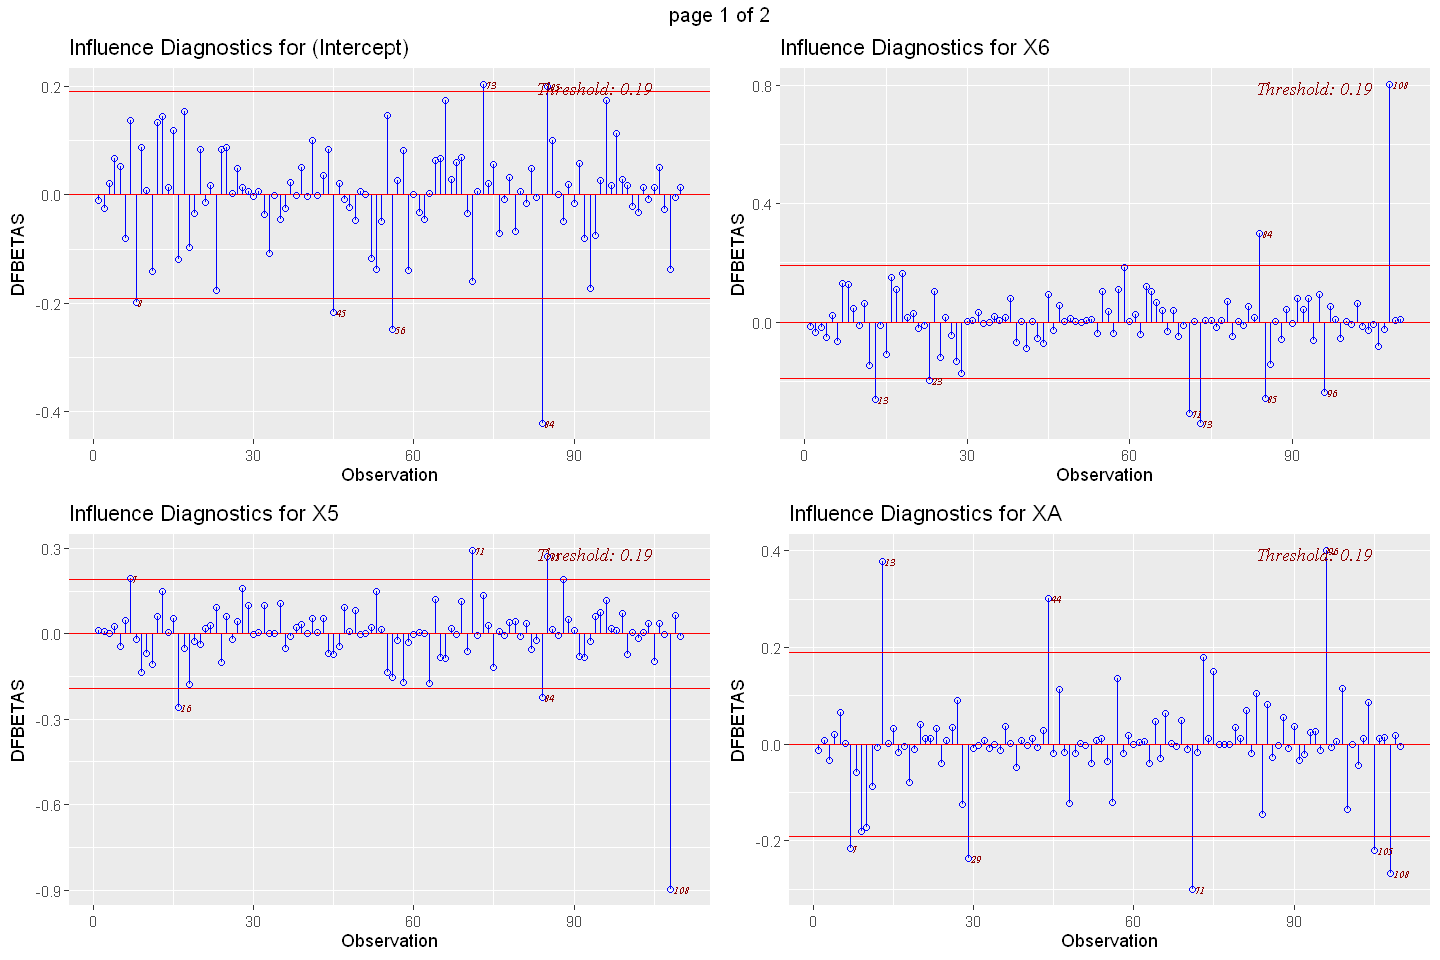

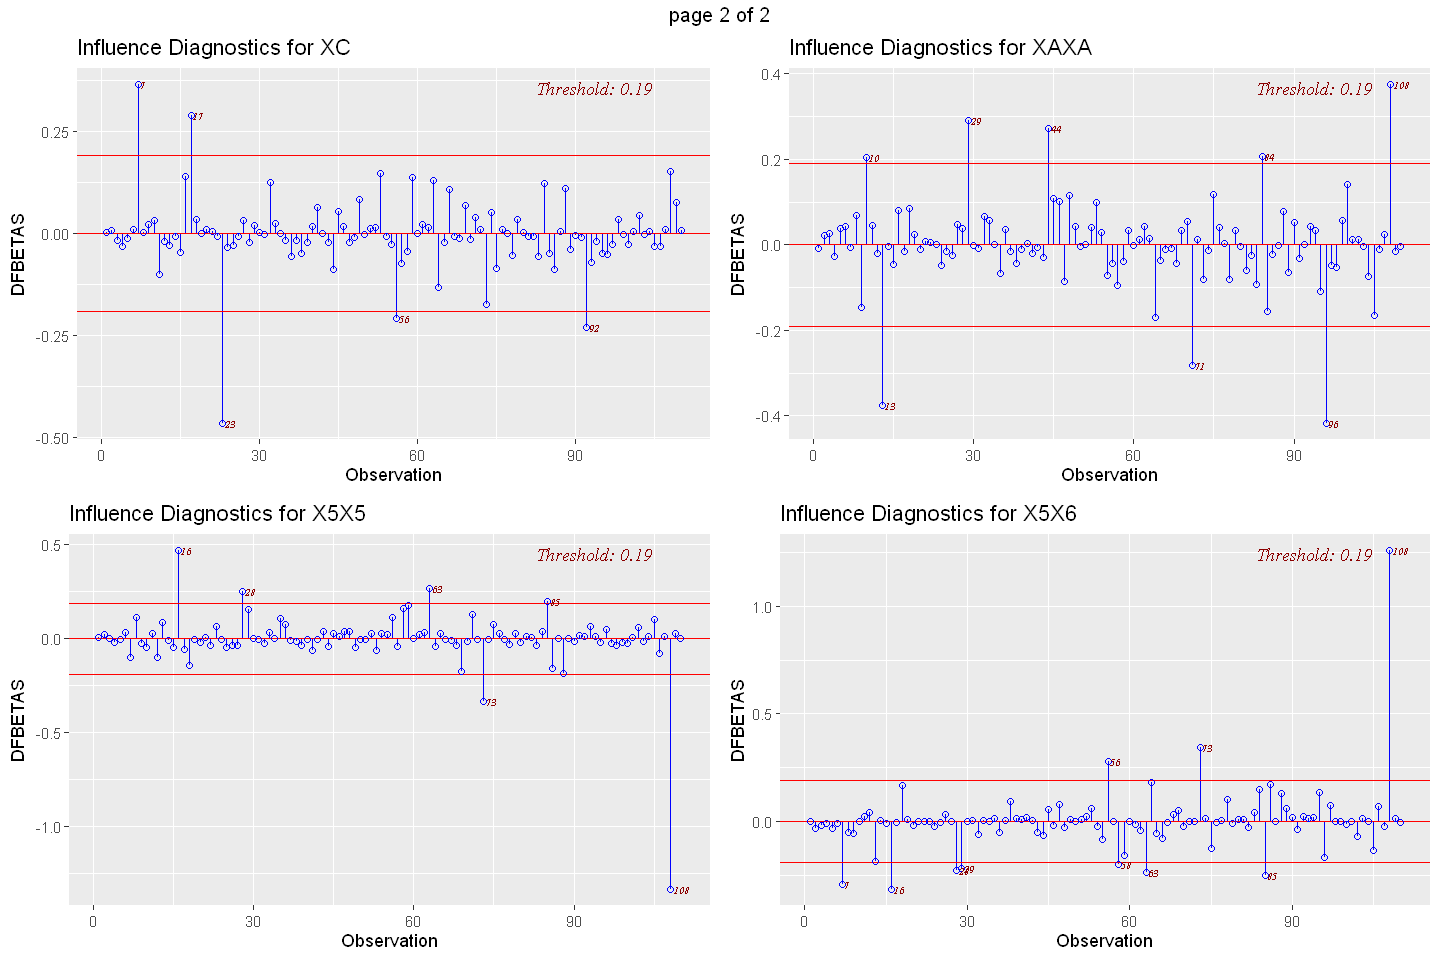

In [179]:
ols_plot_cooksd_bar(Model2)
ols_plot_dfbetas(Model2)

<div style="background-color: #00f0f0; width: 750px; margin: auto; padding: 20px; border: 2px solid black; border-radius: 5px; font-size: 15px;">

**Following are the observations that are <em>Outlying</em> as well as <em>Influential</em> for Model 2:** 

- Afghanistan  
- Japan  
- Chad  
- New Zealand
- Iraq  
- Lebanon  

**Removing all such observations from dataset for model2**

</div>

In [180]:
influenced_outliers <- c('Afghanistan', 'Japan', 'Chile', 'Chad', 'New Zealand', 'Iraq', 'Lebanon')
df_train2 <- df_train[!(rownames(df_train) %in% influenced_outliers), ]
Model2 <- lm(Y~X5+X6+XA+XC+X5X5+XAXA+X5X6, data=df_train2)

## Model 3

### 7.3.1. Identifying Outlying Observations

In [181]:
# finding the number of data point
n <- length(df_train$Y)
#X_0 <- rep(1, n)

X <- as.matrix(cbind(df_train$'(Intercept)', df_train$X5, df_train$X8, df_train$XA, df_train$X5X5, df_train$XAXA))
Y <- as.matrix(df_train$Y, ncol=1)
p <- ncol(X)

XtX <- t(X) %*% X
XXI <- solve(XtX)
XtY <- t(X) %*% Y
b <- XXI %*% XtY

Y_hat <- X %*% b
e <- Y - Y_hat

H <- X %*% XXI %*% t(X)
J_n <- matrix(rep(1/n, n^2), ncol=n)
I_n <- diag(n)
SSE <- t(Y) %*% (I_n - H) %*% Y
MSE <- SSE/(n-p)
s2_e<- MSE[1,1] * (I_n-H)
s_e <- sqrt(diag(s2_e))

In [182]:
# Semistudentized residuals
e_star <-e/sqrt(MSE[1,1])
# Studentized residuals
r <-e/sqrt(MSE[1,1]*(1-diag(H)))
# Deleted Residuals
d <-e/(1-diag(H))
# Deleted Studentized Residuals
t <-e*sqrt((n-p-1)/(SSE[1,1]*(1-diag(H))-e^2))

In [183]:
table <- cbind(df_train$X5, df_train$X8, df_train$XA, df_train$X5X5, df_train$XAXA,
               Y, Y_hat, e, e_star, r, d, abs(t)-qt(1-alpha/(2*n),n-p-1))

colnames(table) <- cbind("X5","X8", "XA", "X5^2", "XA^2", "Y", "Y_hat", "e",
                         "Semistudentized e_star", "Studentized r", "Deleted Residuals d", "|t|-t(1-alpha/2n;n-p-1)")

table <- as.data.frame(table)
rownames(table) <- rownames(df_train)
table[table$"|t|-t(1-alpha/2n;n-p-1)" > 0, ]

,X5,X8,XA,X5^2,XA^2,Y,Y_hat,e,Semistudentized e_star,Studentized r,Deleted Residuals d,|t|-t(1-alpha/2n;n-p-1)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Lebanon,0.1444145,0.03479032,0.02155388,0.02085555,0.0004645696,-0.2062449,0.04694234,-0.2531872,-4.004316,-4.219494,-0.2811291,0.9897966


<div style="background-color: #00f0f0; width: 750px; margin: auto; padding: 20px; border: 2px solid black; border-radius: 5px; font-size: 15px;">

<b>Outlying <i>Y</i> Observation (Total-1) for Model 3 is:</b>
<ul>
  <li>Lebanon</li>
</ul>

</div>


### 7.3.2. Identifying Outlying Observations

In [184]:
Leverage_test <- diag(H)-(2*p/n)*df_train$'(Intercept)'
LT <- cbind(df_train$X5, df_train$X8, df_train$XA, df_train$X5X5, df_train$XAXA,
            Y, diag(H), Leverage_test)
colnames(LT) <- cbind("X5","X8", "XA", "X5^2", "XA^2", "Y", "h_ii", "h_ii-2p/n")

LT           <- as.data.frame(LT)
rownames(LT) <- rownames(df_train)
LT[LT$"h_ii-2p/n" > 0,]

,X5,X8,XA,X5^2,XA^2,Y,h_ii,h_ii-2p/n
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Japan,0.13187133,0.05822681,0.17963563,0.017390048,0.0322689581,0.03808564,0.1617545,0.052663585
Belgium,0.15277664,0.05822681,-0.02769485,0.023340703,0.0007670046,0.09862127,0.1171575,0.008066601
Niger,-0.19007050,-0.32007139,-0.02150588,0.036126797,0.0004625028,-0.07131609,0.1795066,0.070415668
Malawi,-0.18170838,-0.09820589,0.01872242,0.033017935,0.0003505291,-0.15446140,0.1302335,0.021142563
New Zealand,0.08169858,0.05822681,0.23533635,0.006674658,0.0553831977,0.10883209,0.2952040,0.186113061
United States,0.08587964,0.05822681,-0.18396632,0.007375313,0.0338436081,0.08695175,0.1114799,0.002389009


<div style="background-color: #00f0f0; width: 750px; margin: auto; padding: 20px; border: 2px solid black; border-radius: 5px; font-size: 15px;">

<b>Outlying <i>X</i> Observations (Total-6) for Model 3 are:</b>
<ul>
  <li>Japan</li>
  <li>Belgium</li>
  <li>Niger</li>
  <li>Malawi</li>
  <li>New Zealand</li>
  <li>United States</li>
</ul>

</div>


### 7.3.3. Influential Cases

#### 7.3.3.1. DFFITS & Cook's distance

In [185]:
DFFITS_i <- t*sqrt(diag(H)/(1-diag(H)))
D_i <- e^2*diag(H)/(p*MSE[1,1]*(1-diag(H))^2)
Influe_table <- cbind(Y_hat, e, DFFITS_i, D_i, D_i-qf(0.5,p,n-p))
colnames(Influe_table) <- cbind("Y_hat", "e_i", "(DFFITS)_i", "D_i", "D_i-F(0.5;p,n-p)")
Influe_table <- as.data.frame(Influe_table)
rownames(Influe_table) <- rownames(df_train)
Influe_table[Influe_table$"D_i-F(0.5;p,n-p)" > 0, ]

Y_hat,e_i,(DFFITS)_i,D_i,"D_i-F(0.5;p,n-p)"
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>


#### Cook's distance histogram

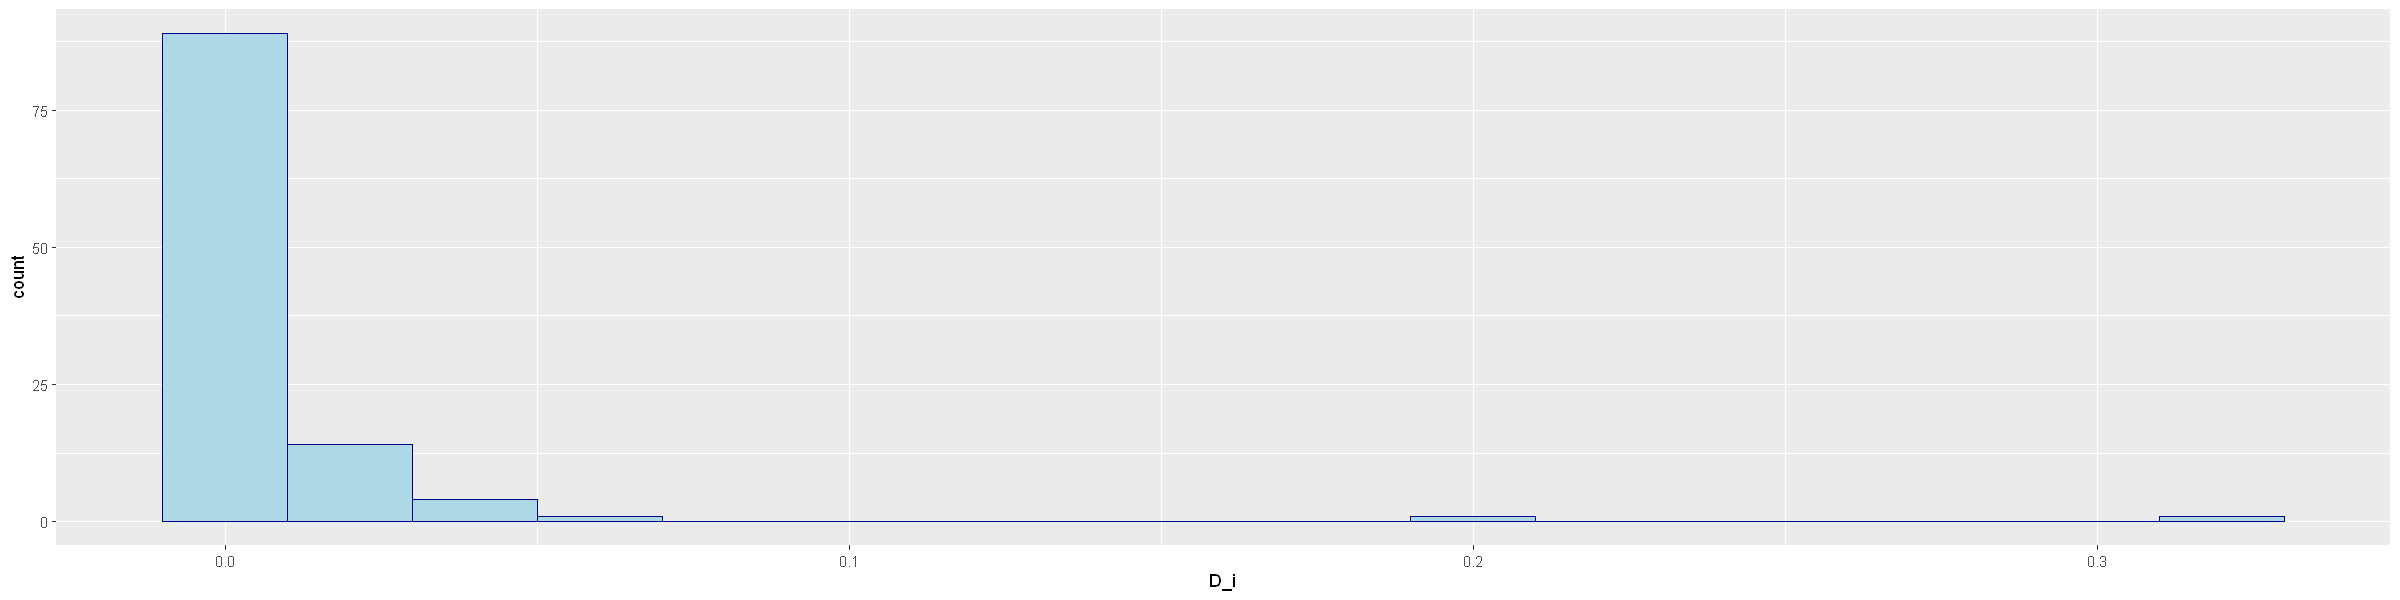

In [186]:
options(repr.plot.width=20, repr.plot.height=5)
df_D_i <- as.data.frame(D_i)
# Change line color and fill color
ggplot(df_D_i, aes(x=D_i)) + geom_histogram(color="darkblue", fill="lightblue", binwidth=0.02)

#### 7.3.3.2. DFBETAS and Cook's distance

#### Model Summary

In [187]:
summary(Model3)


Call:
lm(formula = Y ~ X5 + X8 + XA + X5X5 + XAXA, data = df_train)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.253187 -0.027856  0.008705  0.038530  0.132784 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.001961   0.009335   0.210  0.83405    
X5           0.322173   0.096323   3.345  0.00115 ** 
X8           0.389331   0.091870   4.238  4.9e-05 ***
XA          -0.106133   0.077544  -1.369  0.17405    
X5X5        -0.634538   0.829252  -0.765  0.44589    
XAXA         0.929091   0.578540   1.606  0.11132    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.06323 on 104 degrees of freedom
Multiple R-squared:   0.51,	Adjusted R-squared:  0.4865 
F-statistic: 21.65 on 5 and 104 DF,  p-value: 8.469e-15


#### Model plots

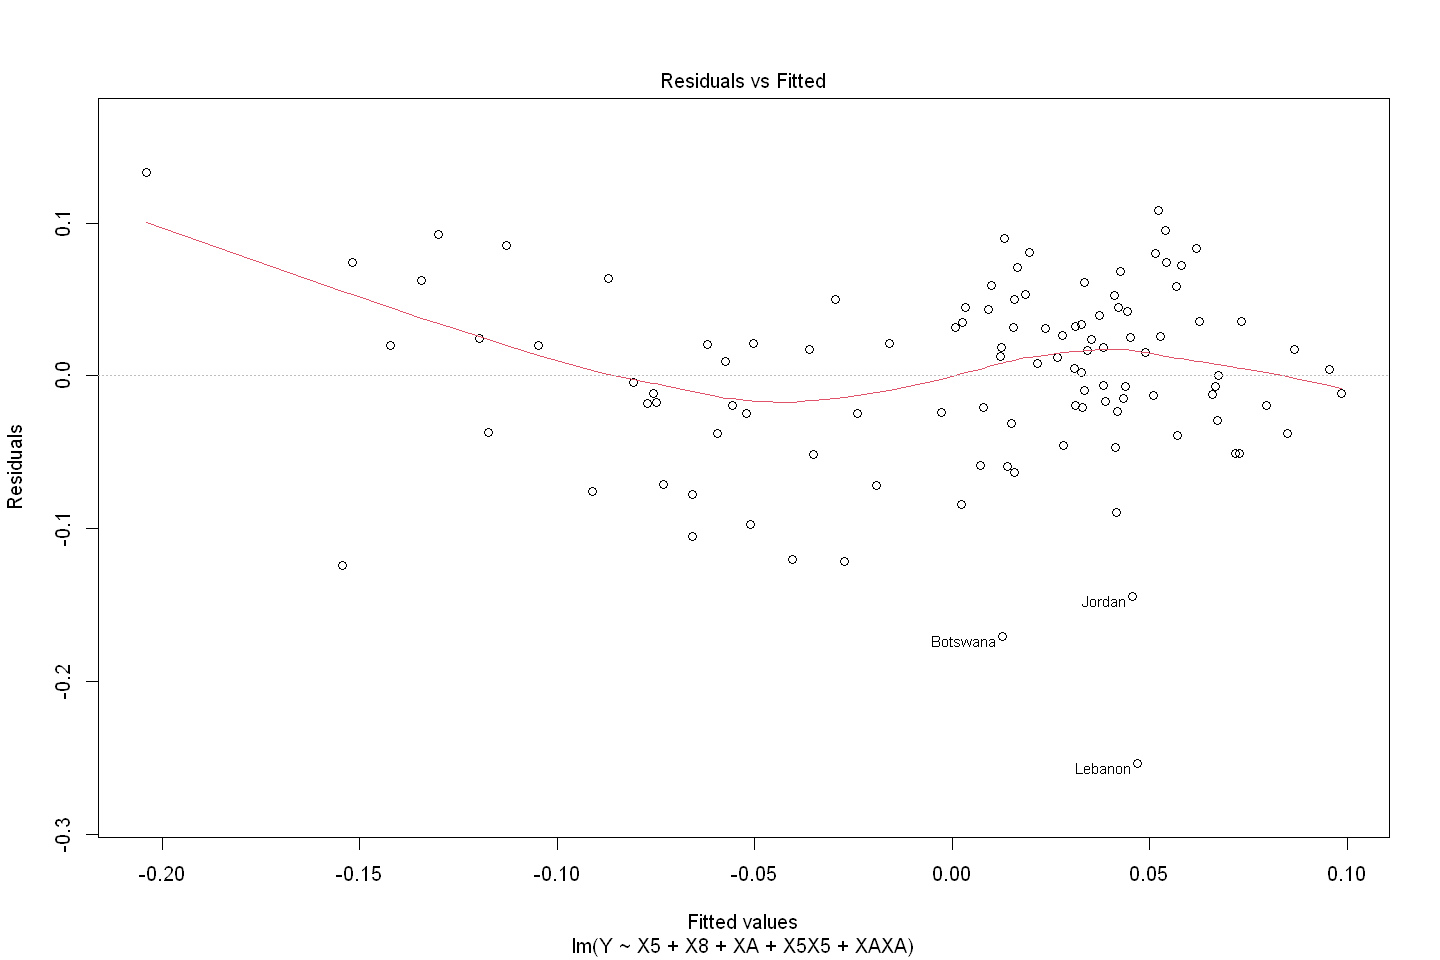

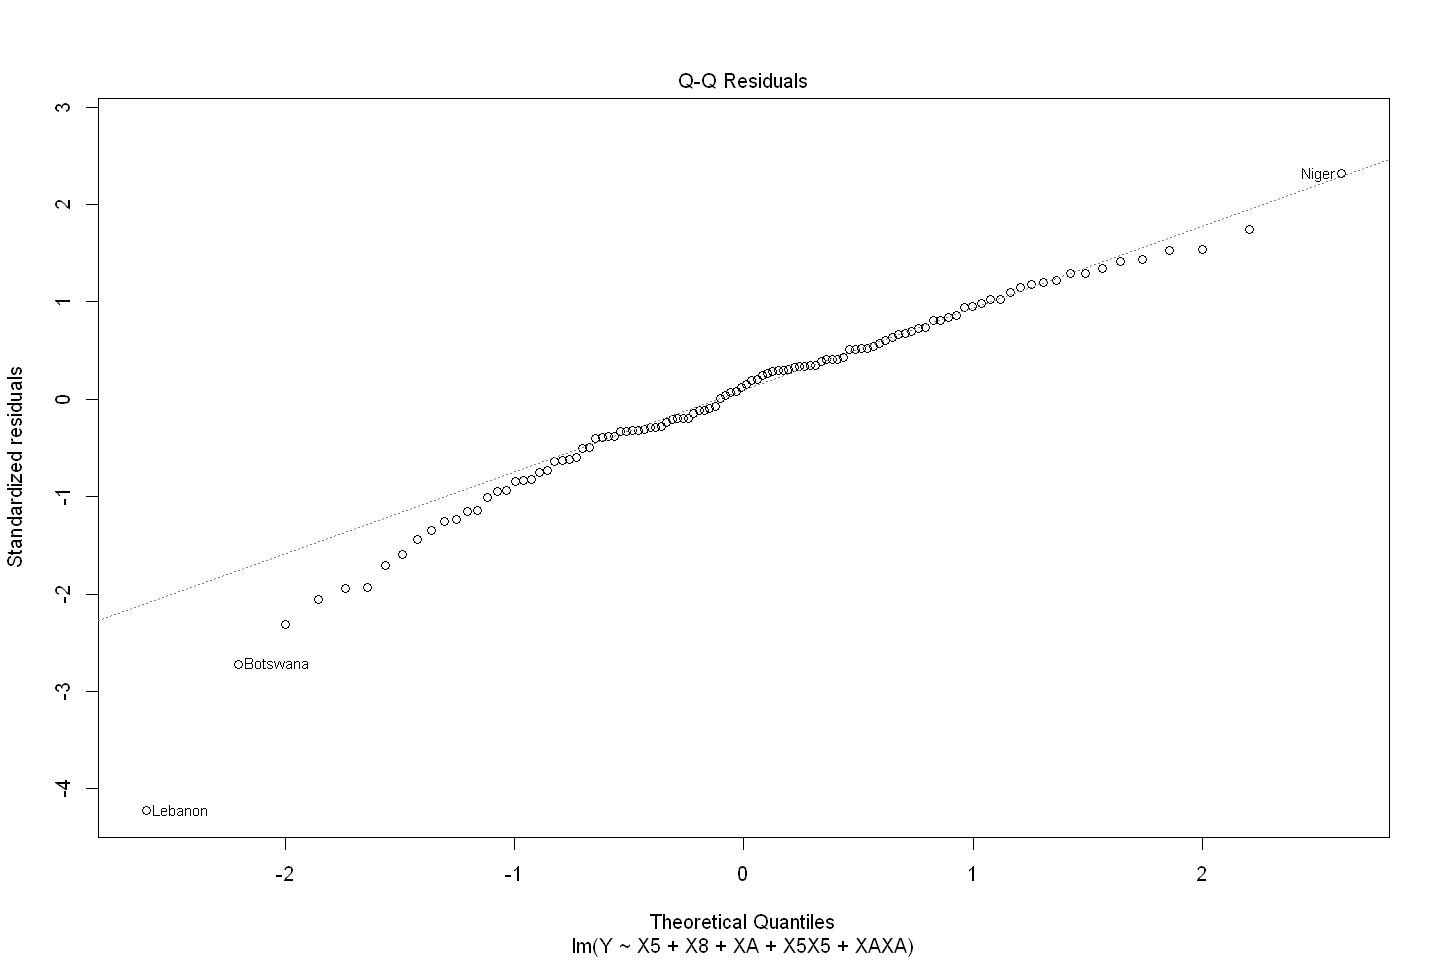

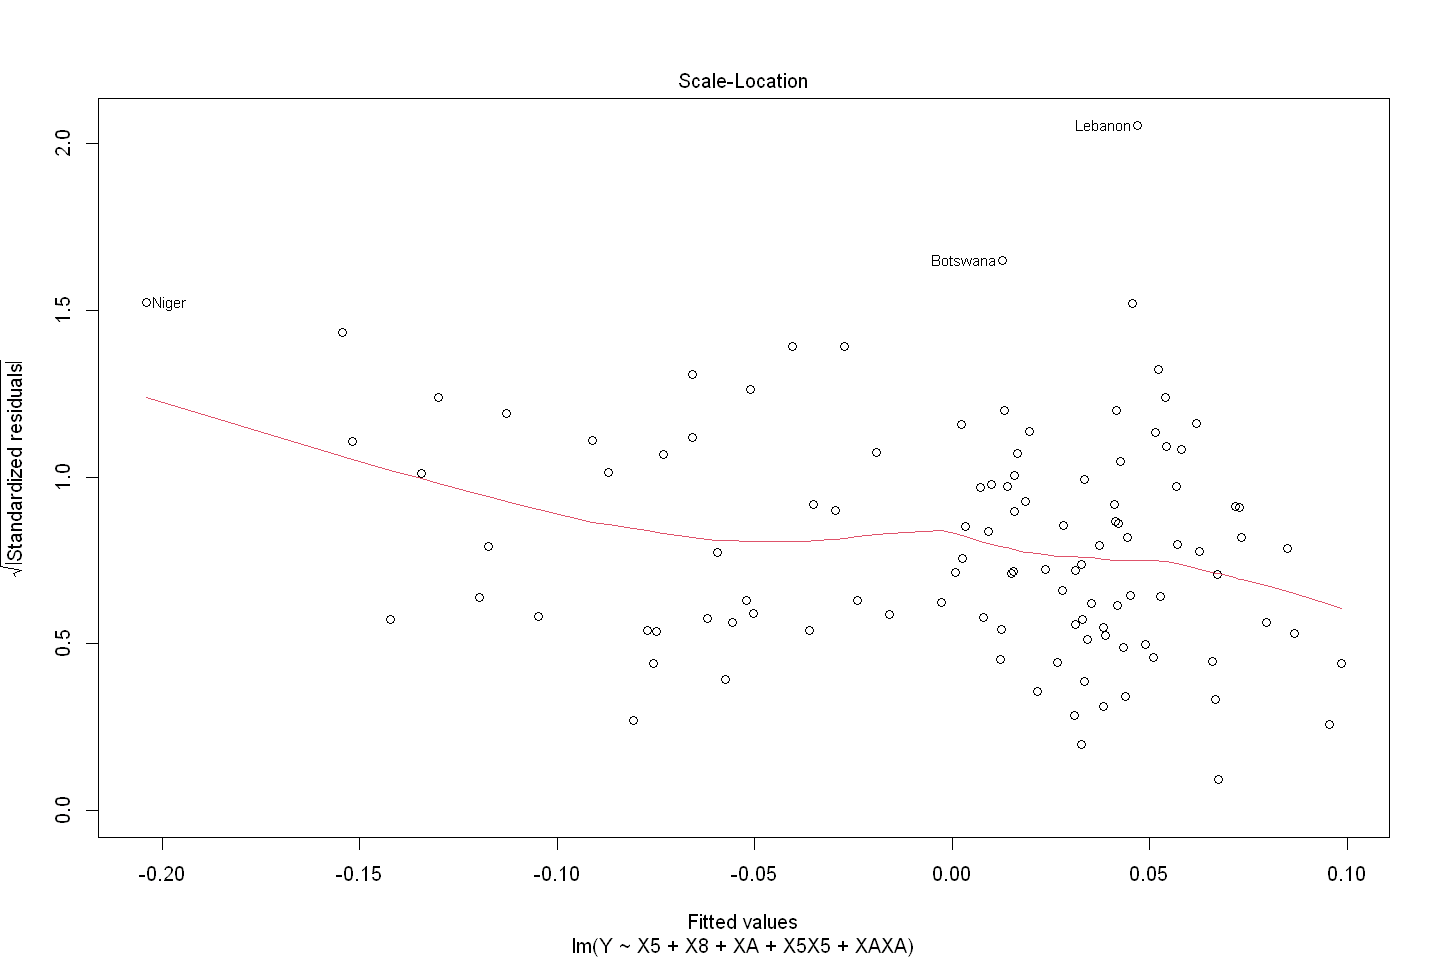

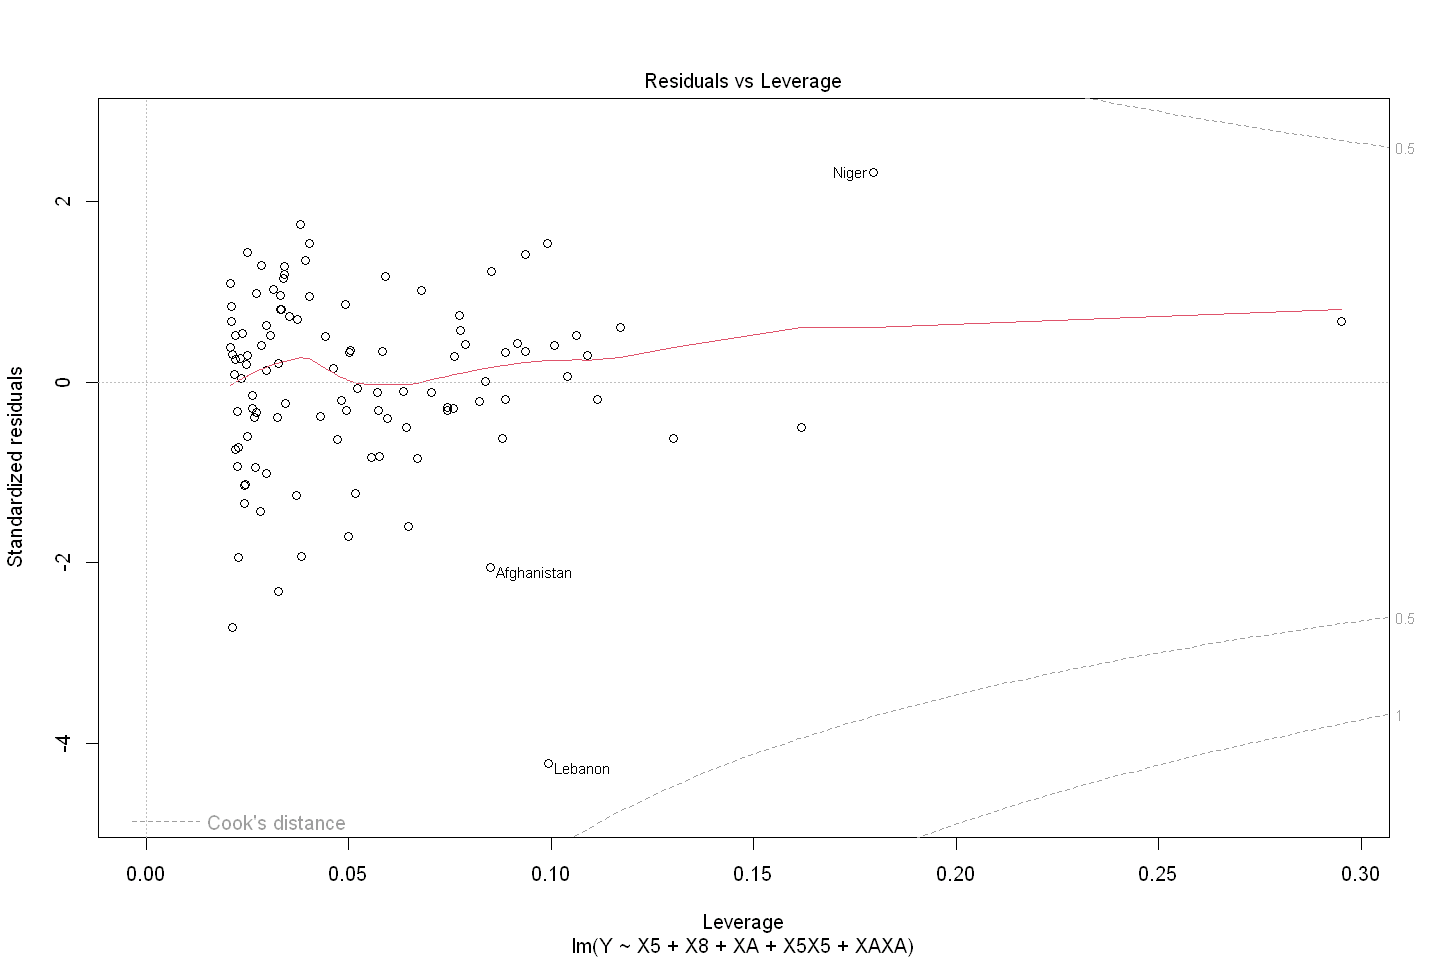

In [188]:
options(repr.plot.width=12, repr.plot.height=8)
plot(Model3)

#### DFBETAS

In [190]:
df_betas <- dfbetas(Model3)
threshold_betas <- 2/sqrt(n)
df_betas <- as.data.frame(df_betas)
df_betas <- df_betas[(df_betas$'(Intercept)' > threshold_betas) | (df_betas$X5 > threshold_betas)
                    | (df_betas$X8 > threshold_betas) | (df_betas$XA > threshold_betas)
                    | (df_betas$X5X5 > threshold_betas) | (df_betas$XAXA > threshold_betas), ]

df_betas$'(Intercept)'[df_betas$'(Intercept)' <= threshold_betas] <- 0
df_betas$X5 [df_betas$X5 <= threshold_betas] <- 0
df_betas$X8 [df_betas$X8 <= threshold_betas] <- 0
df_betas$XA [df_betas$XA <= threshold_betas] <- 0
df_betas$X5X5[df_betas$X5X5 <= threshold_betas] <- 0
df_betas$XAXA[df_betas$XAXA <= threshold_betas] <- 0

df_betas

,(Intercept),X5,X8,XA,X5X5,XAXA
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Afghanistan,0.0000000,0.0000000,0.3509005,0.0000000,0.0000000,0.0000000
Nepal,0.0000000,0.0000000,0.0000000,0.0000000,0.3021353,0.0000000
Kuwait,0.2045756,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000
Jordan,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.1965924
Lesotho,0.0000000,0.2676793,0.0000000,0.0000000,0.0000000,0.0000000
Zimbabwe,0.0000000,0.2978987,0.0000000,0.0000000,0.0000000,0.0000000
Niger,0.0000000,0.0000000,0.0000000,0.0000000,0.6357504,0.0000000
Sierra Leone,0.0000000,0.0000000,0.2079959,0.0000000,0.0000000,0.0000000
Finland,0.0000000,0.2026277,0.0000000,0.0000000,0.0000000,0.0000000


#### 7.3.3.3. Measure of Influence

In [191]:
options(width=1000)
infl <- influence.measures(Model3)
infl

Influence measures of
	 lm(formula = Y ~ X5 + X8 + XA + X5X5 + XAXA, data = df_train) :

                          dfb.1_    dfb.X5    dfb.X8    dfb.XA  dfb.X5X5  dfb.XAXA    dffit cov.r   cook.d    hat inf
Singapore               0.083076 -1.96e-02  2.91e-04  1.30e-01 -9.18e-02  0.072513  0.19519 1.068 6.37e-03 0.0491    
Germany                 0.069961  2.38e-02  2.37e-02 -9.61e-03 -6.85e-03 -0.052455  0.09806 1.055 1.61e-03 0.0211    
Bolivia                -0.031718  3.99e-02 -3.59e-02  9.90e-02  2.74e-02 -0.057909 -0.14133 1.087 3.35e-03 0.0473    
Namibia                -0.135773  3.61e-02 -2.53e-02  7.94e-03  7.84e-02  0.060363 -0.14199 1.030 3.36e-03 0.0224    
Thailand                0.045217 -3.17e-02  1.10e-02  6.50e-02 -4.56e-02  0.038561  0.10914 1.092 2.00e-03 0.0443    
Cyprus                  0.027589 -6.03e-03  1.08e-02  2.87e-03 -1.40e-02 -0.013780  0.03116 1.084 1.63e-04 0.0247    
Afghanistan             0.031189 -2.25e-02  3.51e-01 -1.70e-01 -2.04e-01 -0.055836 -0

#### 7.3.3.4. Plots of Influence

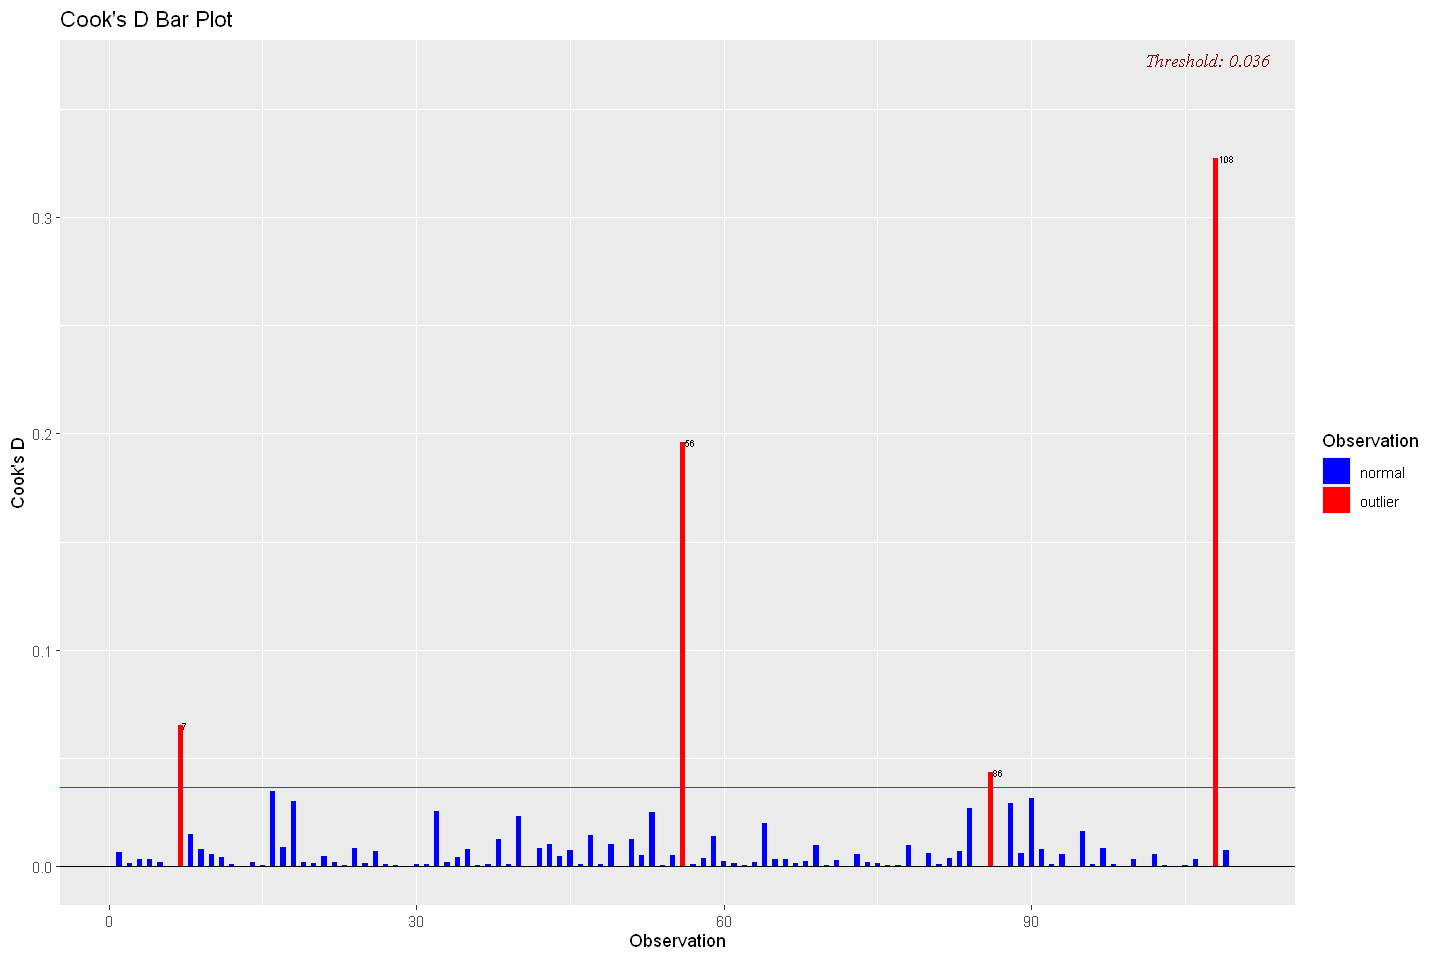

[[1]]
NULL

[[2]]
NULL


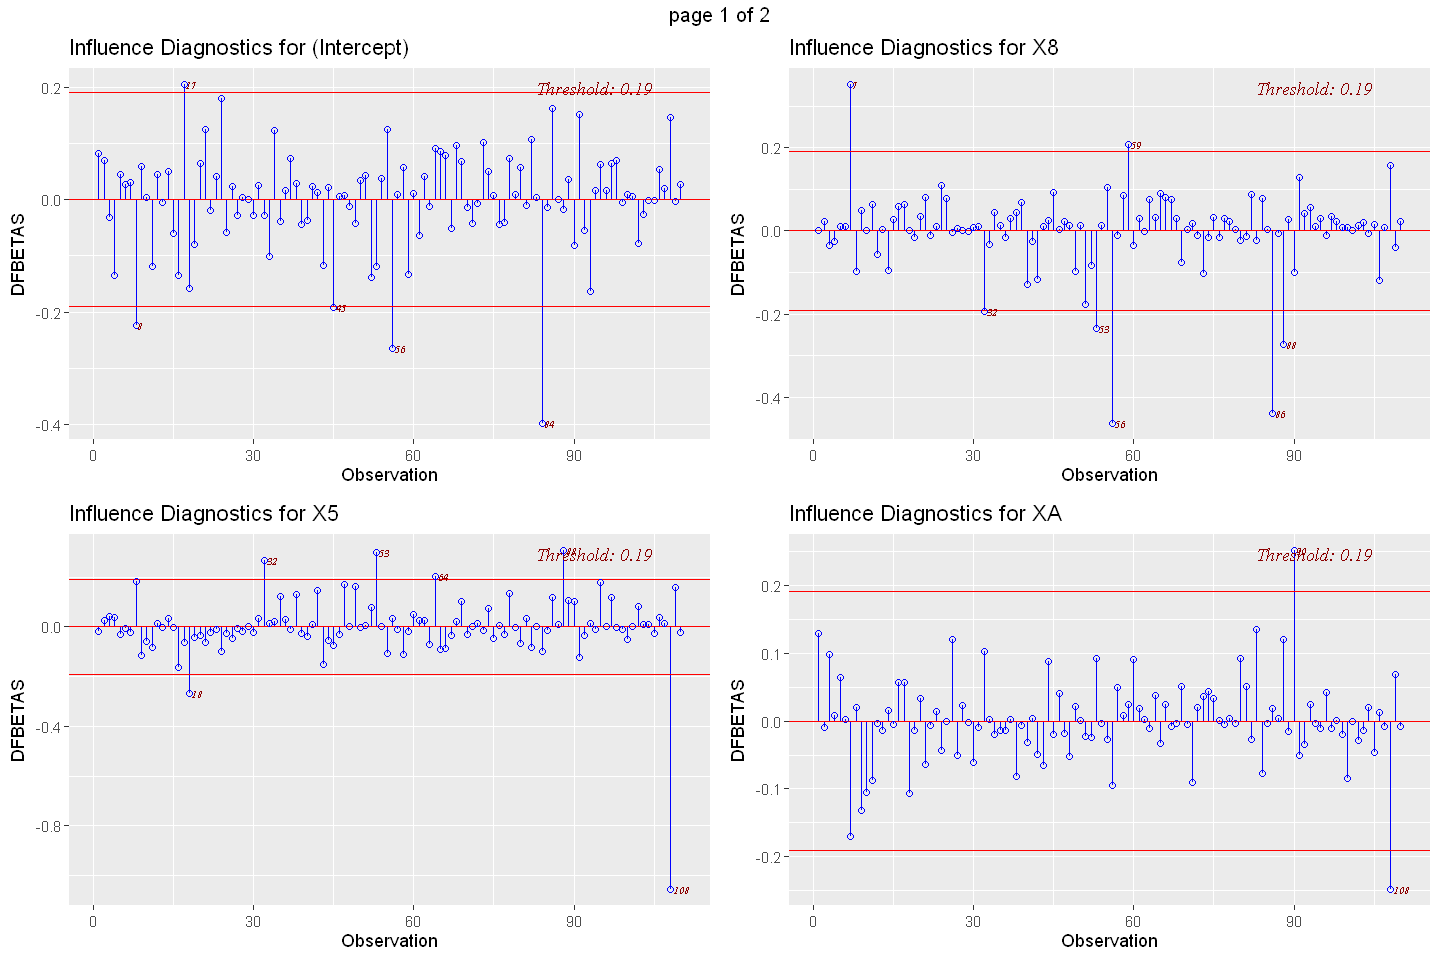

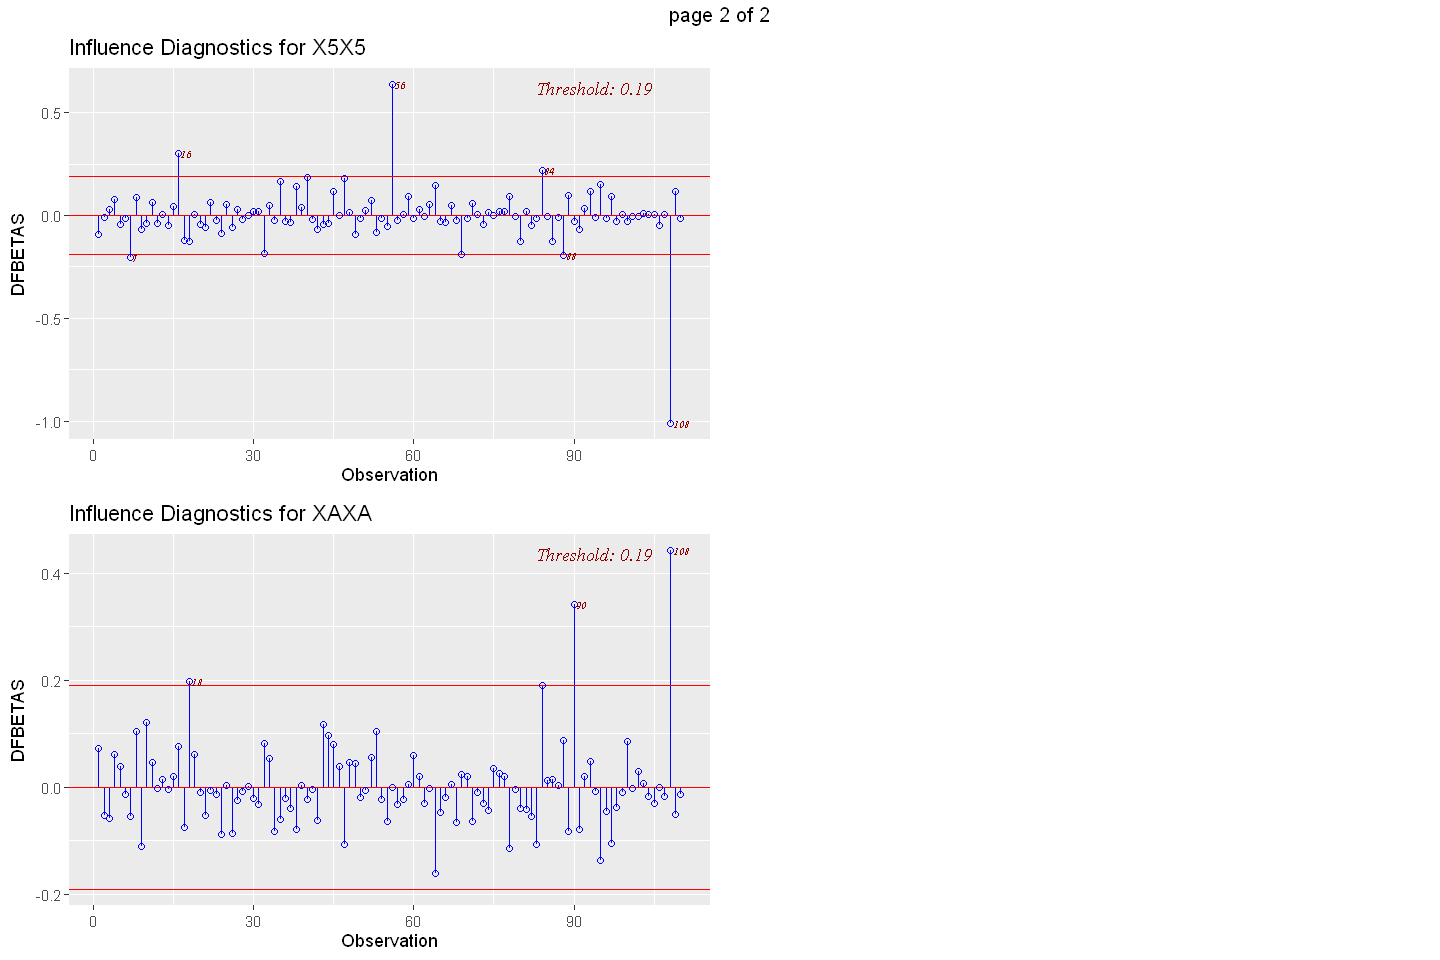

In [192]:
ols_plot_cooksd_bar(Model3)
ols_plot_dfbetas(Model3)

<div style="background-color: #00f0f0; width: 750px; margin: auto; padding: 20px; border: 2px solid black; border-radius: 5px; font-size: 15px;">

<b>Following are the observations that are Outlying as well as Influential for Model 3:</b>
<ul>
  <li>Japan</li>
  <li>Belgium</li>
  <li>Niger</li>
  <li>Malawi</li>
  <li>New Zealand</li>
  <li>United States</li>
  <li>Lebanon</li>
</ul>

<b>Removing all such observations from dataset for model3</b>
</div>


In [193]:
influenced_outliers <- c('Japan', 'Belgium', 'Niger', 'Malawi', 'New Zealand', 'United States', 'Lebanon')
df_train3 <- df_train[!(rownames(df_train) %in% influenced_outliers), ]

Model3 <- lm(Y~X5+X8+XA+X5X5+XAXA, data=df_train3)

# 8. Model Preparation and Analysis

## 8.1. Model 1

### 8.1.1. Model Preparation

In [194]:
Model1 <- lm(Y~X5+X6+X9+XA+X5X5+XAXA+X5X9, data=df_train1)
summary(Model1)


Call:
lm(formula = Y ~ X5 + X6 + X9 + XA + X5X5 + XAXA + X5X9, data = df_train1)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.101069 -0.029106  0.002041  0.030524  0.120966 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.009833   0.006621  -1.485  0.14086    
X5           0.036313   0.086783   0.418  0.67658    
X6           0.578070   0.091886   6.291  9.9e-09 ***
X9           0.261670   0.078338   3.340  0.00120 ** 
XA          -0.170466   0.058158  -2.931  0.00424 ** 
X5X5         0.717447   0.648554   1.106  0.27145    
XAXA         1.414978   0.482706   2.931  0.00424 ** 
X5X9        -0.196610   0.813128  -0.242  0.80947    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.04111 on 94 degrees of freedom
Multiple R-squared:  0.767,	Adjusted R-squared:  0.7497 
F-statistic: 44.21 on 7 and 94 DF,  p-value: < 2.2e-16


<div style="background-color: #00f0f0; width: 750px; margin: auto; padding: 20px; border: 2px solid black; border-radius: 5px; font-size: 15px;">

<b>From summary table following important points are observed:</b>
<ul>
  <li>Overall model fitment is high with F-statistic 44.21, and p-value near 0.</li>
  <li>Attributes <b>X<sub>6</sub>, X<sub>9</sub>, X<sub>A</sub>, X<sub>A</sub><sup>2</sup></b> have p-value &lt; α.</li>
  <li>Confidence for estimation of coefficient for terms <b>X<sub>5</sub>, X<sub>5</sub><sup>2</sup>, X<sub>5</sub>X<sub>9</sub></b> is very low.</li>
</ul>

<b>We will be performing "Extra Sum of Square" test for attributes with low confidence.</b>

</div>


### 8.1.2. Test for existence of regression relation in model

In [196]:
anova.Model1 <- anova(Model1)
anova.Model1

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
X5,1,3.051869e-01,3.051869e-01,180.57529930,1.326839e-23
X6,1,1.659530e-01,1.659530e-01,98.19232743,2.865730e-16
X9,1,1.202948e-02,1.202948e-02,7.11769202,8.989484e-03
XA,1,2.137334e-02,2.137334e-02,12.64634056,5.914439e-04
X5X5,1,2.120376e-03,2.120376e-03,1.25460053,2.655293e-01
XAXA,1,1.623654e-02,1.623654e-02,9.60696091,2.557514e-03
X5X9,1,9.880995e-05,9.880995e-05,0.05846462,8.094660e-01
Residuals,94,1.588676e-01,1.690081e-03,NA,NA


In [197]:
# Counts
n <- nrow(df_train1)
p <- 8
# Compute Analysis from ANOVA Table
SSE <- deviance(Model1) # anova.Model1[rownames(anova.Model1) == 'Residuals', 'Sum Sq']
SST <- sum(anova.Model1$'Sum Sq')
SSR <- SST - SSE
#Degree of freedoms
df_SSE <- n - p
df_SST <- n - 1
df_SSR <- p - 1

In [198]:
# Obtain Mean Squares
MSE <- SSE/df_SSE
MSR <- SSR/df_SSR
Fstar <- MSR/MSE

In [200]:
no_of_coeff <- p-1
F_Value <- qf(1-alpha, no_of_coeff, n-p)

F_Statistic <- Fstar
P_Value <- 1 - pf(F_Statistic, no_of_coeff, n-p)

<b>State the Hypothesis:</b>
<ul>
  <li><i>H<sub>0</sub></i>: β<sub>5</sub>, β<sub>6</sub>, β<sub>9</sub>, β<sub>A</sub>, β<sub>55</sub>, β<sub>AA</sub>, β<sub>59</sub> = 0</li>
  <li><i>H<sub>a</sub></i>: Not all β<sub>i</sub> are zero.</li>
</ul>

<b>Formulate the analysis plan:</b>
<ul>
  <li>Significant level: 0 &lt; α &lt; 1</li>
  <li>Test method: <i>F − statistic</i></li>
</ul>

</div>


#### Analyse sample data:

In [201]:
print(paste("F-Value : ", F_Value))
print(paste("F_Statistic: ", F_Statistic))
print(paste("P-Value : ", P_Value))

[1] "F-Value :  2.10857018951906"
[1] "F_Statistic:  44.2073836261144"
[1] "P-Value :  0"


<b>Decision Rules:</b>
<ul>
  <li>If F-statistic ≤ F-value, conclude <i>H<sub>0</sub></i>, otherwise conclude <i>H<sub>a</sub></i>.</li>
</ul>

<b>Interpret your results:</b>
<ul>
  <li>As F-statistic (44.207) &gt; F-value, therefore conclude <i>H<sub>a</sub></i>.</li>
</ul>

<b>Conclusion:</b>
<ul>
  <li>Not all β<sub>i</sub> are zero and therefore there exists a relation between dependent and independent variables.</li>
</ul>

<b>P-value for the test is near 0.0000</b>

</div>


### 8.1.3. "Extra Sum of Square" test for attributes with low confidence

Reduced model after removing <i>X<sub>5</sub></i>, <i>X<sub>5</sub><sup>2</sup></i>, and <i>X<sub>5</sub>X<sub>9</sub></i>

</div>


In [202]:
model.reduced <- lm(Y~X6+X9+XA+XAXA, data=df_train1)

In [203]:
df_SSE_R <- n - 5
SSE_R <- deviance(model.reduced)
SSE_R

[1] 0.1611302

In [204]:
F_Value <- qf(1-alpha, 3, n-p)
F_Statistic <- ((n-p)/(3))*((SSE_R - SSE)/SSE)
P_Value <- 1 - pf(F_Statistic, 3, n-p)

<b>State the Hypothesis:</b><br>
<ul>
  <li><i>H<sub>0</sub></i> : &beta;<sub>5</sub>, &beta;<sub>55</sub>, &beta;<sub>59</sub> = 0</li>
  <li><i>H<sub>a</sub></i> : &beta;<sub>5</sub> &ne; 0 or &beta;<sub>55</sub> &ne; 0 or &beta;<sub>59</sub> &ne; 0</li>
</ul>
<b>Formulate the analysis plan:</b><br>
<ul>
  <li>Significant level: 0 &lt; &alpha; &lt; 1</li>
  <li>Test method: <i>F – statistic</i></li>
</ul>

</div>


#### Analyse sample data:

In [205]:
print(paste("F-Value : ", F_Value))
print(paste("F_Statistic: ", F_Statistic))
print(paste("P-Value : ", P_Value))

[1] "F-Value :  2.70144763404228"
[1] "F_Statistic:  0.446257617613124"
[1] "P-Value :  0.720517619186984"


<b>State the Hypothesis:</b><br>
<ul>
  <li><i>H<sub>0</sub></i> : β<sub>5</sub>, β<sub>55</sub>, β<sub>59</sub> = 0</li>
  <li><i>H<sub>a</sub></i> : β<sub>5</sub> ≠ 0 or β<sub>55</sub> ≠ 0 or β<sub>59</sub> ≠ 0</li>
</ul>

<b>Formulate the analysis plan:</b><br>
<ul>
  <li>Significant level: 0 &lt; α &lt; 1</li>
  <li>Test method: <i>F – statistic</i></li>
</ul>

<b>Decision Rules:</b><br>
<ul>
  <li>If F-statistic ≤ F-value, conclude <i>H<sub>0</sub></i>, otherwise conclude <i>H<sub>a</sub></i>.</li>
</ul>

<b>Interpret your results:</b><br>
<ul>
  <li>As F-statistic (0.44625) ≤ F-value, therefore conclude <i>H<sub>0</sub></i>.</li>
</ul>

<b>Conclusion:</b><br>
<ul>
  <li><i>H<sub>0</sub></i> : β<sub>5</sub>, β<sub>55</sub>, β<sub>59</sub> = 0 and therefore all three terms should be dropped from the model.</li>
</ul>

</div>


### 8.1.4. Modified Model 1

In [206]:
Model1 <- lm(Y~X6+X9+XA+XAXA, data=df_train1)
summary(Model1)
anova(Model1)


Call:
lm(formula = Y ~ X6 + X9 + XA + XAXA, data = df_train1)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.09696 -0.02576  0.00052  0.03113  0.11873 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.006092   0.005225  -1.166 0.246490    
X6           0.578168   0.063992   9.035 1.63e-14 ***
X9           0.269953   0.076409   3.533 0.000631 ***
XA          -0.170348   0.051965  -3.278 0.001451 ** 
XAXA         1.440433   0.461253   3.123 0.002361 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.04076 on 97 degrees of freedom
Multiple R-squared:  0.7637,	Adjusted R-squared:  0.7539 
F-statistic: 78.37 on 4 and 97 DF,  p-value: < 2.2e-16


,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
X6,1,0.46784681,0.467846805,281.642593,1.925317e-30
X9,1,0.01035567,0.010355666,6.234085,1.421662e-02
XA,1,0.02633340,0.026333398,15.852639,1.323136e-04
XAXA,1,0.01619990,0.016199900,9.752299,2.361101e-03
Residuals,97,0.16113025,0.001661137,NA,NA


## 8.2. Model 2

### 8.2.1. Model Preparation

In [207]:
Model2 <- lm(Y~X5+X6+XA+XC+X5X5+XAXA+X5X6, data=df_train2)
summary(Model2)


Call:
lm(formula = Y ~ X5 + X6 + XA + XC + X5X5 + XAXA + X5X6, data = df_train2)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.122332 -0.021803  0.003668  0.028796  0.096047 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.005832   0.006583  -0.886  0.37788    
X5           0.008026   0.085766   0.094  0.92564    
X6           0.812250   0.076783  10.579  < 2e-16 ***
XA          -0.175628   0.060570  -2.900  0.00464 ** 
XC           0.112056   0.068410   1.638  0.10473    
X5X5        -1.467241   0.998060  -1.470  0.14484    
XAXA         1.245692   0.465503   2.676  0.00878 ** 
X5X6         2.564762   1.146013   2.238  0.02756 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.04217 on 95 degrees of freedom
Multiple R-squared:  0.7592,	Adjusted R-squared:  0.7414 
F-statistic: 42.78 on 7 and 95 DF,  p-value: < 2.2e-16


<div style="background-color: #00f0f0; width: 750px; margin: auto; padding: 20px; border: 2px solid black; border-radius: 5px; font-size: 15px;">

<p><strong>From summary table following important points are observed:</strong></p>

<ul>
  <li>Overall model fitment is high with F-statistic 42.78, and p-value near 0.</li>
  <li>Attributes <i>X<sub>6</sub></i>, <i>X<sub>A</sub></i>, <i>X<sub>A</sub><sup>2</sup></i>, and <i>X<sub>5</sub>X<sub>6</sub></i> have p-value &lt; α.</li>
  <li>Confidence for estimation of coefficient for terms <i>X<sub>5</sub></i>, <i>X<sub>C</sub></i>, and <i>X<sub>5</sub><sup>2</sup></i> is very low.</li>
</ul>

<p><strong>We will be performing "Extra Sum of Square" test for attributes with low confidence.</strong></p>

</div>


### 8.2.2. Test for existence of regression relation in model

In [208]:
anova.Model2 <- anova(Model2)
anova.Model2

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
X5,1,0.318942153,0.318942153,179.3558902,1.329954e-23
X6,1,0.173324937,0.173324937,97.4686102,3.091696e-16
XA,1,0.019727507,0.019727507,11.0936877,1.234643e-03
XC,1,0.002354823,0.002354823,1.3242257,2.527233e-01
X5X5,1,0.000538419,0.000538419,0.3027779,5.834377e-01
XAXA,1,0.008707028,0.008707028,4.8963634,2.930850e-02
X5X6,1,0.008906591,0.008906591,5.0085873,2.755798e-02
Residuals,95,0.168935096,0.001778264,NA,NA


In [209]:
# Counts
n <- nrow(df_train2)
p <- 8
# Compute Analysis from ANOVA Table
SSE <- deviance(Model2)
SST <- sum(anova.Model2$'Sum Sq')
SSR <- SST - SSE
#Degree of freedoms
df_SSE <- n - p
df_SST <- n - 1
df_SSR <- p - 1

In [210]:
# Obtain Mean Squares
MSE <- SSE/df_SSE
MSR <- SSR/df_SSR
Fstar <- MSR/MSE

In [211]:
no_of_coeff <- p-1
F_Value <- qf(1-alpha, no_of_coeff, n-p)
F_Statistic <- Fstar
P_Value <- 1 - pf(F_Statistic, no_of_coeff, n-p)


<p><strong>State the Hypothesis:</strong></p>
<ul>
  <li><i>H<sub>0</sub></i> : β<sub>5</sub>, β<sub>6</sub>, β<sub>A</sub>, β<sub>C</sub>, β<sub>55</sub>, β<sub>AA</sub>, β<sub>56</sub> = 0</li>
  <li><i>H<sub>a</sub></i> : Not all β<sub>i</sub> are zero.</li>
</ul>

<p><strong>Formulate the analysis plan:</strong></p>
<ul>
  <li>Significant level: 0 &lt; α &lt; 1</li>
  <li>Test method: <i>F - statistic</i></li>
</ul>

</div>


#### Analyse sample data

In [212]:
print(paste("F-Value : ", F_Value))
print(paste("F_Statistic: ", F_Statistic))
print(paste("P-Value : ", P_Value))

[1] "F-Value :  2.10750646410958"
[1] "F_Statistic:  42.7785917534938"
[1] "P-Value :  0"



<b>Decision Rules:</b><br>
<ul>
  <li>If F-statistic &le; F-value, conclude <i>H<sub>0</sub></i>, otherwise conclude <i>H<sub>a</sub></i>.</li>
</ul>

<b>Interpret your results:</b><br>
<ul>
  <li>As F-statistic (42.779) &gt; F-value, therefore conclude <i>H<sub>a</sub></i>.</li>
</ul>

<b>Conclusion:</b><br>
<ul>
  <li>Not all <i>&beta;<sub>i</sub></i> are zero and therefore there exist a relation between dependent and independent variables.</li>
</ul>

<b>P-value for the test is near 0.0000</b>

</div>


### 8.2.3. "Extra Sum of Square" test for attributes with low confidence


<b>Reduced model after removing</b> <i>X<sub>5</sub></i>, <i>X<sub>C</sub></i>, and <i>X<sub>5</sub><sup>2</sup></i>.


In [213]:
model.reduced <- lm(Y~X6+XA+XAXA+X5X6, data=df_train2)

In [214]:
df_SSE_R <- n - 5
SSE_R <- deviance(model.reduced)

In [215]:
F_Value <- qf(1-alpha, 3, n-p)
F_Statistic <- ((n-p)/(3))*((SSE_R - SSE)/SSE)
P_Value <- 1 - pf(F_Statistic, 3, n-p)

<b>State the Hypothesis:</b>
<ul>
  <li><i>H<sub>0</sub></i> : β<sub>5</sub>, β<sub>C</sub>, β<sub>55</sub> = 0</li>
  <li><i>H<sub>a</sub></i> : β<sub>5</sub> ≠ 0 or β<sub>C</sub> ≠ 0 or β<sub>55</sub> ≠ 0</li>
</ul>

<b>Formulate the analysis plan:</b>
<ul>
  <li>Significant level: 0 &lt; α &lt; 1</li>
  <li>Test method: <i>F – statistic</i></li>
</ul>

#### Analyse sample data:

In [216]:
print(paste("F-Value : ", F_Value))
print(paste("F_Statistic: ", F_Statistic))
print(paste("P-Value : ", P_Value))

[1] "F-Value :  2.7004090629698"
[1] "F_Statistic:  1.45910684188962"
[1] "P-Value :  0.230664509622759"


<b>Decision Rules:</b><br>
<ul>
  <li>If F-statistic &le; F-value, conclude <i>H<sub>0</sub></i>, otherwise conclude <i>H<sub>a</sub></i>.</li>
</ul>

<b>Interpret your results:</b><br>
<ul>
  <li>As F-statistic (1.459) &le; F-value, therefore conclude <i>H<sub>0</sub></i>.</li>
</ul>

<b>Conclusion:</b><br>
<ul>
  <li><i>H<sub>0</sub></i> : &beta;<sub>5</sub>, &beta;<sub>C</sub>, &beta;<sub>55</sub> = 0 and therefore all three terms should be dropped from the model.</li>
</ul>

<div style="background-color: #00f0f0; width: 750px; margin: auto; padding: 20px; border: 2px solid black; border-radius: 5px; font-size: 15px;">

<b>As linear term <i>X<sub>5</sub></i> has been removed and interaction term <i>X<sub>5</sub>X<sub>6</sub></i> is in model, "Extra Sum of Square" test will be performed to analyze whether <i>X<sub>5</sub>X<sub>6</sub></i> should be kept or dropped from model.</b>

</div>


### 8.2.4. "Extra Sum of Square" test for extra interaction term

<b>Reduced model after removing <i>X<sub>5</sub>X<sub>6</sub></i>.</b>


In [217]:
model.reduced2 <- lm(Y~X6+XA+XAXA, data=df_train2)

In [218]:
df_SSE_R2 <- n - 4
SSE_R2 <- deviance(model.reduced2)

In [219]:
F_Value     <- qf(1-alpha, 1, n-5)
F_Statistic <- ((n-5)/(1))*((SSE_R2 - SSE_R)/SSE_R)
P_Value     <- 1 - pf(F_Statistic, 1, n-5)

<b>State the Hypothesis:</b><br>
<ul>
  <li><i>H<sub>0</sub></i> : β<sub>56</sub> = 0</li>
  <li><i>H<sub>a</sub></i> : β<sub>56</sub> ≠ 0</li>
</ul>

<b>Formulate the analysis plan:</b>
<ul>
  <li>Significant level: 0 &lt; α &lt; 1</li>
  <li>Test method: <i>F − statistic</i></li>
</ul>


#### Analyse sample data:

In [220]:
print(paste("F-Value : ", F_Value))
print(paste("F_Statistic: ", F_Statistic))
print(paste("P-Value : ", P_Value))

[1] "F-Value :  3.93811107800336"
[1] "F_Statistic:  2.63780634846605"
[1] "P-Value :  0.107559766122553"


<b>Decision Rules:</b>
<ul>
  <li>If F-statistic &le; F-value, conclude <i>H<sub>0</sub></i>, otherwise conclude <i>H<sub>a</sub></i>.</li>
</ul>

<b>Interpret your results:</b>
<ul>
  <li>As F-statistic (2.6378) &le; F-value, therefore conclude <i>H<sub>0</sub></i>.</li>
</ul>

<b>Conclusion:</b>
<ul>
  <li><i>H<sub>0</sub></i> : β<sub>56</sub> = 0 and therefore interaction term should be dropped from the model.</li>
</ul>


### Modified Model 2

In [221]:
Model2 <- lm(Y~X6+XA+XAXA, data=df_train2)
summary(Model2)
anova(Model2)


Call:
lm(formula = Y ~ X6 + XA + XAXA, data = df_train2)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.134671 -0.023618  0.005243  0.030795  0.106601 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.001117   0.005122  -0.218  0.82788    
X6           0.761909   0.047296  16.110  < 2e-16 ***
XA          -0.169318   0.053958  -3.138  0.00224 ** 
XAXA         0.955372   0.458267   2.085  0.03967 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.04281 on 99 degrees of freedom
Multiple R-squared:  0.7413,	Adjusted R-squared:  0.7334 
F-statistic: 94.55 on 3 and 99 DF,  p-value: < 2.2e-16


,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
X6,1,0.487112478,0.487112478,265.73319,8.637105e-30
XA,1,0.024881373,0.024881373,13.57347,3.742133e-04
XAXA,1,0.007966933,0.007966933,4.34618,3.966558e-02
Residuals,99,0.181475770,0.001833089,NA,NA


## 8.3. Model 3

### 8.3.1. Model Preparation

In [222]:
Model3 <- lm(Y~X5+X8+XA+X5X5+XAXA, data=df_train3)
summary(Model3)


Call:
lm(formula = Y ~ X5 + X8 + XA + X5X5 + XAXA, data = df_train3)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.173175 -0.028883  0.007398  0.039251  0.105191 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.002003   0.008871   0.226    0.822    
X5           0.407978   0.098297   4.150 7.13e-05 ***
X8           0.418867   0.087689   4.777 6.32e-06 ***
XA          -0.087889   0.081496  -1.078    0.284    
X5X5        -0.126847   0.899085  -0.141    0.888    
XAXA         0.677597   0.643198   1.053    0.295    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.05766 on 97 degrees of freedom
Multiple R-squared:  0.5676,	Adjusted R-squared:  0.5453 
F-statistic: 25.47 on 5 and 97 DF,  p-value: 2.525e-16


<div style="background-color: #00f0f0; width: 750px; margin: auto; padding: 20px; border: 2px solid black; border-radius: 5px; font-size: 15px;">

<b>From summary table following important points are observed:</b>
<ul>
  <li>Overall model fitment is high with F-statistic 25.47, and p-value near 0.</li>
  <li><i>R<sup>2</sup></i> for model is 0.54, which is very less than other two models.</li>
  <li>Attributes <b>X<sub>5</sub></b>, <b>X<sub>8</sub></b> have p-value &lt; alpha.</li>
  <li>Confidence for estimation of coefficient for terms <b>X<sub>A</sub></b>, <b>X<sub>5</sub><sup>2</sup></b>, and <b>X<sub>A</sub><sup>2</sup></b> is very low.</li>
</ul>

<b>We will be performing "Extra Sum of Square" test for attributes with low confidence.</b>

</div>


### 8.3.2. Test for existence of regression relation in model

In [223]:
anova.Model3 <- anova(Model3)
anova.Model3

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
X5,1,3.315854e-01,3.315854e-01,99.731382240,1.433324e-16
X8,1,8.193426e-02,8.193426e-02,24.643473172,2.950581e-06
XA,1,6.129305e-03,6.129305e-03,1.843519073,1.776893e-01
X5X5,1,2.913251e-05,2.913251e-05,0.008762222,9.256146e-01
XAXA,1,3.689918e-03,3.689918e-03,1.109821361,2.947379e-01
Residuals,97,3.225042e-01,3.324785e-03,NA,NA


In [224]:
# Counts
n <- nrow(df_train3)
p <- 8
# Compute Analysis from ANOVA Table
SSE <- deviance(Model3) # anova.Model1[rownames(anova.Model1) == 'Residuals', 'Sum Sq']
SST <- sum(anova.Model3$'Sum Sq')
SSR <- SST - SSE
#Degree of freedoms
df_SSE <- n - p
df_SST <- n - 1
df_SSR <- p - 1

In [225]:
# Obtain Mean Squares
MSE <- SSE/df_SSE
MSR <- SSR/df_SSR
Fstar <- MSR/MSE

In [226]:
no_of_coeff <- p-1
F_Value <- qf(1-alpha, no_of_coeff, n-p)
F_Statistic <- Fstar
P_Value <- 1 - pf(F_Statistic, no_of_coeff, n-p)

<b>State the Hypothesis:</b>
<ul>
  <li><b>H<sub>0</sub></b>: β<sub>5</sub>, β<sub>8</sub>, β<sub>A</sub>, β<sub>55</sub>, β<sub>AA</sub> = 0</li>
  <li><b>H<sub>a</sub></b>: Not all β<sub>i</sub> are zero.</li>
</ul>

<b>Formulate the analysis plan:</b>
<ul>
  <li>Significance level: 0 &lt; α &lt; 1</li>
  <li>Test method: <i>F – statistic</i></li>
</ul>


#### Analyse sample data:

In [227]:
print(paste("F-Value : ", F_Value))
print(paste("F_Statistic: ", F_Statistic))
print(paste("P-Value : ", P_Value))

[1] "F-Value :  2.10750646410958"
[1] "F_Statistic:  17.8159219681913"
[1] "P-Value :  6.55031584528842e-15"



<b>State the Hypothesis:</b>
<ul>
  <li><b>H<sub>0</sub></b>: β<sub>5</sub>, β<sub>8</sub>, β<sub>A</sub>, β<sub>55</sub>, β<sub>AA</sub> = 0</li>
  <li><b>H<sub>a</sub></b>: Not all β<sub>i</sub> are zero.</li>
</ul>

<b>Formulate the analysis plan:</b>
<ul>
  <li>Significance level: 0 &lt; α &lt; 1</li>
  <li>Test method: <i>F – statistic</i></li>
</ul>

<b>Decision Rules:</b>
<ul>
  <li>If F-statistic ≤ F-value, conclude <b>H<sub>0</sub></b>; otherwise, conclude <b>H<sub>a</sub></b>.</li>
</ul>

<b>Interpret your results:</b>
<ul>
  <li>As F-statistic (17.816) &gt; F-value, therefore conclude <b>H<sub>a</sub></b>.</li>
</ul>

<b>Conclusion:</b>
<ul>
  <li>Not all β<sub>i</sub> are zero and therefore there exists a relation between dependent and independent variables.</li>
</ul>

<b>P-value for the test is near 0.0000</b>


### 8.3.3. "Extra Sum of Square" test for attributes with low confidence

<b>Reduced model after removing</b> X<sub>A</sub>, X<sub>5</sub><sup>2</sup>, and X<sub>A</sub><sup>2</sup>.


In [228]:
model.reduced <- lm(Y~X5+X8, data=df_train3)

In [229]:
df_SSE_R <- n - 5
SSE_R <- deviance(model.reduced)

In [230]:
F_Value <- qf(1-alpha, 3, n-p)
F_Statistic <- ((n-p)/(3))*((SSE_R - SSE)/SSE)
P_Value <- 1 - pf(F_Statistic, 3, n-p)

<b>State the Hypothesis:</b><br>
<ul>
  <li>H<sub>0</sub>: β<sub>A</sub>, β<sub>55</sub>, β<sub>AA</sub> = 0</li>
  <li>H<sub>a</sub>: β<sub>A</sub> ≠ 0 or β<sub>55</sub> ≠ 0 or β<sub>AA</sub> ≠ 0</li>
</ul>

<b>Formulate the analysis plan:</b>
<ul>
  <li>Significant level: 0 &lt; α &lt; 1</li>
  <li>Test method: <i>F – statistic</i></li>
</ul>

#### Analyse sample data:

In [231]:
print(paste("F-Value : ", F_Value))
print(paste("F_Statistic: ", F_Statistic))
print(paste("P-Value : ", P_Value))

[1] "F-Value :  2.7004090629698"
[1] "F_Statistic:  0.967009458032722"
[1] "P-Value :  0.411695371219825"


<b>Decision Rules:</b><br>
<ul>
  <li>If F-statistic ≤ F-value, conclude H<sub>0</sub>, otherwise conclude H<sub>a</sub>.</li>
</ul>

<b>Interpret your results:</b><br>
<ul>
  <li>As F-statistic (0.967) ≤ F-value, therefore conclude H<sub>0</sub>.</li>
</ul>

<b>Conclusion:</b><br>
<ul>
  <li>H<sub>0</sub>: β<sub>A</sub>, β<sub>55</sub>, β<sub>AA</sub> = 0 and therefore all three terms should be dropped from the model.</li>
</ul>


### 8.3.4. Modified Model 3

In [232]:
Model3 <- lm(Y~X5+X8, data=df_train3)
summary(Model3)
anova(Model3)


Call:
lm(formula = Y ~ X5 + X8, data = df_train3)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.178822 -0.029834  0.009407  0.039785  0.105820 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 0.005986   0.005686   1.053    0.295    
X5          0.460278   0.087727   5.247 8.69e-07 ***
X8          0.399451   0.080451   4.965 2.83e-06 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.05765 on 100 degrees of freedom
Multiple R-squared:  0.5544,	Adjusted R-squared:  0.5455 
F-statistic: 62.21 on 2 and 100 DF,  p-value: < 2.2e-16


,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
X5,1,0.33158545,0.331585450,99.76919,1.049603e-16
X8,1,0.08193426,0.081934261,24.65282,2.830234e-06
Residuals,100,0.33235255,0.003323525,NA,NA


<div style="background-color: #00f0f0; width: 750px; margin: auto; padding: 20px; border: 2px solid black; border-radius: 5px; font-size: 15px;">

<b>Final terms in models after performing "Extra Sum of Square" Tests:</b><br><br>
<ul>
  <li><b>Model 1:</b> X<sub>6</sub>, X<sub>9</sub>, X<sub>A</sub>, X<sub>A</sub><sup>2</sup></li>
  <li><b>Model 2:</b> X<sub>6</sub>, X<sub>A</sub>, X<sub>A</sub><sup>2</sup></li>
  <li><b>Model 3:</b> X<sub>5</sub>, X<sub>8</sub></li>
</ul>

</div>


# 9. Residual Analysis and other diagnostic studies

## 9.1. Model 1

### 9.1.1. Linearity assumption validation

In [233]:
e <- residuals(Model1)
Y_hat <- fitted(Model1)

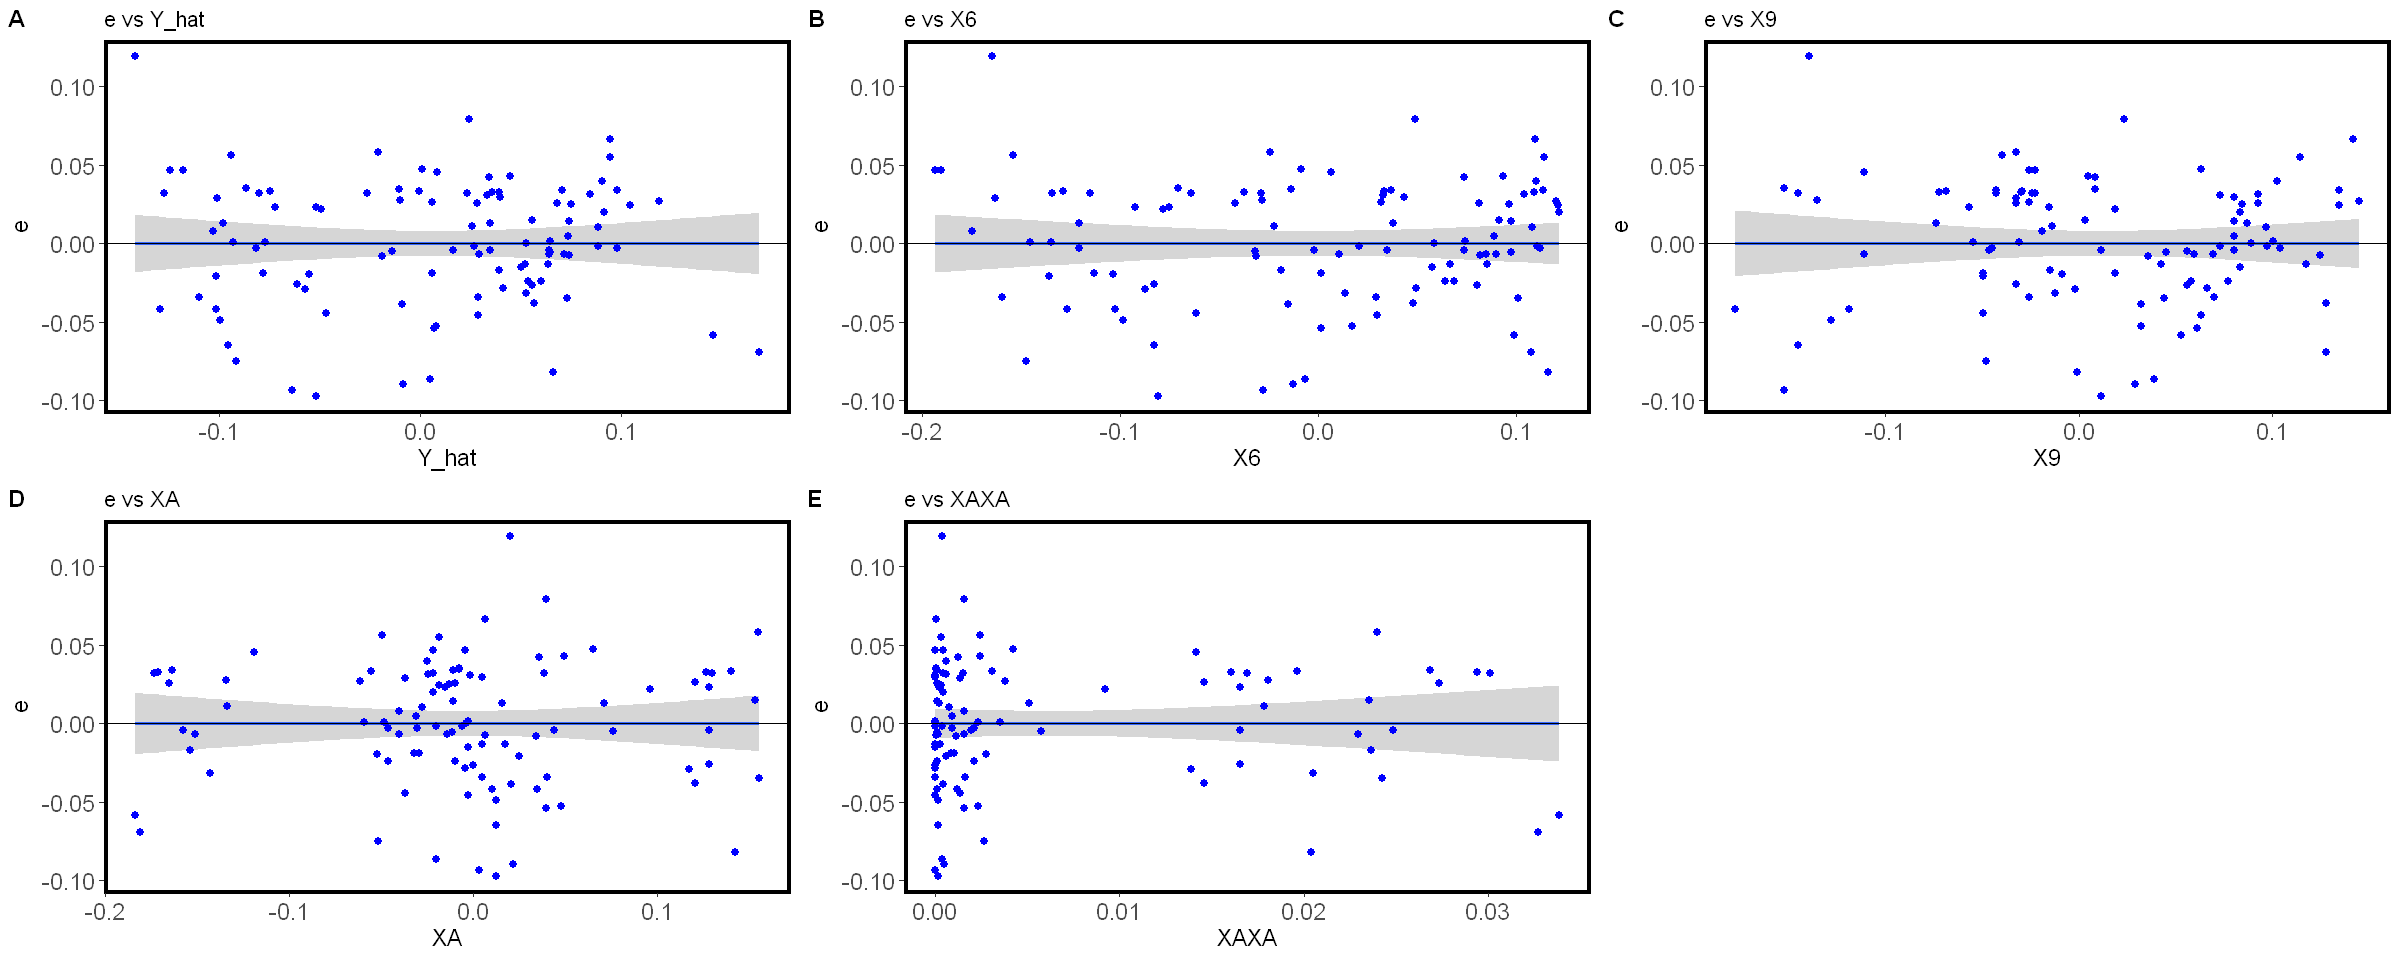

In [234]:
options(repr.plot.width=20, repr.plot.height=8)

df_join = as.data.frame(cbind(Y_hat, e))
colnames(df_join) = c("Y_hat", "e")
plot0 <- ggplot(data=df_join, aes(x=Y_hat, y=e)) + geom_smooth(method='lm', formula= y~x) +
                geom_point(aes(x=Y_hat, y=e), size=2, fill="blue", color="blue", pch = 21) +
                ggtitle("e vs Y_hat") + geom_hline(yintercept=0) + plottheme

df_join = as.data.frame(cbind(df_train1$X6, e))
colnames(df_join) = c("X6", "e")
plot1 <- ggplot(data=df_join, aes(x=X6, y=e)) + geom_smooth(method='lm', formula= y~x) +
                geom_point(aes(x=X6, y=e), size=2, fill="blue", color="blue", pch = 21) +
                ggtitle("e vs X6") + geom_hline(yintercept=0) + plottheme

df_join = as.data.frame(cbind(df_train1$X9, e))
colnames(df_join) = c("X9", "e")
plot2 <- ggplot(data=df_join, aes(x=X9, y=e)) + geom_smooth(method='lm', formula= y~x) +
                geom_point(aes(x=X9, y=e), size=2, fill="blue", color="blue", pch = 21) +
                ggtitle("e vs X9") + geom_hline(yintercept=0) + plottheme

df_join = as.data.frame(cbind(df_train1$XA, e))
colnames(df_join) = c("XA", "e")
plot3 <- ggplot(data=df_join, aes(x=XA, y=e)) + geom_smooth(method='lm', formula= y~x) +
                geom_point(aes(x=XA, y=e), size=2, fill="blue", color="blue", pch = 21) +
                ggtitle("e vs XA") + geom_hline(yintercept=0) + plottheme

df_join = as.data.frame(cbind(df_train1$XAXA, e))
colnames(df_join) = c("XAXA", "e")
plot4 <- ggplot(data=df_join, aes(x=XAXA, y=e)) + geom_smooth(method='lm', formula= y~x) +
                geom_point(aes(x=XAXA, y=e), size=2, fill="blue", color="blue", pch = 21) +
                ggtitle("e vs XAXA") + geom_hline(yintercept=0) + plottheme

#Show plots
ggarrange(plot0, plot1, plot2, plot3, plot4,
labels = c("A", "B", "C", "D", "E"),
ncol = 3, nrow = 2)

### 9.1.2. Normality Test

#### 9.1.2.1. Through Diagonastic Plot

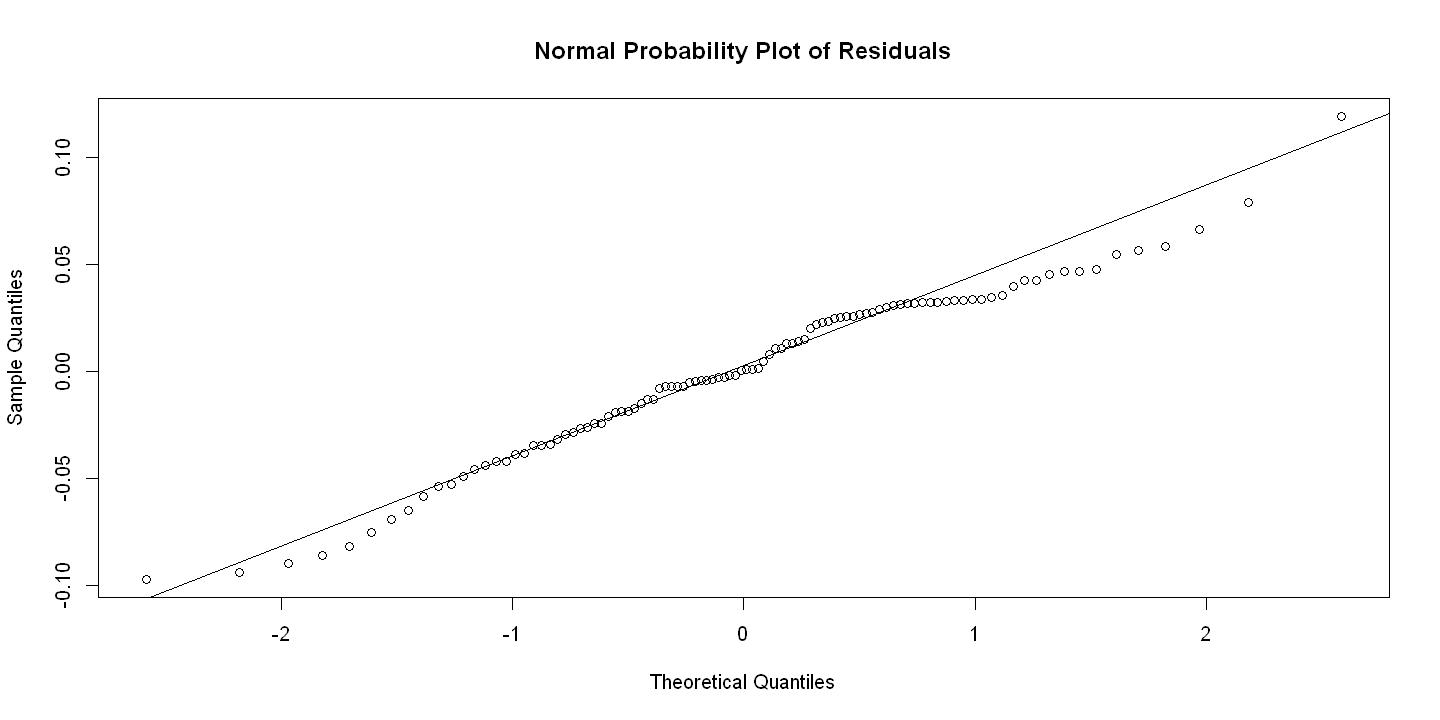

In [235]:
options(repr.plot.width=12, repr.plot.height=6)
qqnorm(e, main="Normal Probability Plot of Residuals")
qqline(e)

#### 9.1.2.2. Normality Test through Coefficient of correlation between the ordered residuals and their expected values

In [236]:
# e
# order(e)
MSE <- anova(Model1)["Residuals", "Mean Sq"]
n <- nrow(df_train1)
k <- rank(e)
p <- (k-0.375)/(n+0.25)
e_esti <- qnorm(p)*MSE
r_eE <- cor(e_esti, e, method = c("pearson"))
r_eE

[1] 0.9878922


<b>State the Hypothesis:</b>
<ul>
  <li><b>H<sub>0</sub></b> = <i>The null hypothesis states that residuals follow normal probability distribution.</i></li>
  <li><b>H<sub>a</sub></b> = <i>The alternative hypothesis states that residuals do not follow normal probability distribution.</i></li>
</ul>

<b>Formulate the analysis plan:</b>
<ul>
  <li>Significant level: <b>0 &lt; α &lt; 1</b></li>
  <li>Test method: <b>Coefficient of Correlation</b> (reasonableness of the normality assumptions)</li>
</ul>


#### Analyse sample data:

In [237]:
print(paste("r-critical : ", 0.987))
print(paste("Cofficient Correlation (r) : ", r_eE))

[1] "r-critical :  0.987"
[1] "Cofficient Correlation (r) :  0.987892244031292"


<b>Decision Rules:</b>
<ul>
  <li>If <b>|Coefficient Correlation (r)| &ge; r<sub>critical</sub></b>, conclude <b>H<sub>0</sub></b>; otherwise, conclude <b>H<sub>a</sub></b>.</li>
</ul>

<b>Interpret your results:</b>
<ul>
  <li>As <b>|r| = 0.98789 &ge; r<sub>critical</sub></b>, therefore conclude <b>H<sub>0</sub></b>.</li>
</ul>

<b>Conclusion:</b>
<ul>
  <li>Residuals follow a normal probability distribution.</li>
</ul>


### 9.1.3. Homoscedasticity validation (Breusch-Pagan Test)

In [238]:
bptest(Model1, studentize=FALSE)


	Breusch-Pagan test

data:  Model1
BP = 6.3894, df = 4, p-value = 0.1719


### 9.1.4. Independence assumption

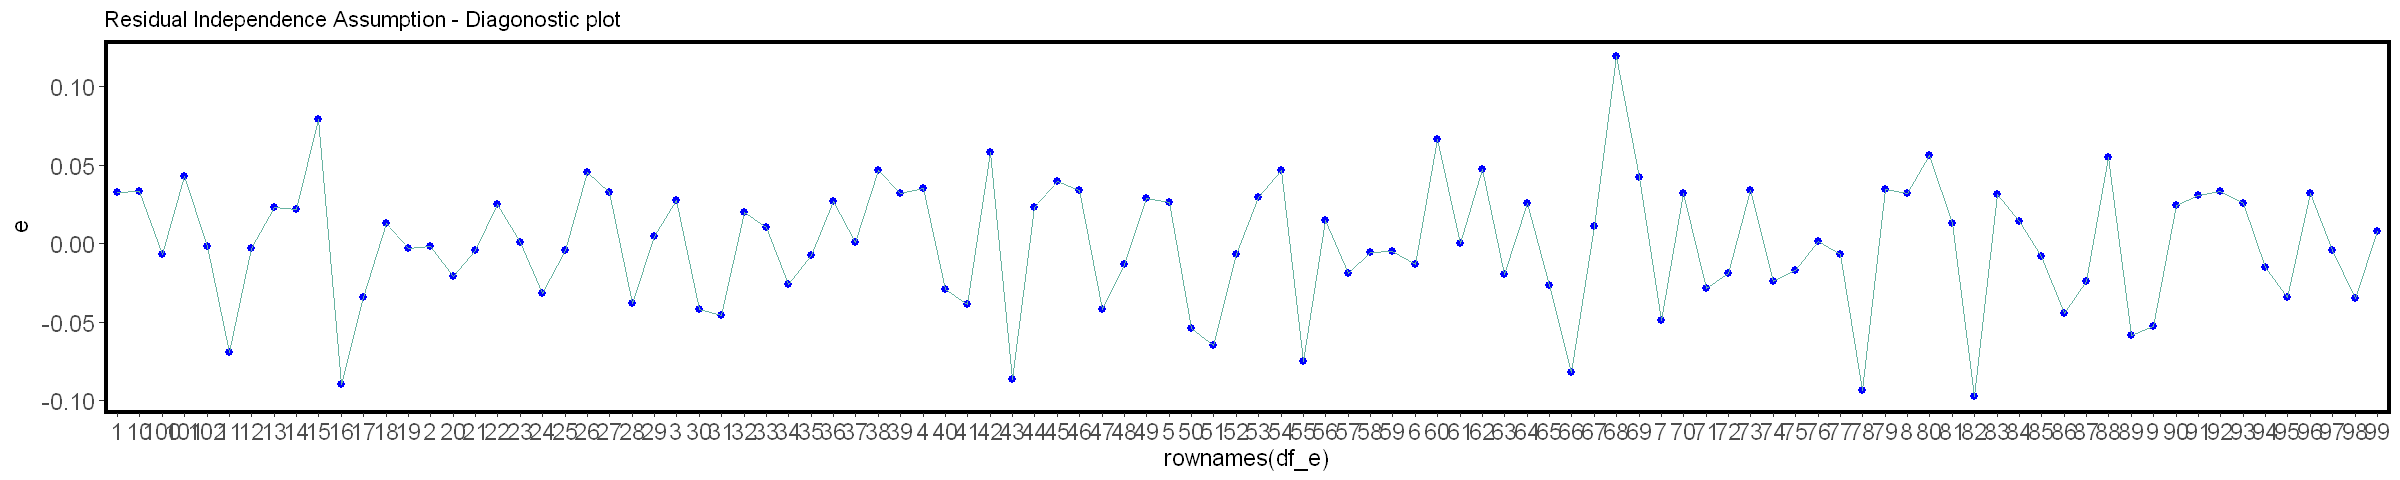

In [239]:
options(repr.plot.width=20, repr.plot.height=4)

df_e <- as.data.frame(e)
rownames(df_e) <- seq.int(nrow(df_e))

plot1 <- ggplot(df_e, aes(x=rownames(df_e), y=e, group = "joinline")) +
                geom_point(aes(x=rownames(df_e), y=e), size=2, fill="blue", color="blue", pch = 21) +
                geom_line( color="#69b3a2") +
                ggtitle("Residual Independence Assumption - Diagonostic plot") + plottheme

plot1

## 9.2. Model 2

### 9.2.1. Linearity assumption validation

In [240]:
e <- residuals(Model2)
Y_hat <- fitted(Model2)

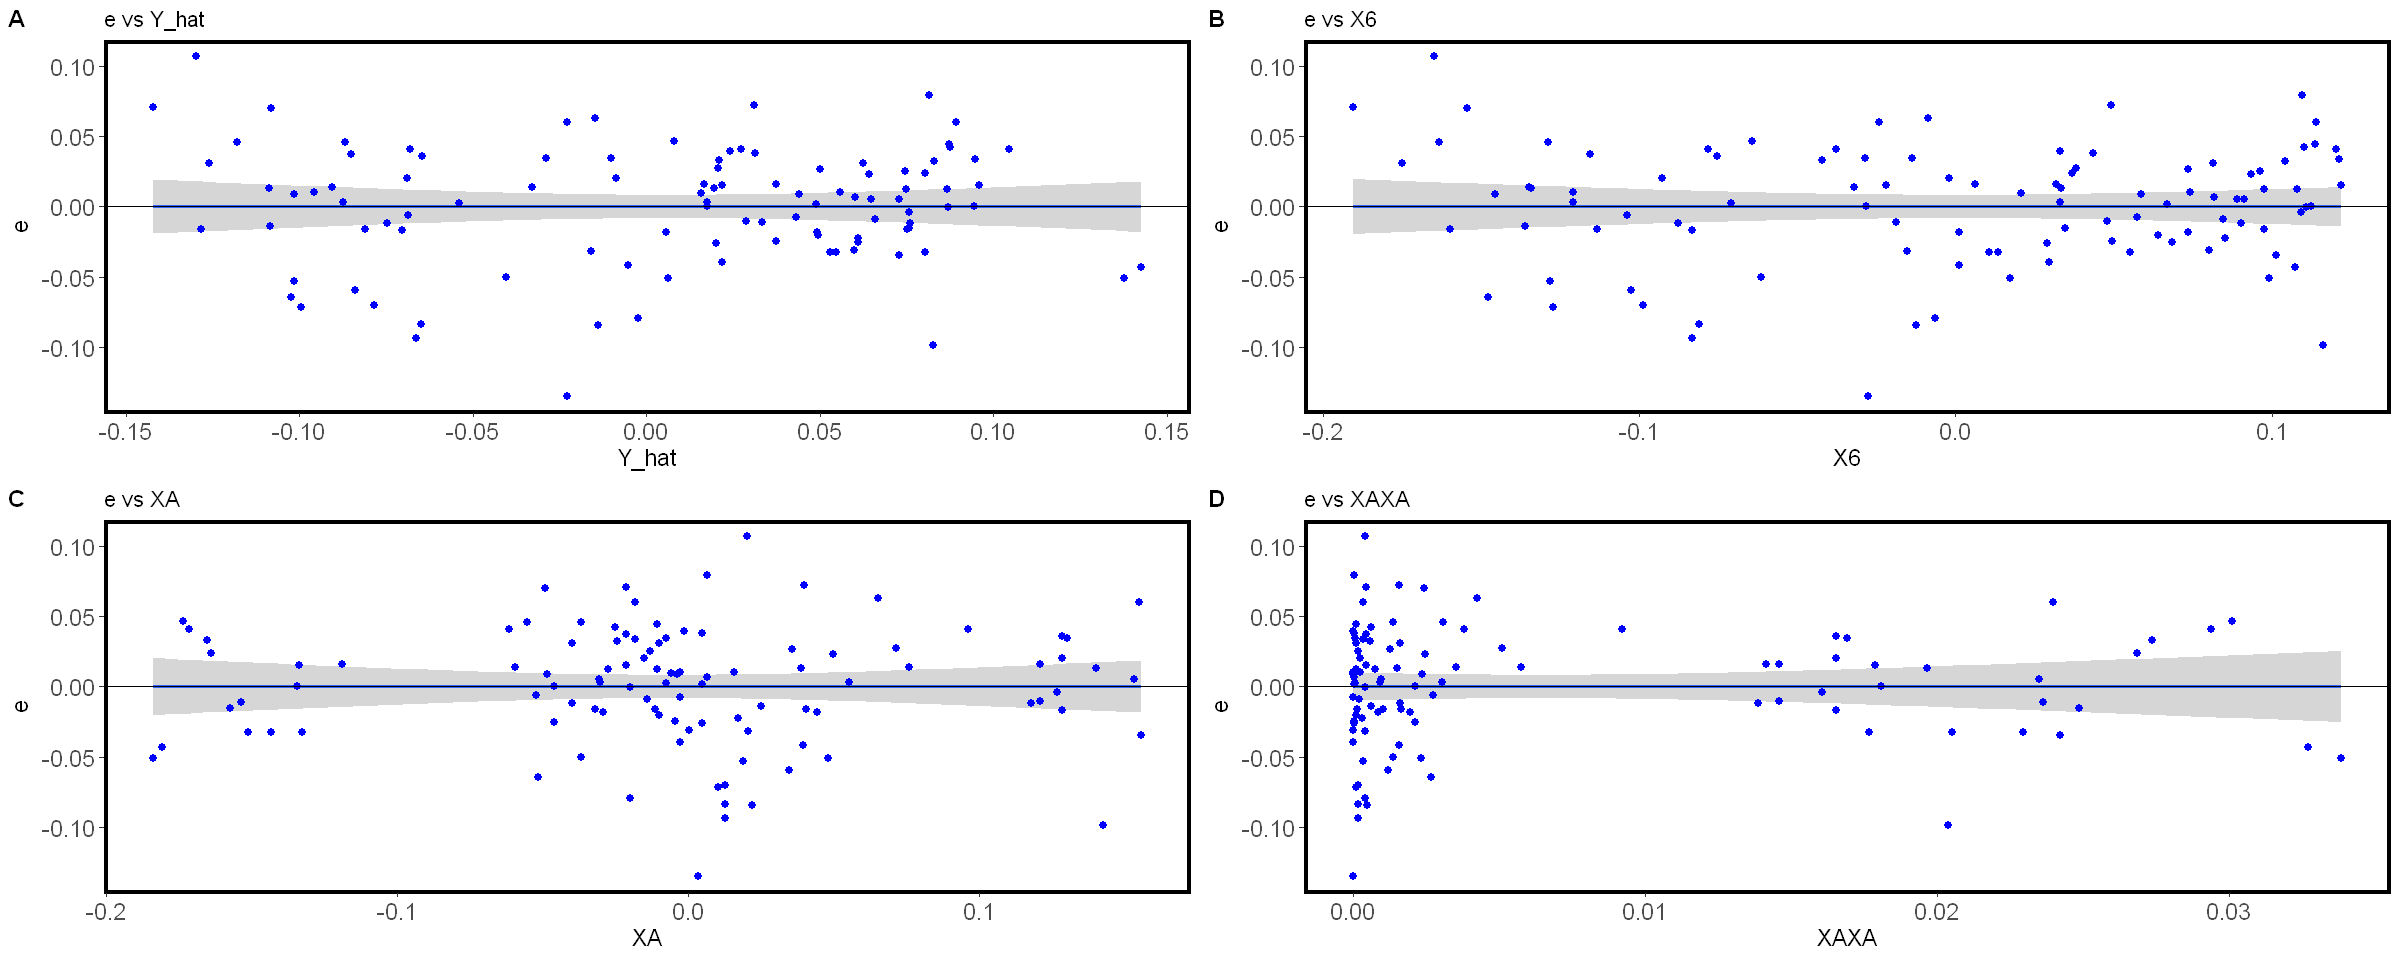

In [241]:
options(repr.plot.width=20, repr.plot.height=8)

df_join = as.data.frame(cbind(Y_hat, e))
colnames(df_join) = c("Y_hat", "e")
plot0 <- ggplot(data=df_join, aes(x=Y_hat, y=e)) + geom_smooth(method='lm', formula= y~x) +
                geom_point(aes(x=Y_hat, y=e), size=2, fill="blue", color="blue", pch = 21) +
                ggtitle("e vs Y_hat") + geom_hline(yintercept=0) + plottheme

df_join = as.data.frame(cbind(df_train2$X6, e))
colnames(df_join) = c("X6", "e")
plot1 <- ggplot(data=df_join, aes(x=X6, y=e)) + geom_smooth(method='lm', formula= y~x) +
                geom_point(aes(x=X6, y=e), size=2, fill="blue", color="blue", pch = 21) +
                ggtitle("e vs X6") + geom_hline(yintercept=0) + plottheme

df_join = as.data.frame(cbind(df_train2$XA, e))
colnames(df_join) = c("XA", "e")
plot3 <- ggplot(data=df_join, aes(x=XA, y=e)) + geom_smooth(method='lm', formula= y~x) +
                geom_point(aes(x=XA, y=e), size=2, fill="blue", color="blue", pch = 21) +
                ggtitle("e vs XA") + geom_hline(yintercept=0) + plottheme

df_join = as.data.frame(cbind(df_train2$XAXA, e))
colnames(df_join) = c("XAXA", "e")
plot4 <- ggplot(data=df_join, aes(x=XAXA, y=e)) + geom_smooth(method='lm', formula= y~x) +
                geom_point(aes(x=XAXA, y=e), size=2, fill="blue", color="blue", pch = 21) +
                ggtitle("e vs XAXA") + geom_hline(yintercept=0) + plottheme

#Show plots
ggarrange(plot0, plot1, plot3, plot4,
labels = c("A", "B", "C", "D"),
ncol = 2, nrow = 2)

### 9.2.2. Normality Test

#### 9.2.2.1. Through Diagonastic Plot

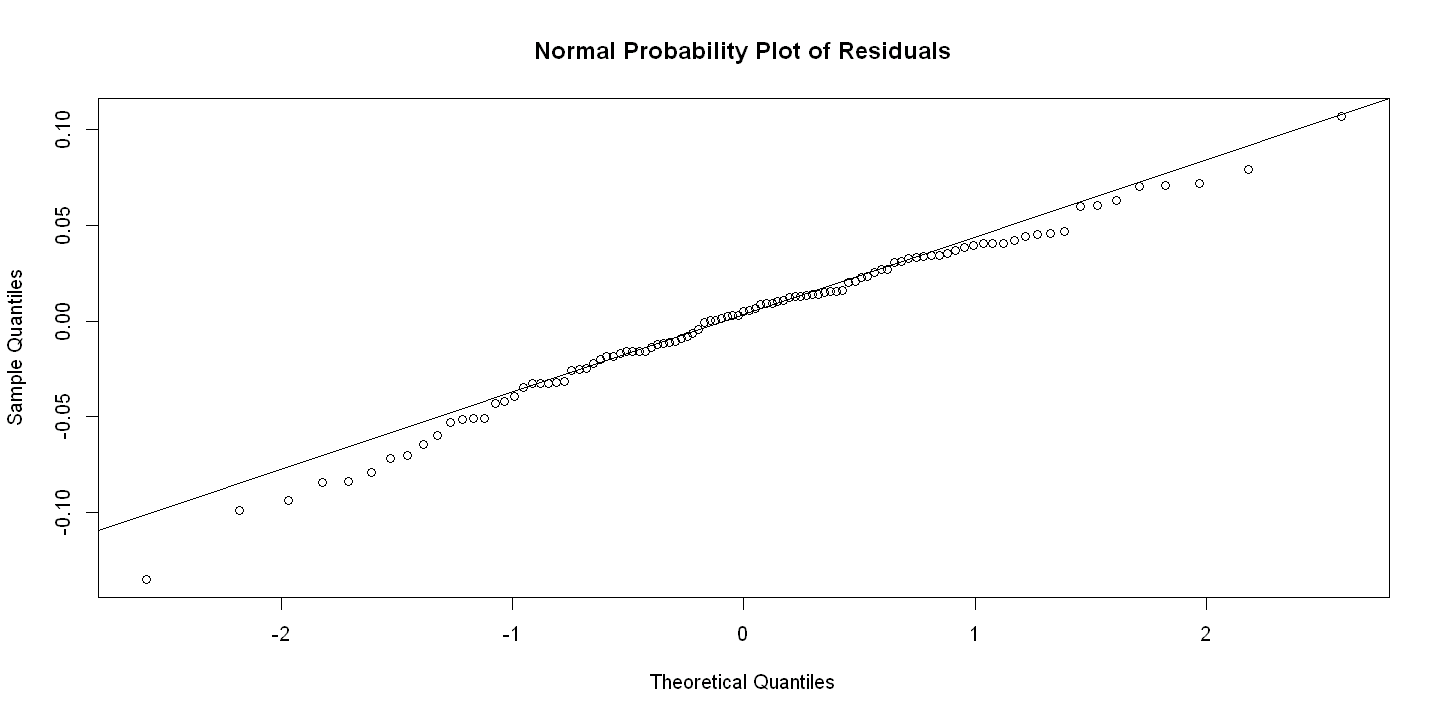

In [242]:
options(repr.plot.width=12, repr.plot.height=6)
qqnorm(e, main="Normal Probability Plot of Residuals")
qqline(e)

#### 9.2.2.2. Normality Test through Coefficient of correlation between the ordered residuals and their expected values

In [243]:
# e
# order(e)
MSE <- anova(Model2)["Residuals", "Mean Sq"]
n <- nrow(df_train2)
k <- rank(e)
p <- (k-0.375)/(n+0.25)
e_esti <- qnorm(p)*MSE
r_eE <- cor(e_esti, e, method = c("pearson"))
r_eE

[1] 0.9908628

<b>State the Hypothesis:</b>
<ul>
  <li><b>H<sub>0</sub></b> = <i>The null hypothesis states that residuals follow normal probability distribution.</i></li>
  <li><b>H<sub>a</sub></b> = <i>The alternative hypothesis states that residuals do not follow normal probability distribution.</i></li>
</ul>

<b>Formulate the analysis plan:</b>
<ul>
  <li>Significant level: 0 &lt; α &lt; 1</li>
  <li>Test method: Coefficient of Correlation (reasonableness of the normality assumptions)</li>
</ul>


#### Analyse sample data:

In [244]:
print(paste("r-critical : ", 0.987))
print(paste("Cofficient Correlation (r) : ", r_eE))

[1] "r-critical :  0.987"
[1] "Cofficient Correlation (r) :  0.99086279644285"


<b>Decision Rules:</b>
<ul>
  <li>If |Coefficient Correlation ( <i>r</i> )| ≥ <i>r<sub>critical</sub></i> value, conclude <b>H<sub>0</sub></b>; otherwise conclude <b>H<sub>a</sub></b>.</li>
</ul>

<b>Interpret your results:</b>
<ul>
  <li>As |<i>r</i>| (0.9909) ≥ <i>r<sub>critical</sub></i>, therefore conclude <b>H<sub>0</sub></b>.</li>
</ul>

<b>Conclusion:</b>
<ul>
  <li>Residuals follow a normal probability distribution.</li>
</ul>


### 9.2.3. Homoscedasticity validation (Breusch-Pagan Test)

In [245]:
bptest(Model2, studentize=FALSE)


	Breusch-Pagan test

data:  Model2
BP = 6.6172, df = 3, p-value = 0.08515


### 9.2.4. Independence assumption

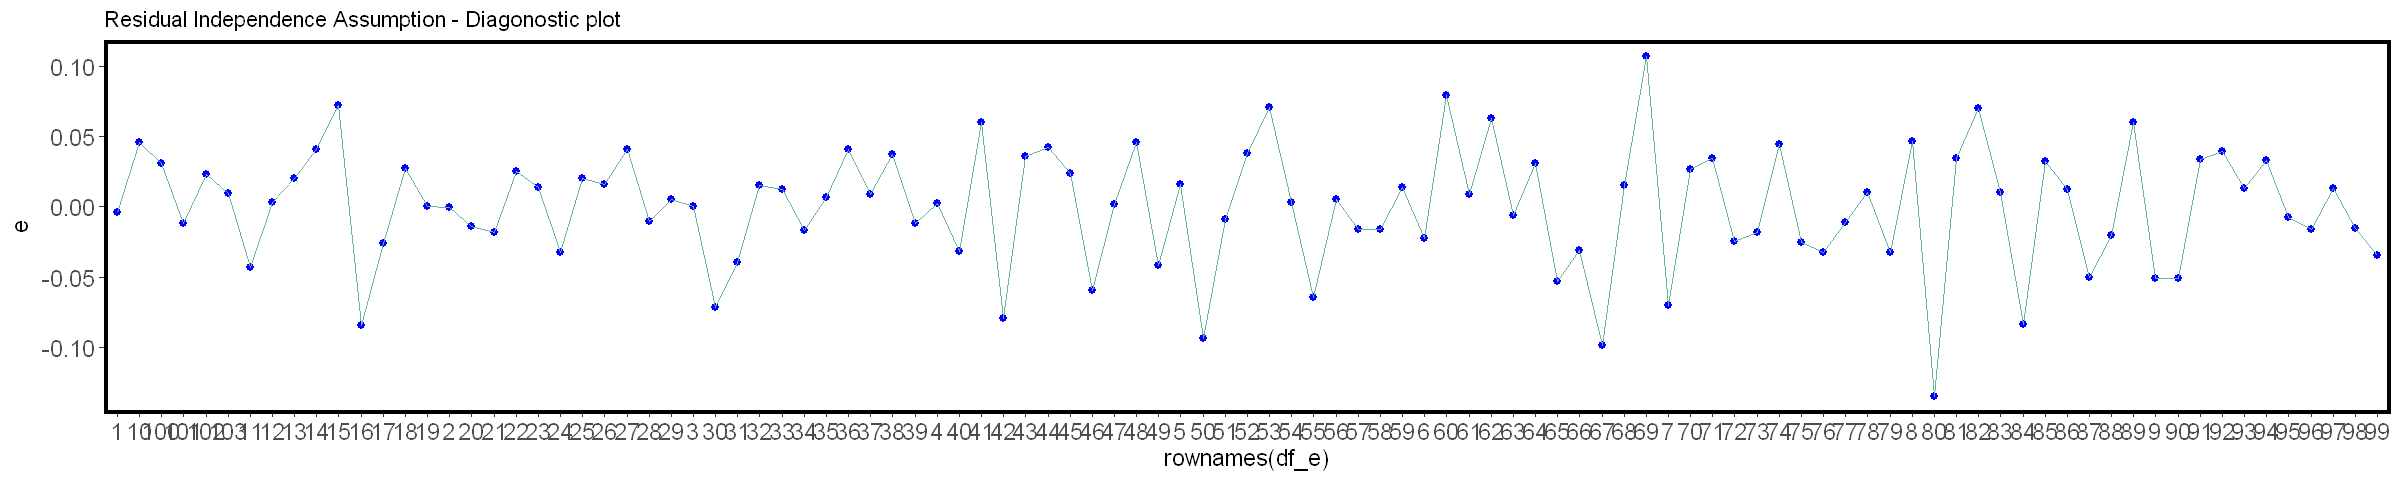

In [246]:
options(repr.plot.width=20, repr.plot.height=4)

df_e <- as.data.frame(e)
rownames(df_e) <- seq.int(nrow(df_e))

plot1 <- ggplot(df_e, aes(x=rownames(df_e), y=e, group = "joinline")) +
                geom_point(aes(x=rownames(df_e), y=e), size=2, fill="blue", color="blue", pch = 21) +
                geom_line( color="#69b3a2") +
                ggtitle("Residual Independence Assumption - Diagonostic plot") + plottheme

plot1

## 9.3. Model 3

### 9.3.1. Linearity assumption validation

In [247]:
e <- residuals(Model3)
Y_hat <- fitted(Model3)

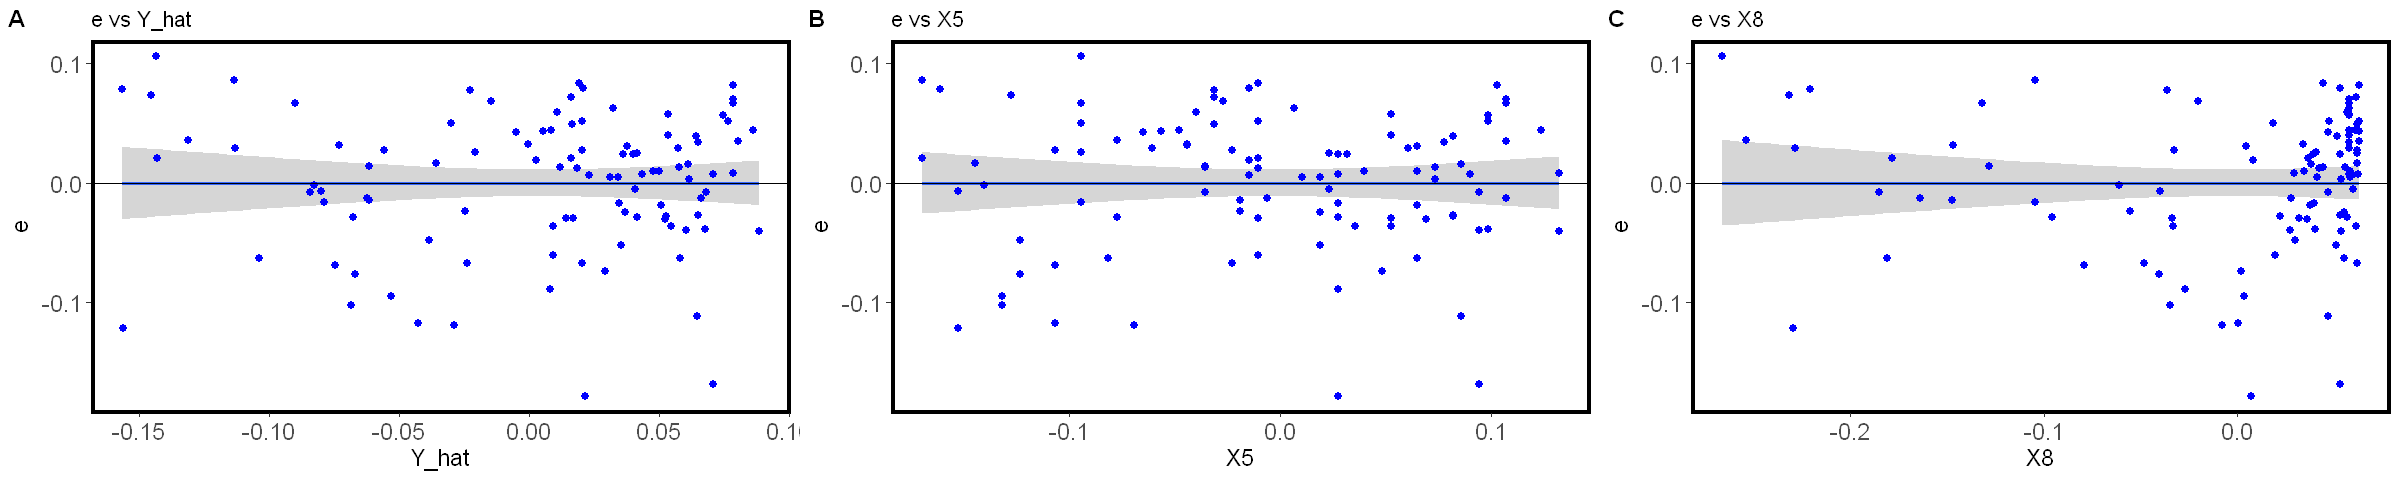

In [250]:
options(repr.plot.width=20, repr.plot.height=4)

df_join = as.data.frame(cbind(Y_hat, e))
colnames(df_join) = c("Y_hat", "e")
plot0 <- ggplot(data=df_join, aes(x=Y_hat, y=e)) + geom_smooth(method='lm', formula= y~x) +
                geom_point(aes(x=Y_hat, y=e), size=2, fill="blue", color="blue", pch = 21) +
                ggtitle("e vs Y_hat") + geom_hline(yintercept=0) + plottheme

df_join = as.data.frame(cbind(df_train3$X5, e))
colnames(df_join) = c("X5", "e")
plot1 <- ggplot(data=df_join, aes(x=X5, y=e)) + geom_smooth(method='lm', formula= y~x) +
                geom_point(aes(x=X5, y=e), size=2, fill="blue", color="blue", pch = 21) +
                ggtitle("e vs X5") + geom_hline(yintercept=0) + plottheme

df_join = as.data.frame(cbind(df_train3$X8, e))
colnames(df_join) = c("X8", "e")
plot2 <- ggplot(data=df_join, aes(x=X8, y=e)) + geom_smooth(method='lm', formula= y~x) +
                geom_point(aes(x=X8, y=e), size=2, fill="blue", color="blue",pch = 21) +
                ggtitle("e vs X8") + geom_hline(yintercept=0) + plottheme

# Show plots
ggarrange(plot0, plot1, plot2,
labels = c("A", "B", "C"),
ncol = 3, nrow = 1)

### 9.3.2. Normality Test

#### 9.3.2.1. Through Diagonastic Plot

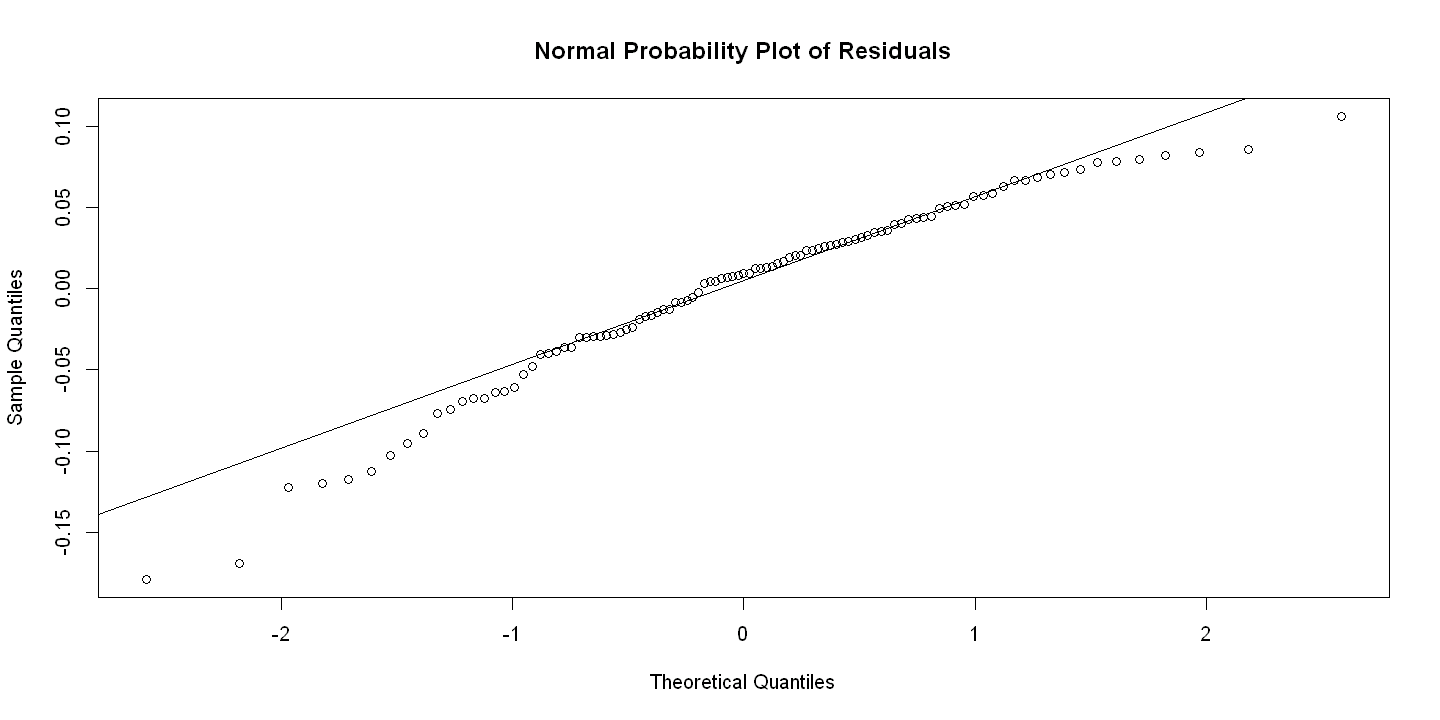

In [251]:
options(repr.plot.width=12, repr.plot.height=6)
qqnorm(e, main="Normal Probability Plot of Residuals")
qqline(e)

#### 9.3.2.2. Normality Test through Coefficient of correlation between the ordered residuals and their expected values

In [252]:
# e
# order(e)
MSE <- anova(Model3)["Residuals", "Mean Sq"]
n <- nrow(df_train3)
k <- rank(e)
p <- (k-0.375)/(n+0.25)
e_esti <- qnorm(p)*MSE
r_eE <- cor(e_esti, e, method = c("pearson"))
r_eE

[1] 0.9800029

<b>State the Hypothesis:</b>
<ul>
  <li><b>H<sub>0</sub></b> = <i>The null hypothesis states that residuals follow normal probability distribution.</i></li>
  <li><b>H<sub>a</sub></b> = <i>The alternative hypothesis states that residuals do not follow normal probability distribution.</i></li>
</ul>

<b>Formulate the analysis plan:</b>
<ul>
  <li>Significant level: 0 &lt; α &lt; 1</li>
  <li>Test method: Coefficient of Correlation (reasonableness of the normality assumptions)</li>
</ul>


#### Analyse sample data:

In [253]:
print(paste("r-critical : ", 0.987))
print(paste("Cofficient Correlation (r) : ", r_eE))

[1] "r-critical :  0.987"
[1] "Cofficient Correlation (r) :  0.980002863678479"


<b>Decision Rules:</b>
<ul>
  <li>If |Coefficient Correlation (r)| ≥ <i>r<sub>critical</sub></i> value, conclude <b>H<sub>0</sub></b>, otherwise conclude <b>H<sub>a</sub></b>.</li>
</ul>

<b>Interpret your results:</b>
<ul>
  <li>As |r (0.980)| &lt; <i>r<sub>critical</sub></i>, therefore conclude <b>H<sub>a</sub></b>.</li>
</ul>

<b>Conclusion:</b>
<ul>
  <li>Residuals don't follow a normal probability distribution.</li>
</ul>


### 9.3.3. Homoscedasticity validation (Breusch-Pagan Test)

In [254]:
bptest(Model3, studentize=FALSE)


	Breusch-Pagan test

data:  Model3
BP = 2.2215, df = 2, p-value = 0.3293


### 9.3.4. Independence assumption

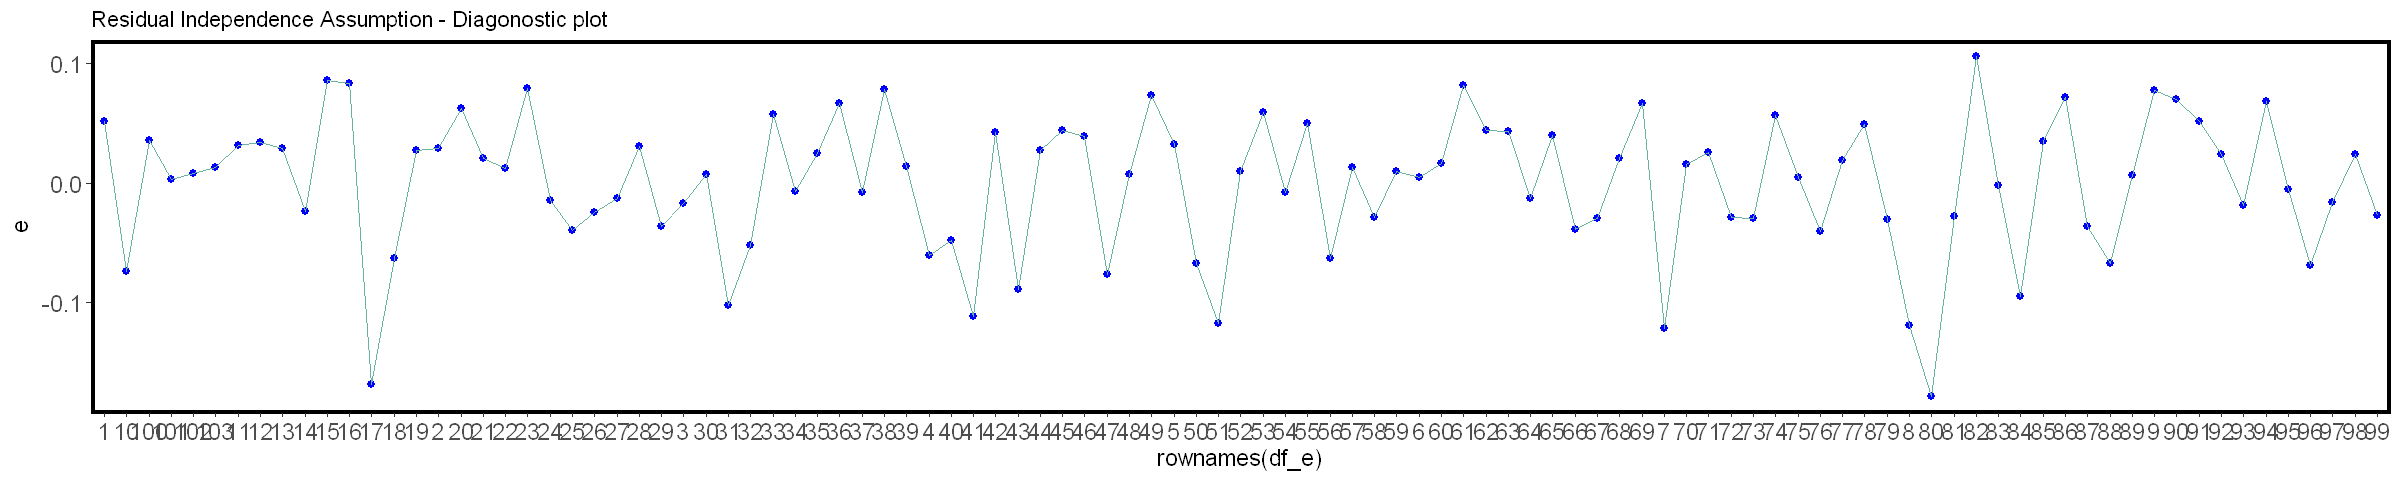

In [255]:
options(repr.plot.width=20, repr.plot.height=4)

df_e <- as.data.frame(e)
rownames(df_e) <- seq.int(nrow(df_e))

plot1 <- ggplot(df_e, aes(x=rownames(df_e), y=e, group = "joinline")) +
                geom_point(aes(x=rownames(df_e), y=e), size=2, fill="blue", color="blue", pch = 21) +
                geom_line( color="#69b3a2") +
                ggtitle("Residual Independence Assumption - Diagonostic plot") + plottheme

plot1

<div style="background-color: #00f0f0; width: 750px; margin: auto; padding: 20px; border: 2px solid black; border-radius: 5px; font-size: 15px;">

<b>Model 3</b> fails for <b>Normality Assumption</b> and <b>Homoscedasticity Assumption</b>. Also, it shows <i>R<sup>2</sup></i> of only 54%. On the other hand, both <b>Model 1</b> and <b>Model 2</b> follow all the assumptions for residuals. <b>Model 1</b> and <b>Model 2</b> will be used for model validation.

</div>


# 10. Model Validation

## 10.1. Model 1

In [256]:
Train.Model <- lm(Y ~ X6+X9+XA+XAXA, data=df_train1)
Validation.Model <- lm(Y ~ X6+X9+XA+XAXA, data=df_test)
summary(Train.Model)
summary(Validation.Model)


Call:
lm(formula = Y ~ X6 + X9 + XA + XAXA, data = df_train1)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.09696 -0.02576  0.00052  0.03113  0.11873 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.006092   0.005225  -1.166 0.246490    
X6           0.578168   0.063992   9.035 1.63e-14 ***
X9           0.269953   0.076409   3.533 0.000631 ***
XA          -0.170348   0.051965  -3.278 0.001451 ** 
XAXA         1.440433   0.461253   3.123 0.002361 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.04076 on 97 degrees of freedom
Multiple R-squared:  0.7637,	Adjusted R-squared:  0.7539 
F-statistic: 78.37 on 4 and 97 DF,  p-value: < 2.2e-16



Call:
lm(formula = Y ~ X6 + X9 + XA + XAXA, data = df_test)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.114060 -0.025586  0.006616  0.029758  0.069049 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.02484    0.01192  -2.084   0.0489 *  
X6           0.93280    0.17011   5.484 1.65e-05 ***
X9          -0.03658    0.11918  -0.307   0.7618    
XA          -0.17381    0.10351  -1.679   0.1073    
XAXA         1.55941    1.01482   1.537   0.1386    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.04747 on 22 degrees of freedom
Multiple R-squared:  0.6657,	Adjusted R-squared:  0.6049 
F-statistic: 10.95 on 4 and 22 DF,  p-value: 4.85e-05


<div style="background-color: #00f0f0; width: 750px; margin: auto; padding: 20px; border: 2px solid black; border-radius: 5px; font-size: 15px;">

The adjusted R<sup>2</sup> value for the <b>train model</b> is <b>0.7539</b> and for the <b>validation model</b> is <b>0.6049</b>.

</div>


## 10.2. Model 2

In [257]:
Train.Model <- lm(Y ~ X6+XA+XAXA, data=df_train2)
Validation.Model <- lm(Y ~ X6+XA+XAXA, data=df_test)
summary(Train.Model)
summary(Validation.Model)


Call:
lm(formula = Y ~ X6 + XA + XAXA, data = df_train2)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.134671 -0.023618  0.005243  0.030795  0.106601 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.001117   0.005122  -0.218  0.82788    
X6           0.761909   0.047296  16.110  < 2e-16 ***
XA          -0.169318   0.053958  -3.138  0.00224 ** 
XAXA         0.955372   0.458267   2.085  0.03967 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.04281 on 99 degrees of freedom
Multiple R-squared:  0.7413,	Adjusted R-squared:  0.7334 
F-statistic: 94.55 on 3 and 99 DF,  p-value: < 2.2e-16



Call:
lm(formula = Y ~ X6 + XA + XAXA, data = df_test)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.112366 -0.026385  0.009711  0.033353  0.069732 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.02536    0.01156  -2.193   0.0387 *  
X6           0.91755    0.15946   5.754 7.33e-06 ***
XA          -0.17507    0.10137  -1.727   0.0976 .  
XAXA         1.70493    0.87943   1.939   0.0649 .  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.04653 on 23 degrees of freedom
Multiple R-squared:  0.6643,	Adjusted R-squared:  0.6205 
F-statistic: 15.17 on 3 and 23 DF,  p-value: 1.162e-05


<div style="background-color: #00f0f0; width: 750px; margin: auto; padding: 20px; border: 2px solid black; border-radius: 5px; font-size: 15px;">

The adjusted R<sup>2</sup> value for the <b>train model</b> is <b>0.7334</b> and for the <b>validation model</b> is <b>0.6205</b>.

</div>

# 11. Final Model

<div style="background-color: #00f0f0; width: 750px; margin: auto; padding: 20px; border: 2px solid black; border-radius: 5px; font-size: 15px;">

<b>Although, Model 1 performed best on train dataset, however it shows more variation when validated against Test dataset. So, Model 2 is chosen as best possible model.</b>

</div>


## 11.1. Final Model Confidence intervals

In [258]:
n <- nrow(df_train2)
p <- 4
# Obtain b and s{b}
b <- Model2$coefficients
se_b <- coef(summary(Model2))[, "Std. Error"]
# Calculate t-value
tv <- qt(1-alpha/2, n-p)
lower_upper = cbind(-1*matrix(se_b), matrix(se_b))
cbind(b, b) + tv * lower_upper

,b,b
(Intercept),-0.01128085,0.009047433
X6,0.66806402,0.855753507
XA,-0.27638224,-0.062253851
XAXA,0.04607072,1.864672957


## 11.2. Final Model in form of Original variables


<b>It can be shown that:</b><br>

<b>b<sub>6</sub><sup>'</sup></b> = (s<sub>Y</sub> / s<sub>6</sub>) · b<sub>6</sub>

<b>b<sub>A</sub><sup>'</sup></b> = (s<sub>Y</sub> / s<sub>A</sub>) · [b<sub>A</sub> − (2<span style="text-decoration: overline;">X</span><sub>A</sub> / (s<sub>A</sub>√(n−1))) · b<sub>AA</sub>]

<b>b<sub>AA</sub><sup>'</sup></b> = (s<sub>Y</sub> / (s<sub>A</sub><sup>2</sup>√(n−1))) · b<sub>AA</sub>

<b>b<sub>0</sub><sup>'</sup></b> = <span style="text-decoration: overline;">Y</span> + b<sub>0</sub> − (s<sub>Y</sub> / s<sub>6</sub>)X<sub>6</sub>·b<sub>6</sub> − (<span style="text-decoration: overline;">X</span><sub>A</sub> / b<sub>A</sub>) · X<sub>A</sub> · b<sub>A</sub> + (s<sub>Y</sub> / (s<sub>A</sub><sup>2</sup>√(n−1))) · X<sub>A</sub><sup>2</sup> · b<sub>AA</sub>



In [ ]:
b6 <- (sy/sx['X6'])*Model2$coefficients['X6']
b6

bXA <- (sy/sx['XA'])*(Model2$coefficients['XA']-(2*mean_x['XA'])/(sx['XA']*sqrt(n-1))*Model2$coefficients['XAXA'] )
bXA

bXAXA <- (sy/((sx['XA'])^2*sqrt(n-1)))*Model2$coefficients['XAXA']
bXAXA

b0 <- mean_y + Model2$coefficients['(Intercept)'] -
      (sy / sx['X6']) * mean_x['X6'] * b6 -
      (mean_x['XA'] / Model2$coefficients['XA']) * mean_x['XA'] * Model2$coefficients['XA'] +
      (sy / (sx['XA']^2 * sqrt(n - 1))) * mean_x['XA']^2 * Model2$coefficients['XAA']
b0 <- as.numeric(b0)


X6 
5.804829

XA 
-0.005177887

XA 
3.620975e-05

[1] NA

# Final Estimated regression function

$$
\hat{Y} = 1.32134 + 5.8048 \cdot X_6 - 0.00518 \cdot X_A + 3.6209 \cdot X_A^2
$$